In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Caso seja usado o google colab:

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Concatenar os arquivos de 2024

In [40]:
pasta='.'

arquivo_out = 'casos_incendio2024.csv'

dataframes = []


for item in os.listdir(pasta):
    if item.startswith('2024') and item.endswith('.csv'):
        caminho_arquivo = os.path.join(pasta,item)
        df = pd.read_csv(caminho_arquivo)
        dataframes.append(df)
        

arquivo = pd.concat(dataframes, ignore_index=True)
arquivo = arquivo.sort_values(by=['ano','mês'], ascending=[False,True])
arquivo = arquivo.drop_duplicates()
arquivo.to_csv(arquivo_out, index=False)
arquivo

estado            municipio           bioma   ano  mês  \
0                     BAHIA              LENÇÓIS        Caatinga  2024    1   
1        MATO GROSSO DO SUL              CORUMBÁ        Pantanal  2024    1   
2                     BAHIA  SANTA CRUZ CABRÁLIA  Mata Atlântica  2024    1   
3                     BAHIA          SANTA LUZIA  Mata Atlântica  2024    1   
4                     BAHIA              CAATIBA  Mata Atlântica  2024    1   
...                     ...                  ...             ...   ...  ...   
240460              ALAGOAS            RIO LARGO  Mata Atlântica  2024   10   
240461  RIO GRANDE DO NORTE                TAIPU        Caatinga  2024   10   
240462  RIO GRANDE DO NORTE               PUREZA        Caatinga  2024   10   
240463           PERNAMBUCO              ALIANÇA        Caatinga  2024   10   
240464           PERNAMBUCO             TIMBAÚBA        Caatinga  2024   10   

        dia  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
240460   23  
240461   23  
240462   23  
240463   23  
240464   23  

[240465 rows x 6 columns]

Para verificar as colunas:

In [4]:
#pesquisar = arquivo[arquivo['mês']==10]
#pesquisar

Criação dos gráficos:

In [5]:
#contagem de ocorrências por mês
df_mes = arquivo.groupby("mês")[['mês']].count().rename(columns={"mês":"count"})
df_mes.head()

count
mês       
1    20017
2    11511
3    12225
4     9256
5    17035

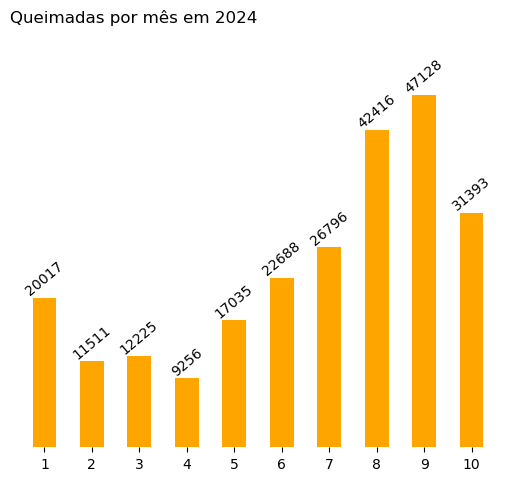

In [6]:
#gráfico das ocorrências de queimadas por mês

#criação do gráfico
fig, ax = plt.subplots()
bars = ax.bar(list(df_mes.index), df_mes['count'], color='orange',
             width=0.5)

#rótulos com valores das barras
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() /2, bar.get_height(),
           f'{int(bar.get_height())}', ha='center',va='bottom',
           rotation=40)
    

ax.set_xticks(list(df_mes.index))
ax.set_xticklabels(list(df_mes.index))
ax.set_title('Queimadas por mês em 2024', loc='left', pad=40)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_visible(False)
ax.grid(False)


fig.savefig('queimadas_mes.png', dpi=100, bbox_inches='tight',
           orientation='portrait')

plt.show()

In [7]:
#ocorrências por estado
df_estado = arquivo.groupby(['estado'])[['estado']].count().rename(columns={'estado': 'count'})
df_estado.head()

count
estado         
ACRE       2730
ALAGOAS    2623
AMAPÁ       751
AMAZONAS   6861
BAHIA     19945

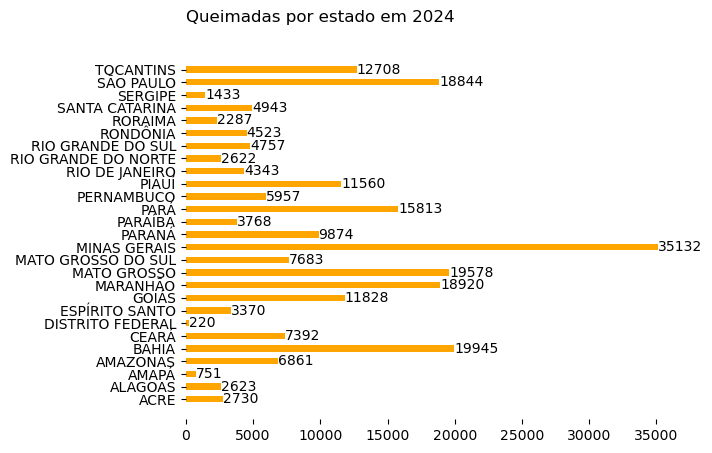

In [8]:
#gráfico das queimadas por estado ao total dos 10 meses de 2024

#criação do gráfico
fig, ax = plt.subplots()
bars = ax.barh(list(df_estado.index), df_estado['count'], color='orange', height=0.5)

#rótulos com valores das barras
for bar in bars:
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, 
            f'{int(bar.get_width())}', va='center', ha='left', 
            fontsize=10, color='black')

#ajustes do gráfico
ax.set_title('Queimadas por estado em 2024', loc='left', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

fig.savefig('queimadas_estado2024.png', dpi=100, bbox_inches='tight', orientation='portrait')

plt.show()

In [9]:
#ocorrências em cada estado por mês
df_estado_mes = arquivo.groupby(['estado', 'mês'])[['estado']].count().rename(columns={'estado': 'count'})
df_estado_mes.head()

count
estado mês       
ACRE   1       50
       2       26
       3       60
       4       75
       5      114

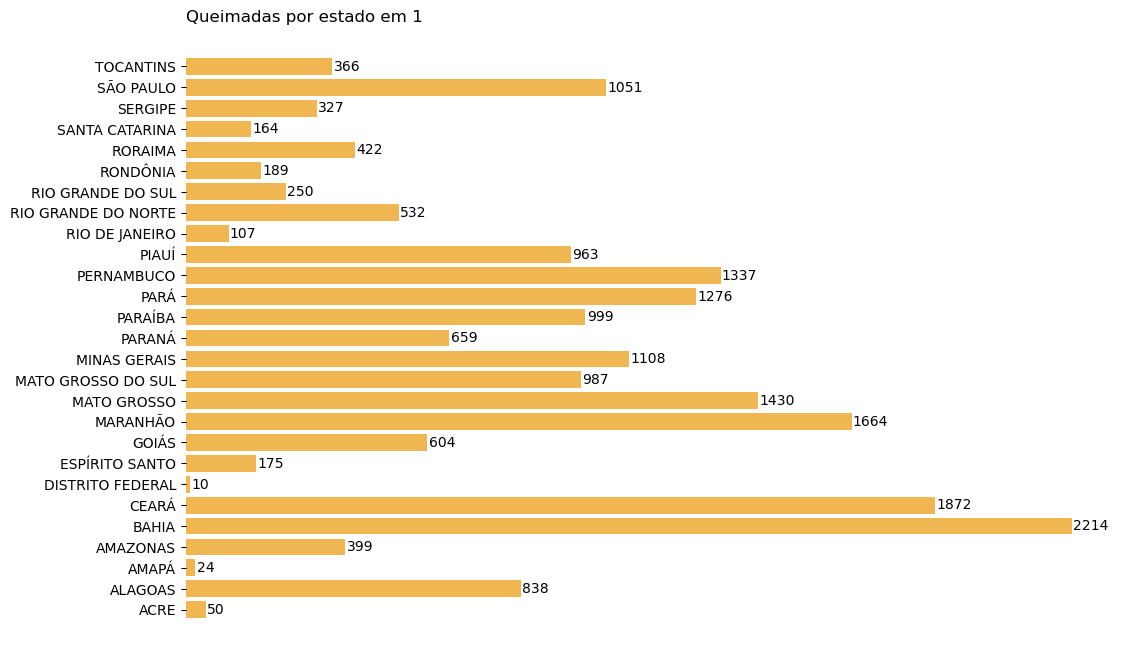

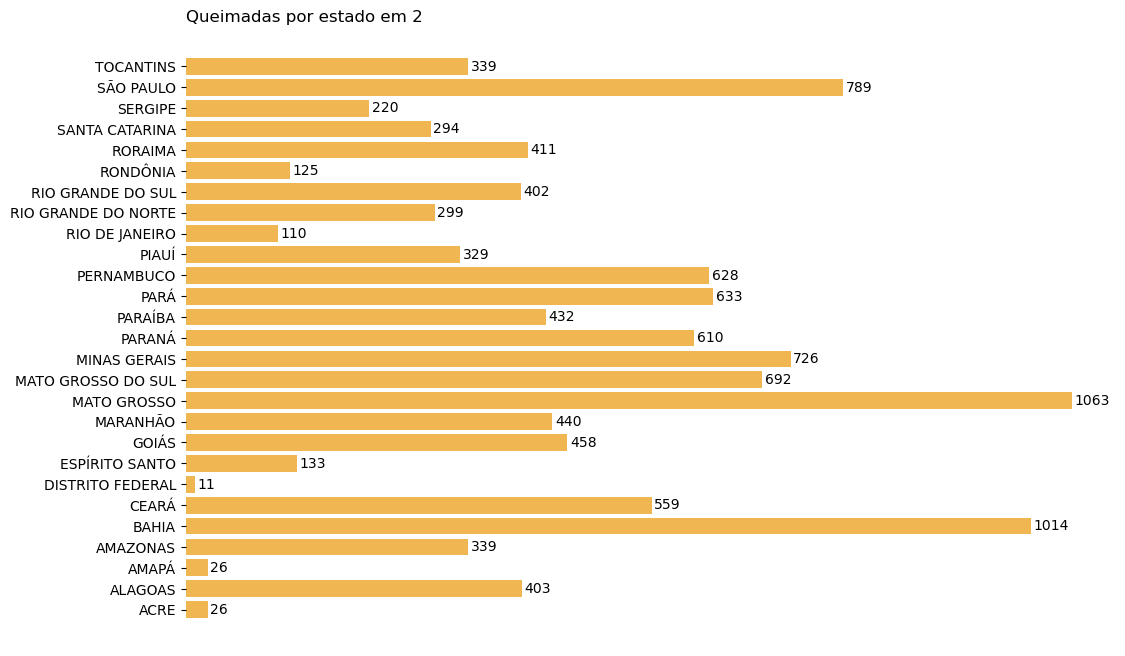

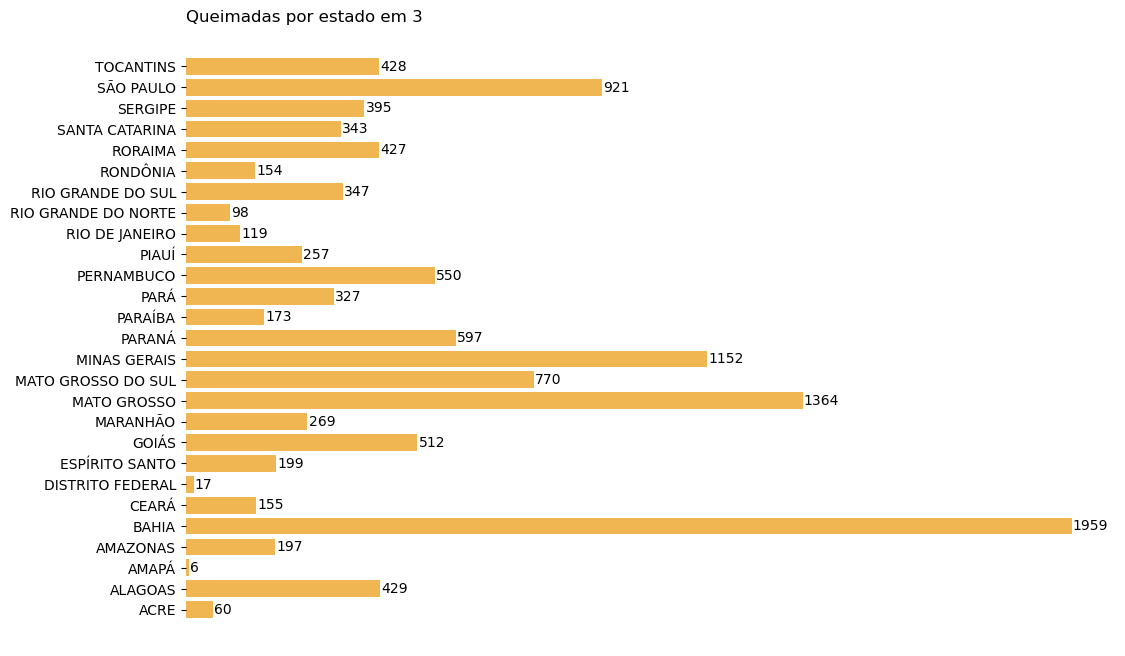

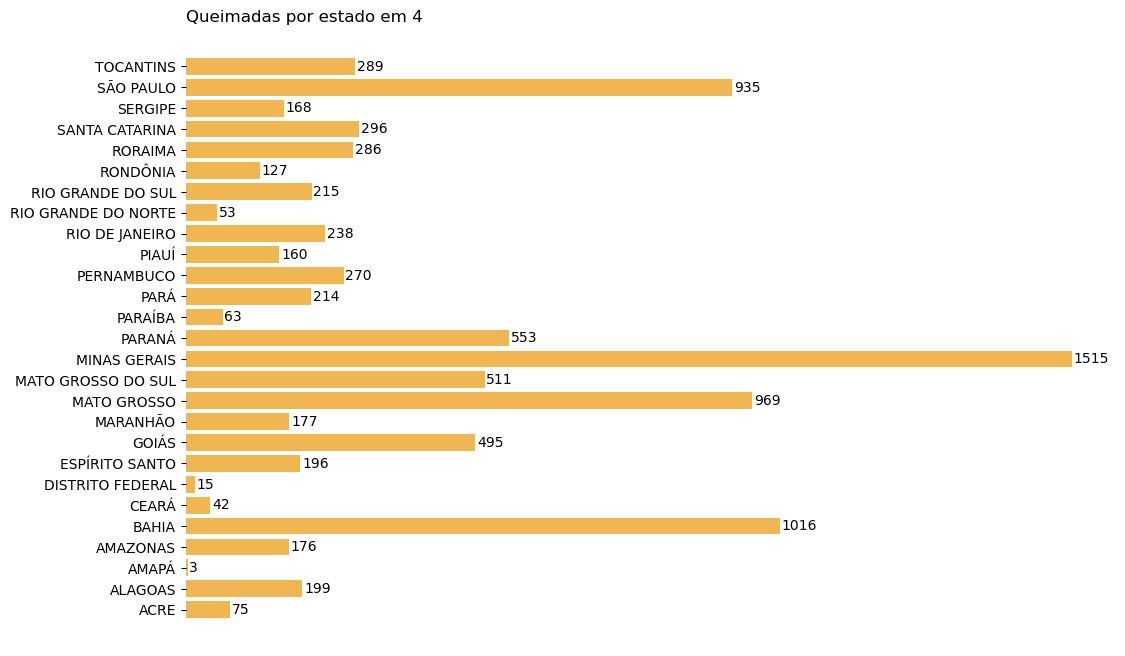

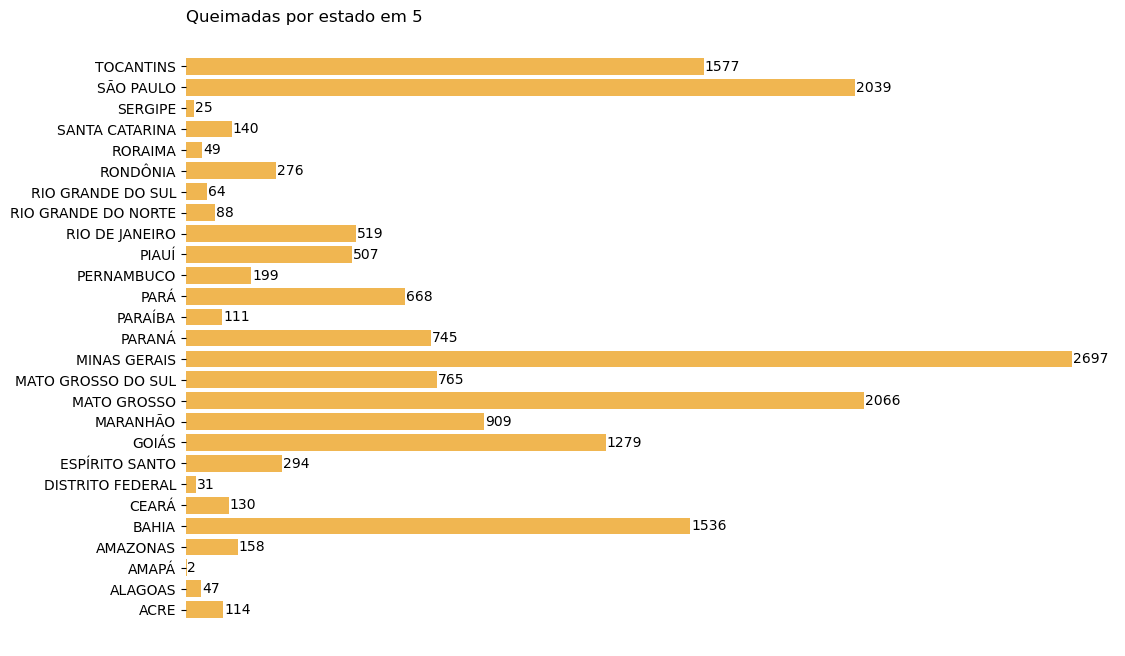

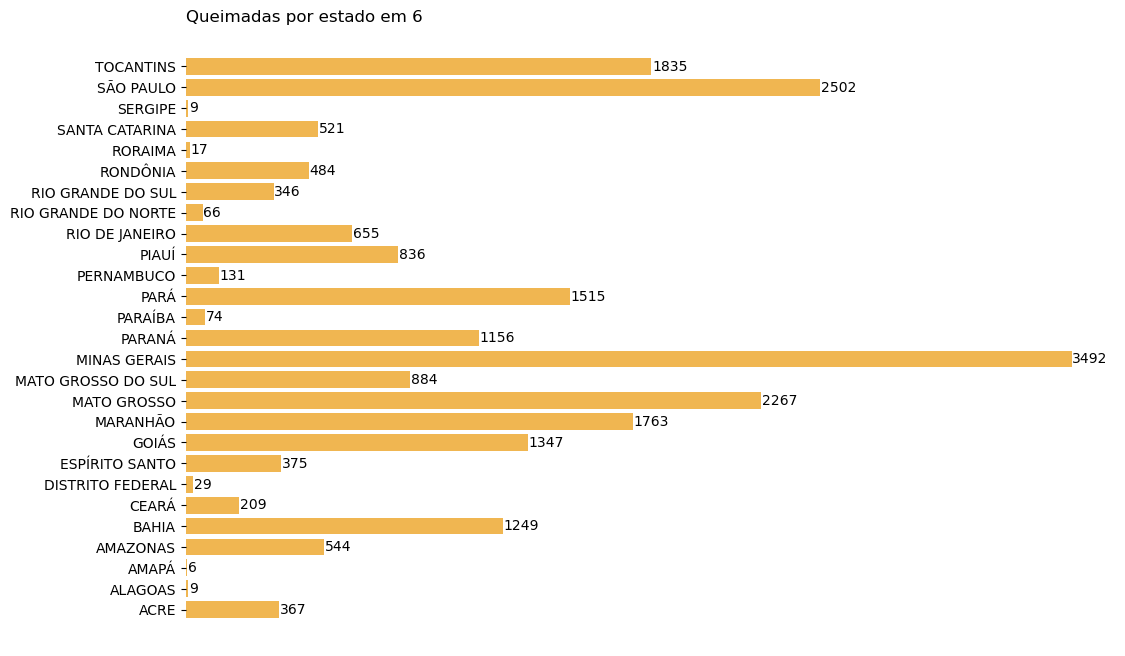

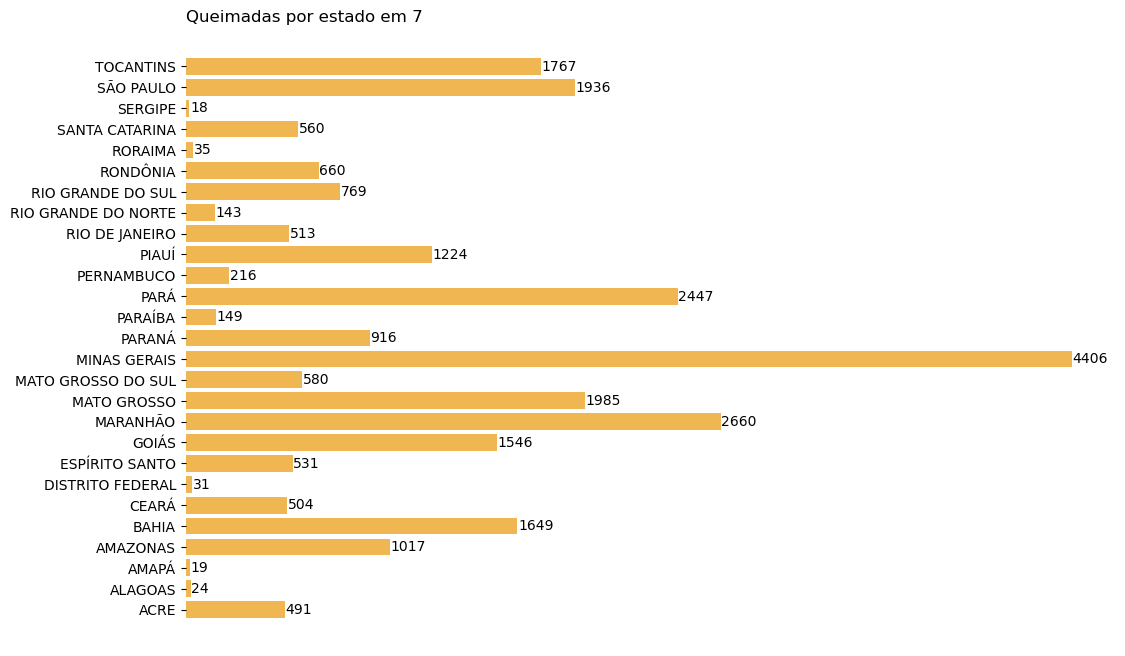

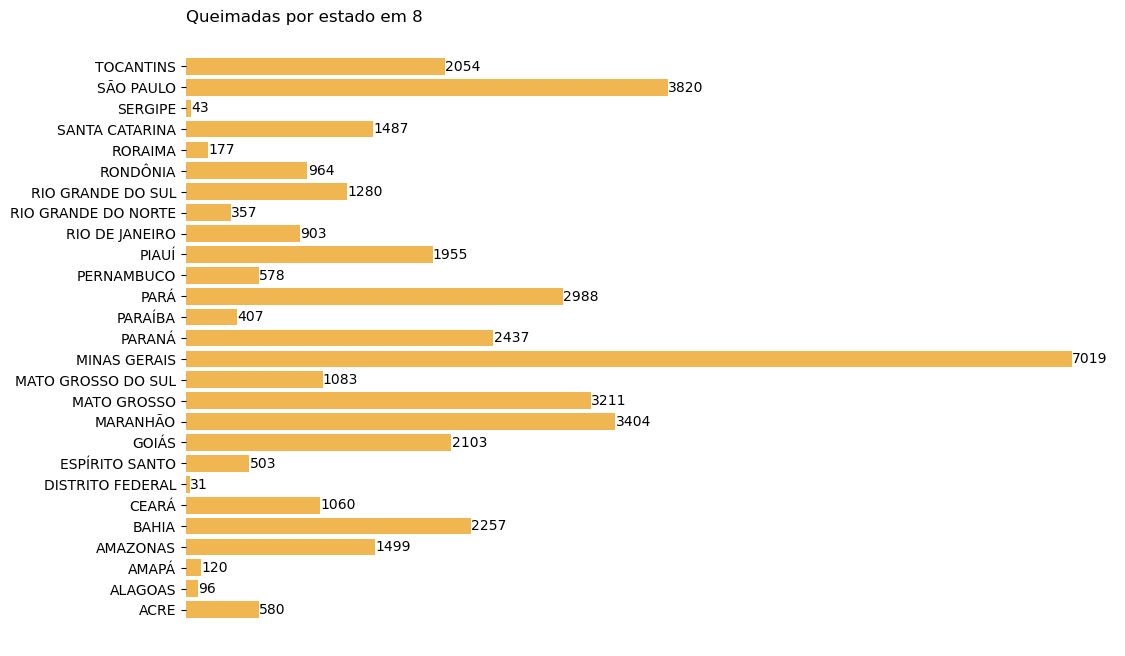

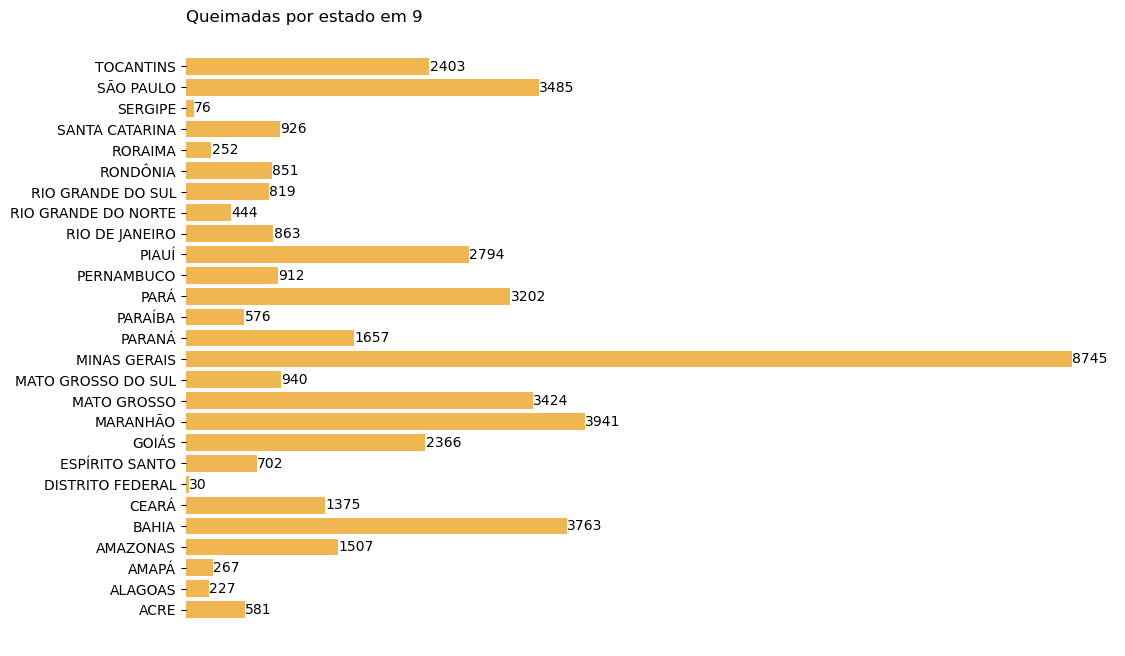

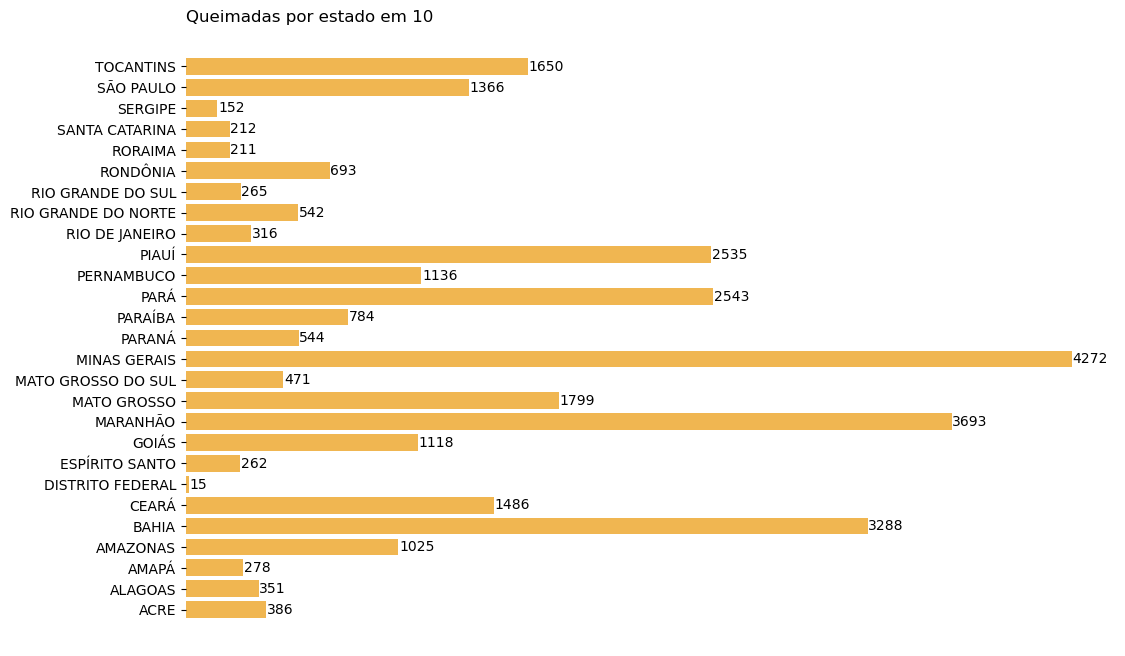

In [10]:
#gráfico de queimadas em cada estado por mês

meses = df_estado_mes.index.get_level_values('mês').unique()

#criar gráfico para cada mês
for mes in meses:
    df_mes = df_estado_mes.loc[df_estado_mes.index.get_level_values('mês') == mes]

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.barh(df_mes.index.get_level_values('estado'), df_mes['count'], color="#F0B651")

    ax.set_title(f'Queimadas por estado em {mes}', loc='left')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_visible(True)
    ax.xaxis.set_visible(False)

    #adicionar os rótulos com os valores das barras
    for index, value in enumerate(df_mes['count']):
        ax.text(value + 3, index, str(value), va='center')

    plt.show()

    fig.savefig(f'queimadas_estado_{mes}_2024.png', dpi=100, bbox_inches='tight', orientation='portrait')


In [11]:
#ocorrências de biomas por mês
df_bioma_estado_mes = arquivo.groupby(['bioma', 'estado', 'mês'])[['mês']].count().rename(columns={'mês': 'count'})
df_bioma_estado_mes.head()

count
bioma    estado mês       
Amazônia ACRE   1       50
                2       26
                3       60
                4       75
                5      114

In [12]:
estado = df_bioma_estado_mes.reset_index()
estado

estados = estado['estado'].unique()  

dados_por_estado = {}

for i in estados:
    dados_por_estado[i] = estado[estado["estado"] == i][['bioma', 'mês', 'count']]

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

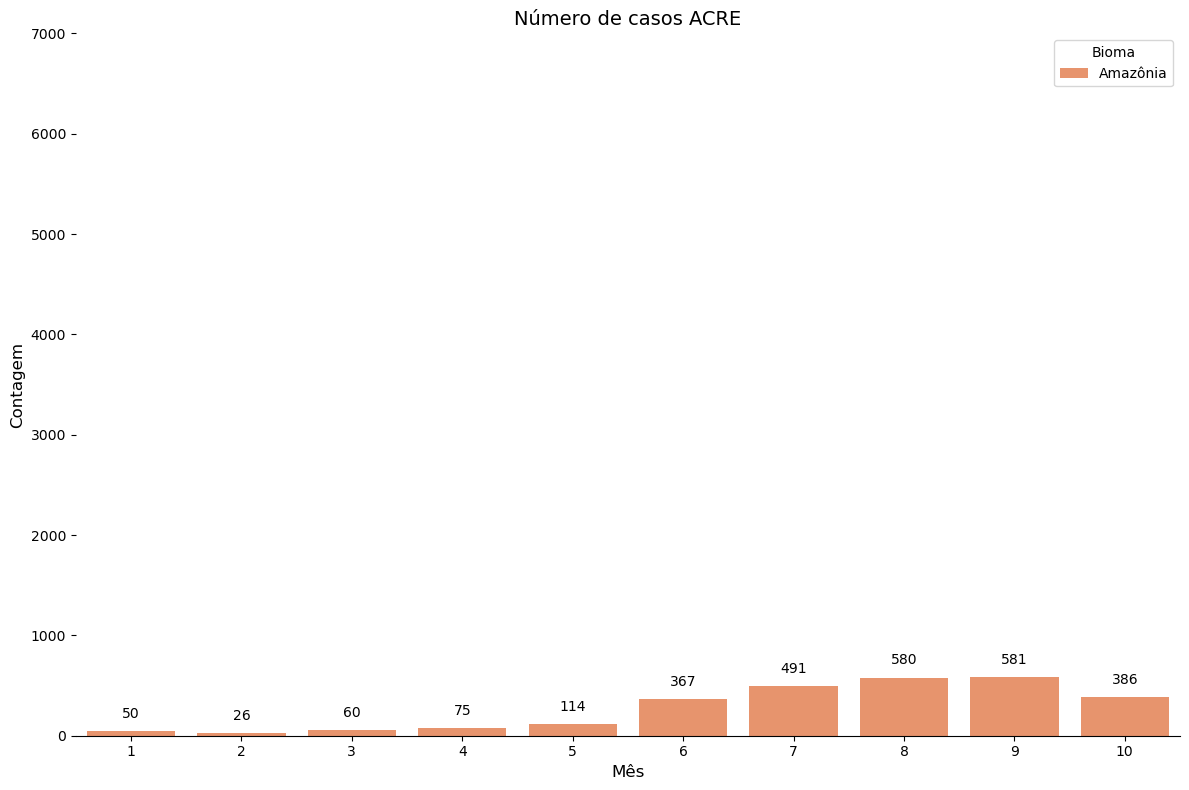

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

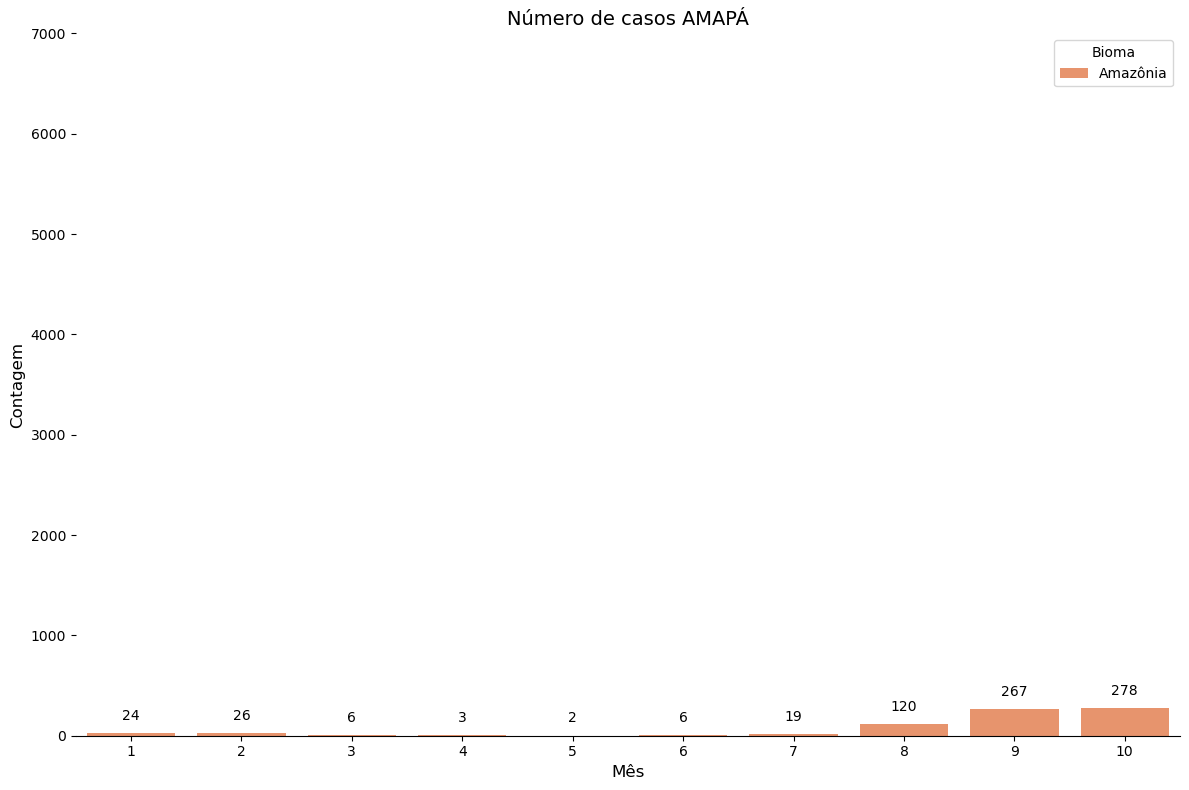

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

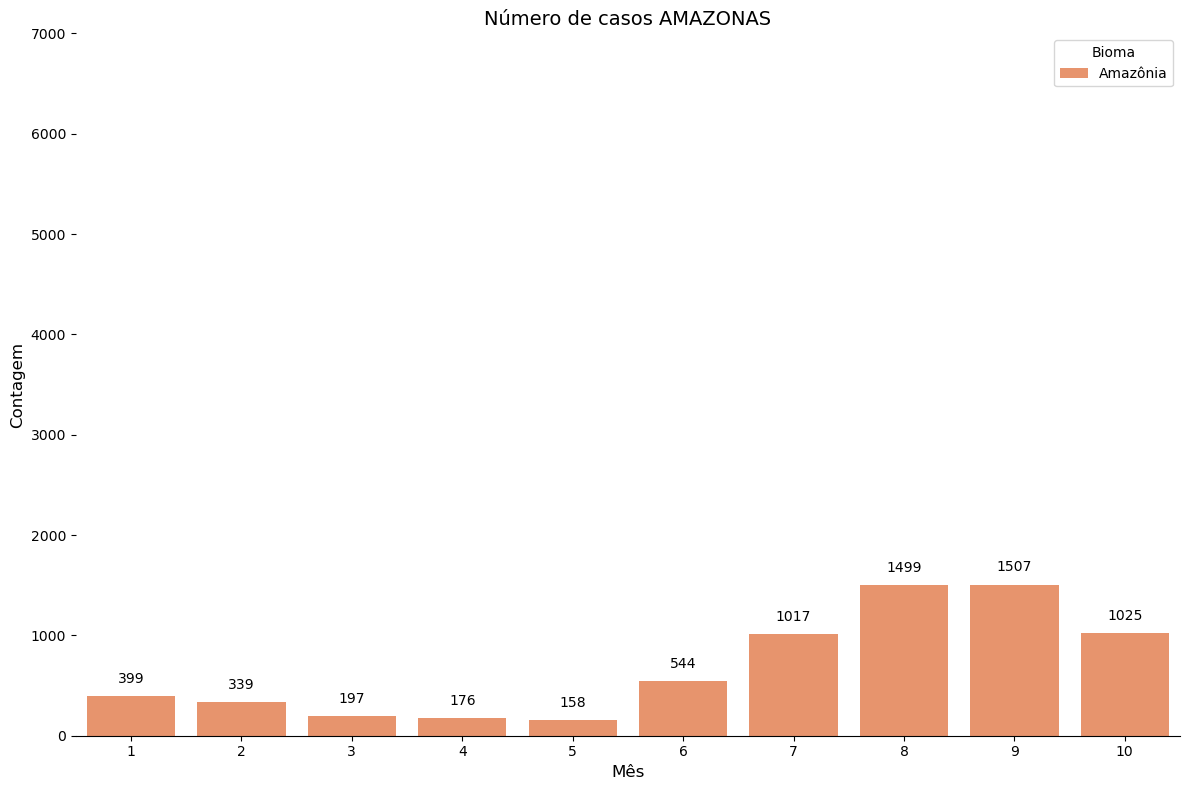

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

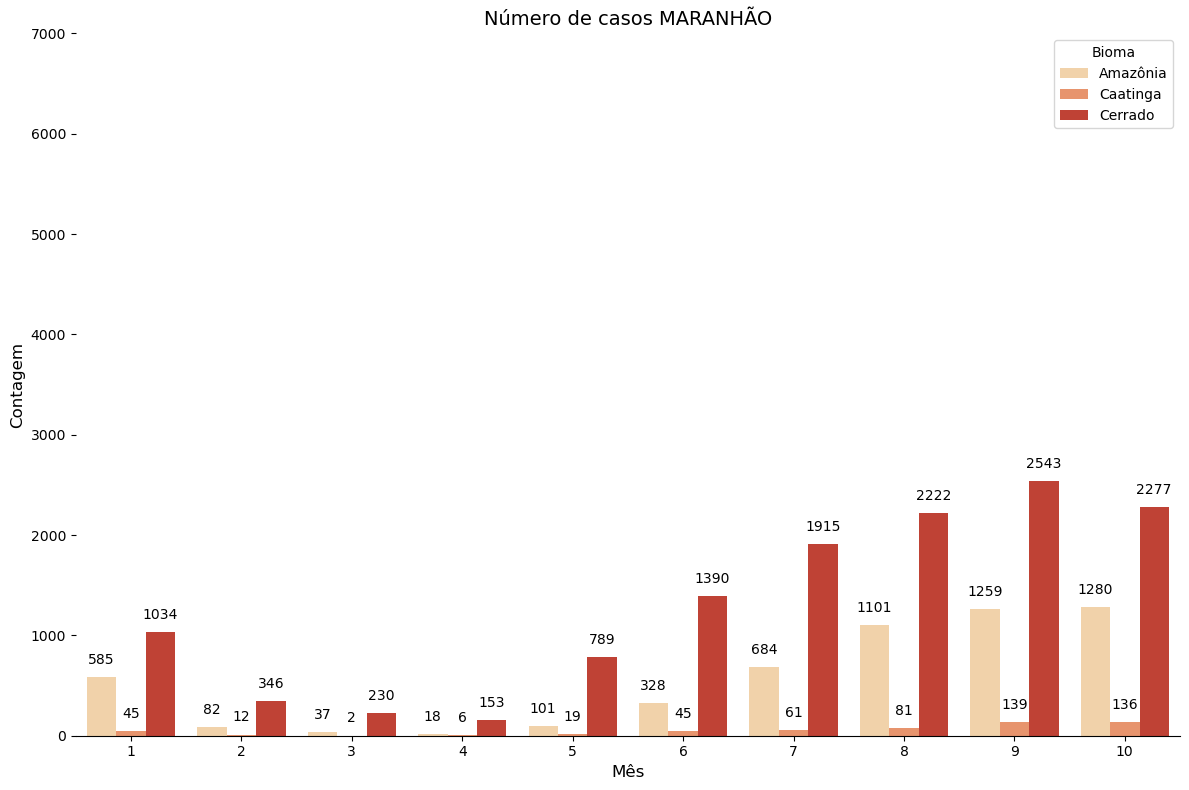

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

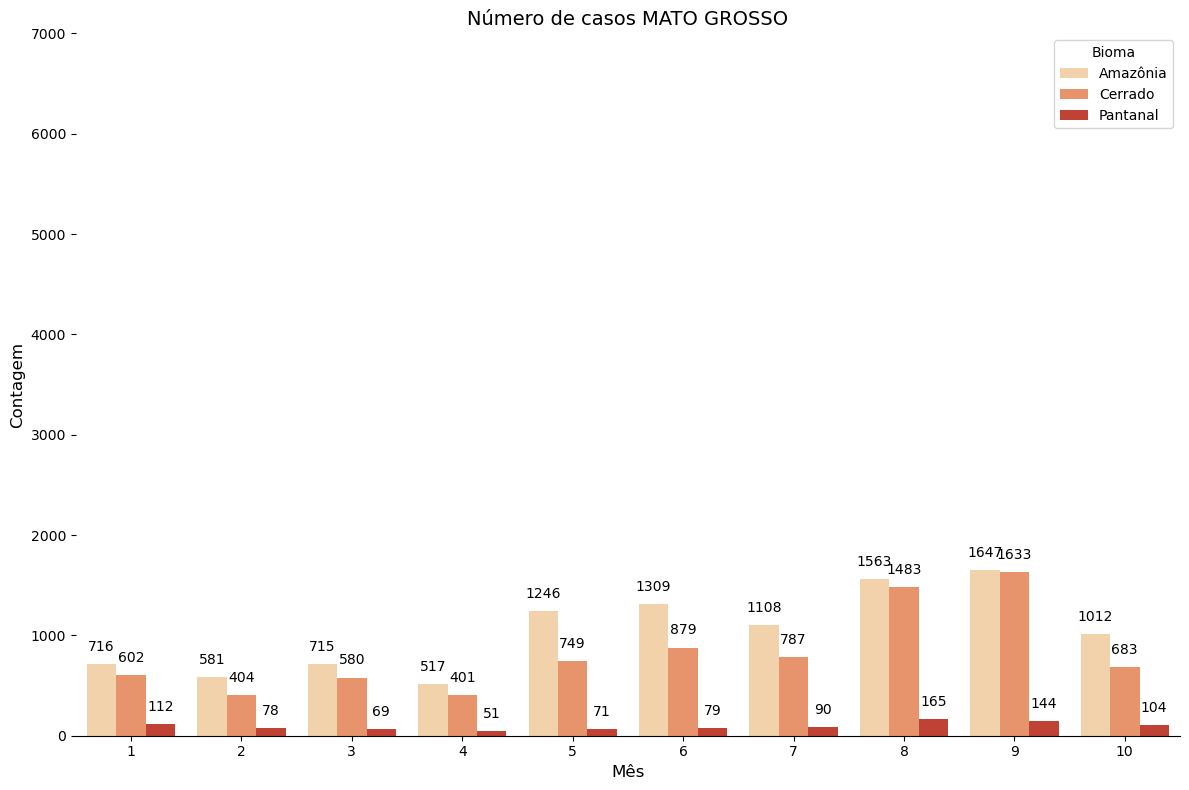

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

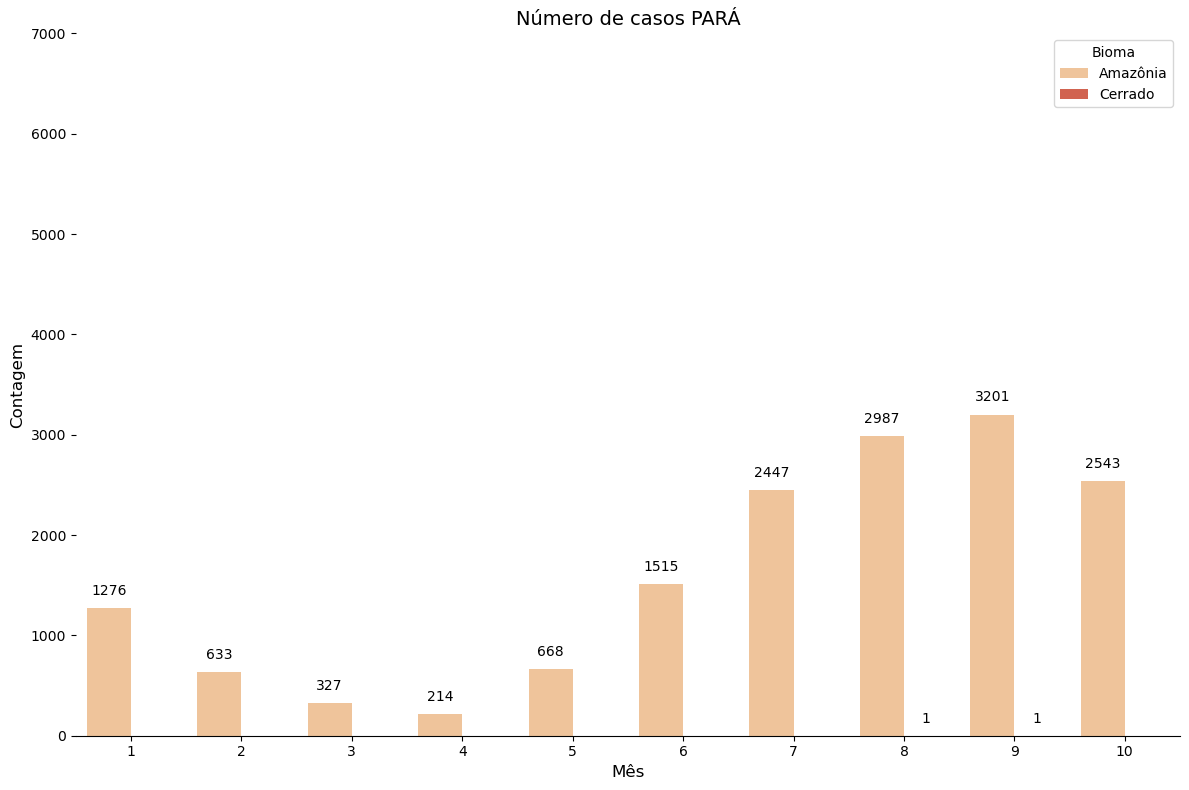

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

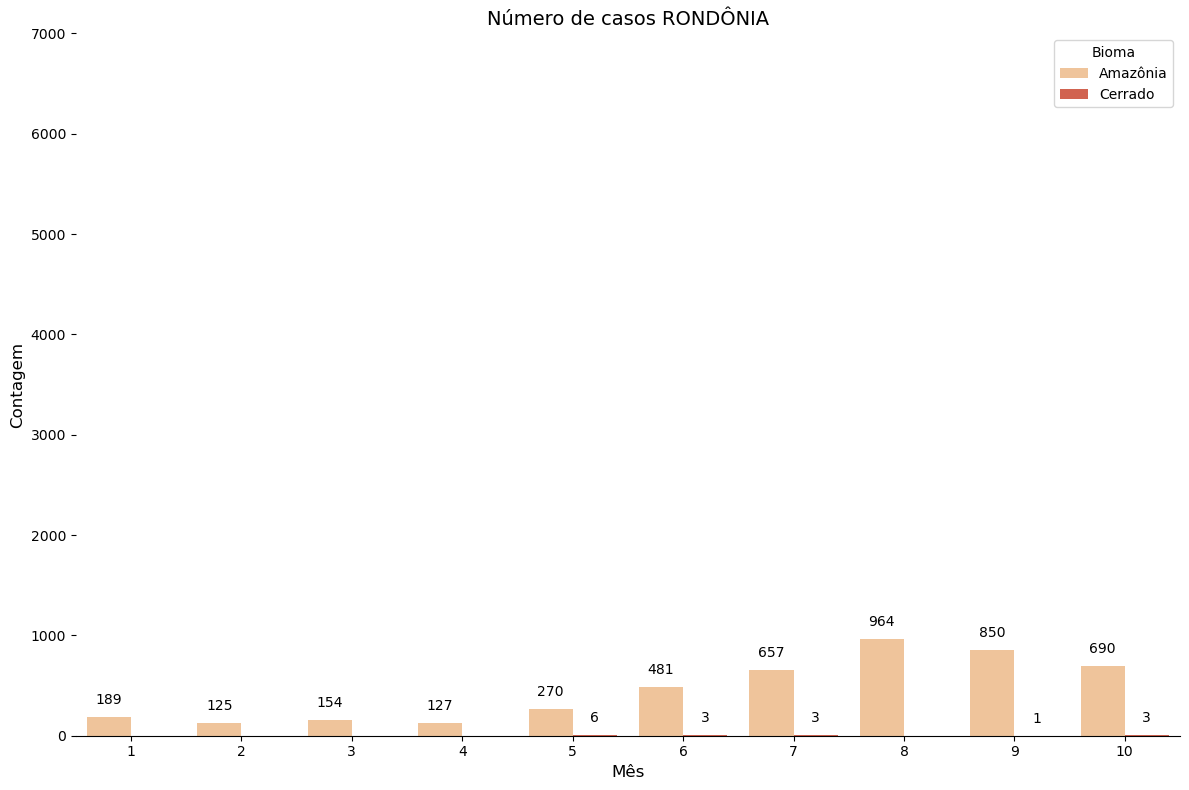

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

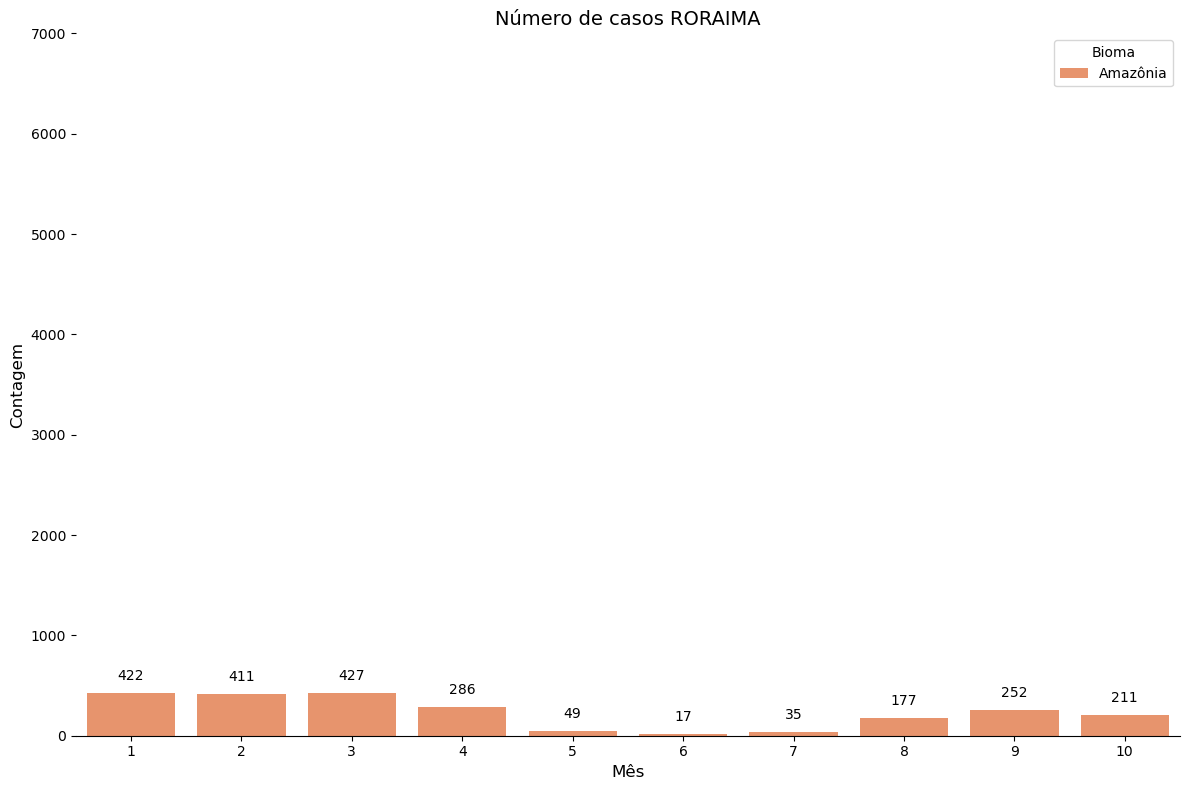

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

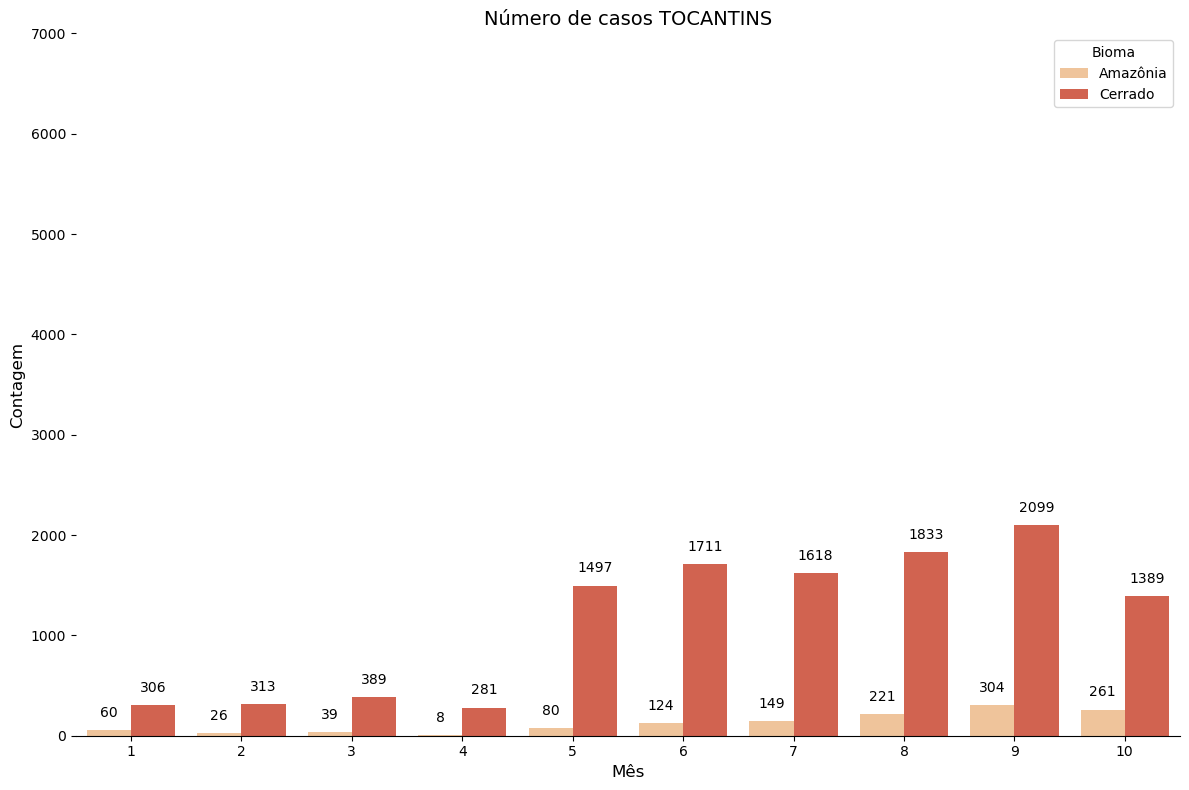

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

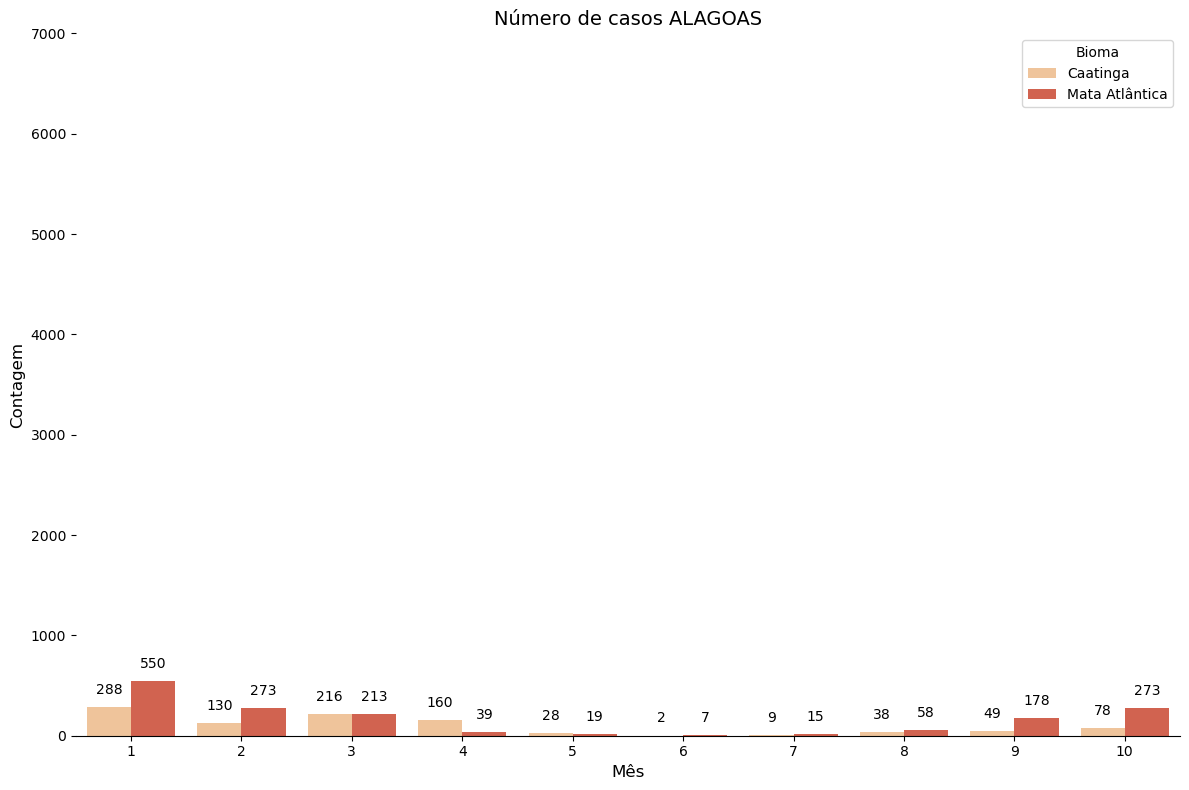

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

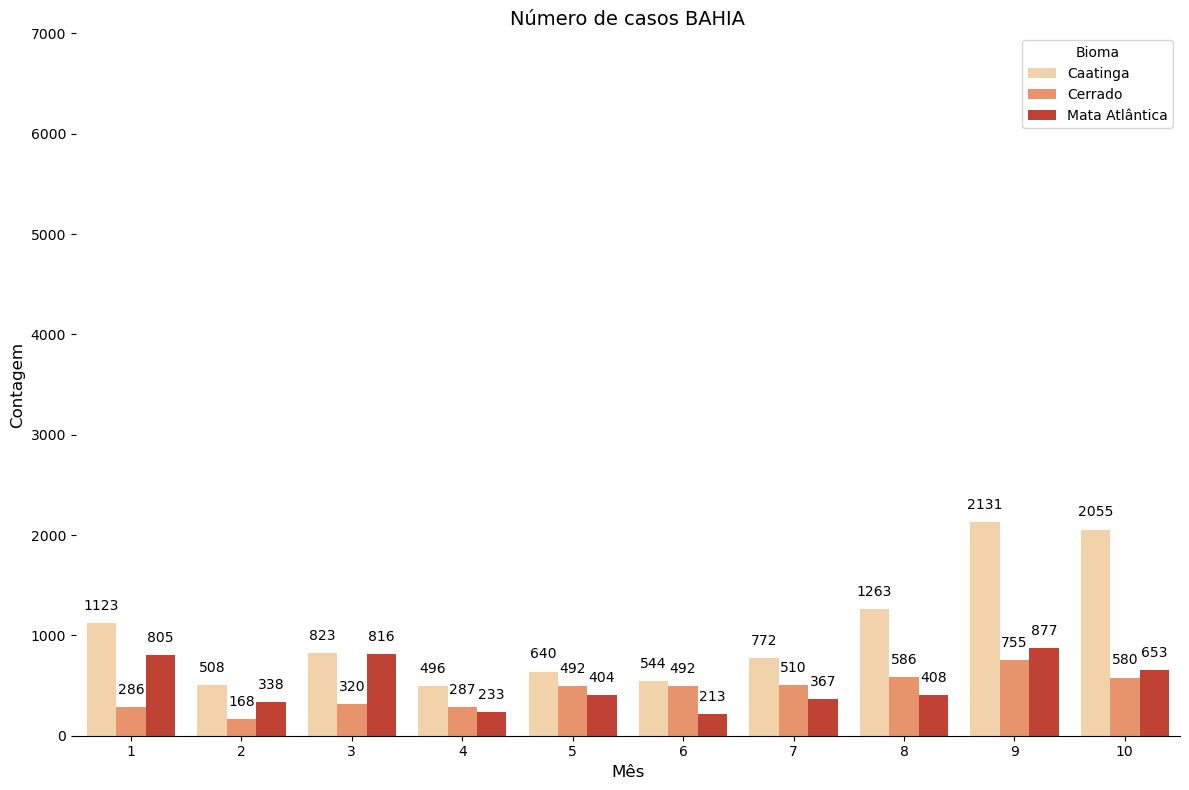

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

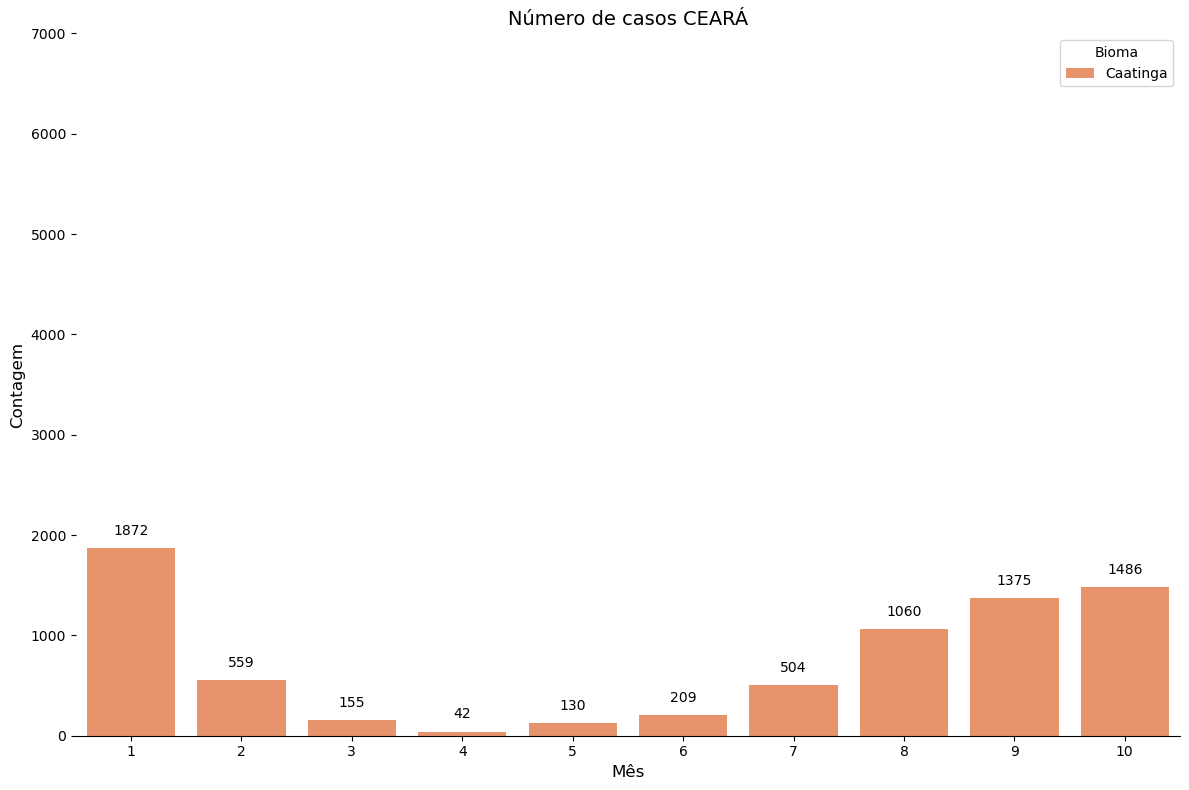

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

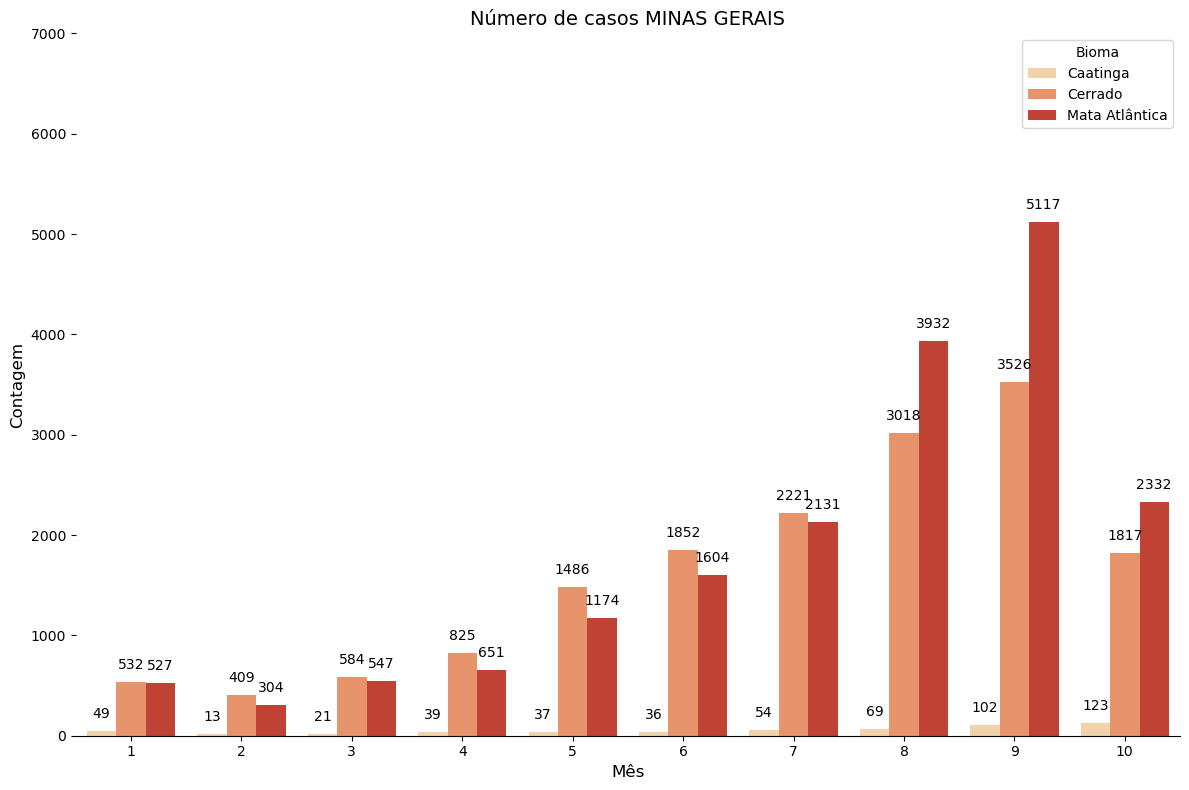

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

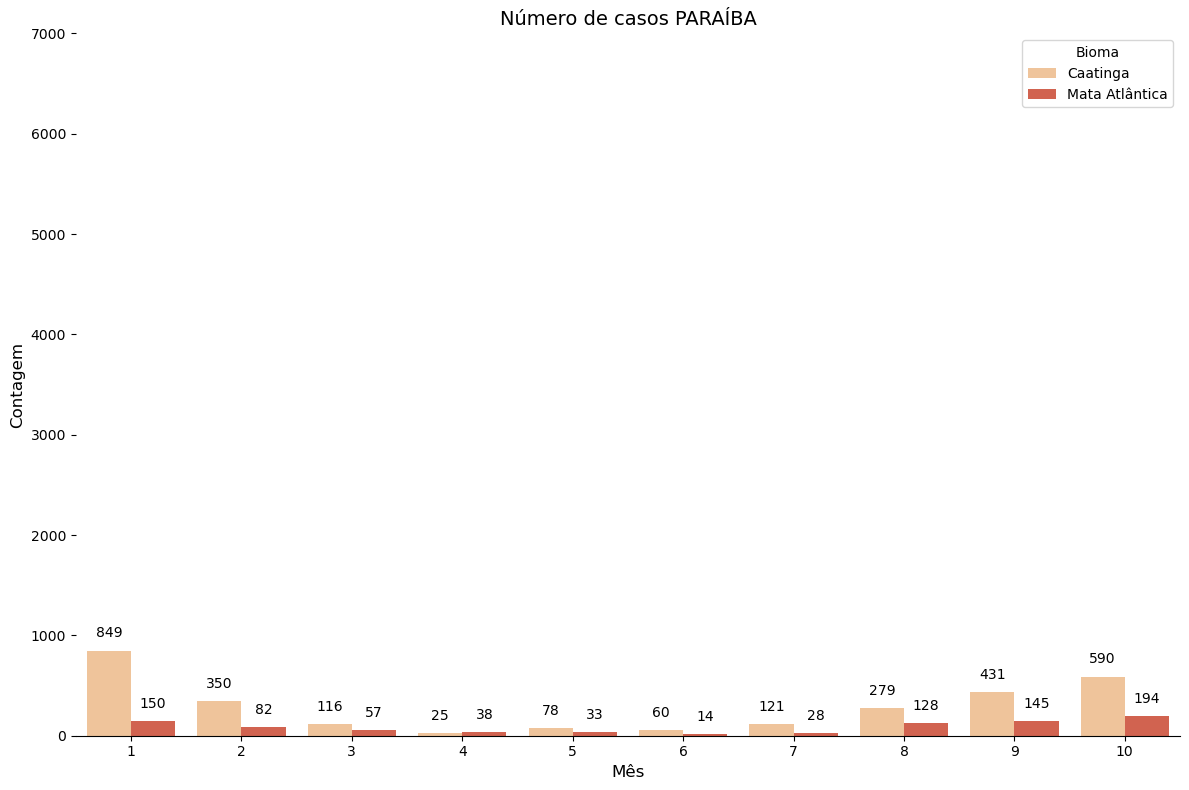

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

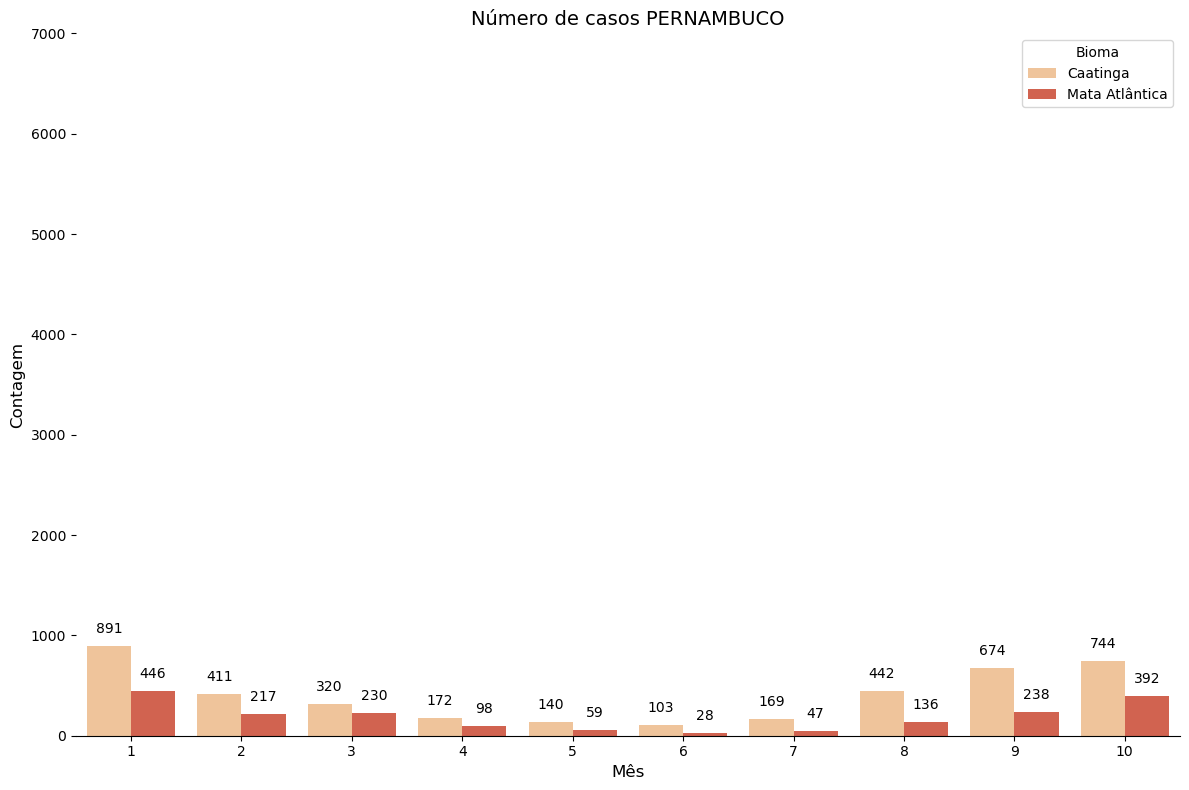

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

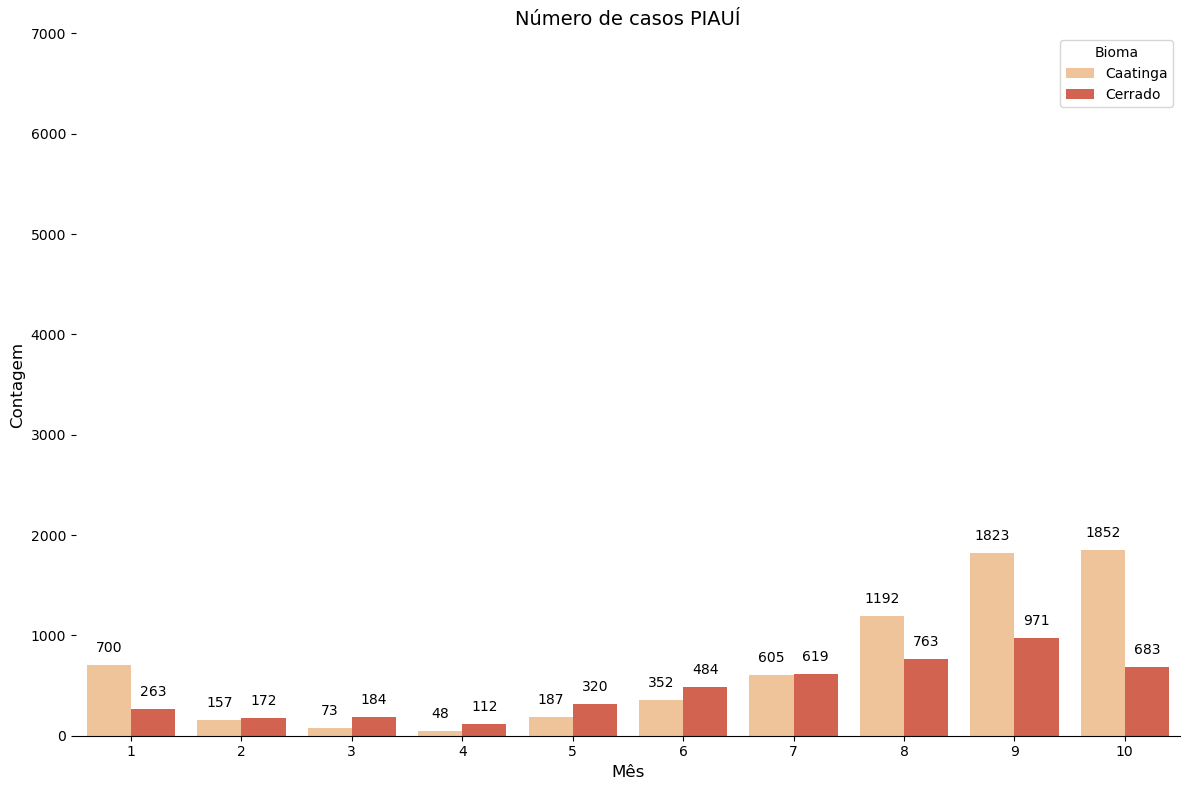

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

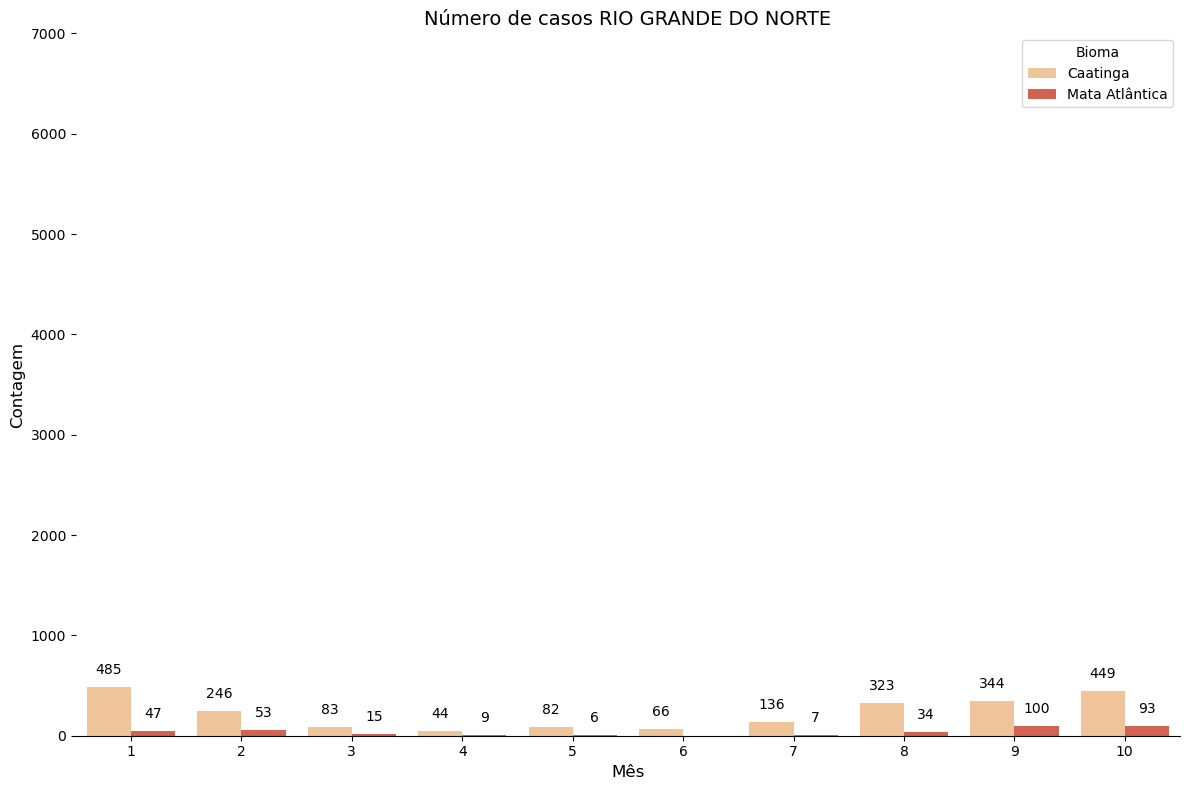

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

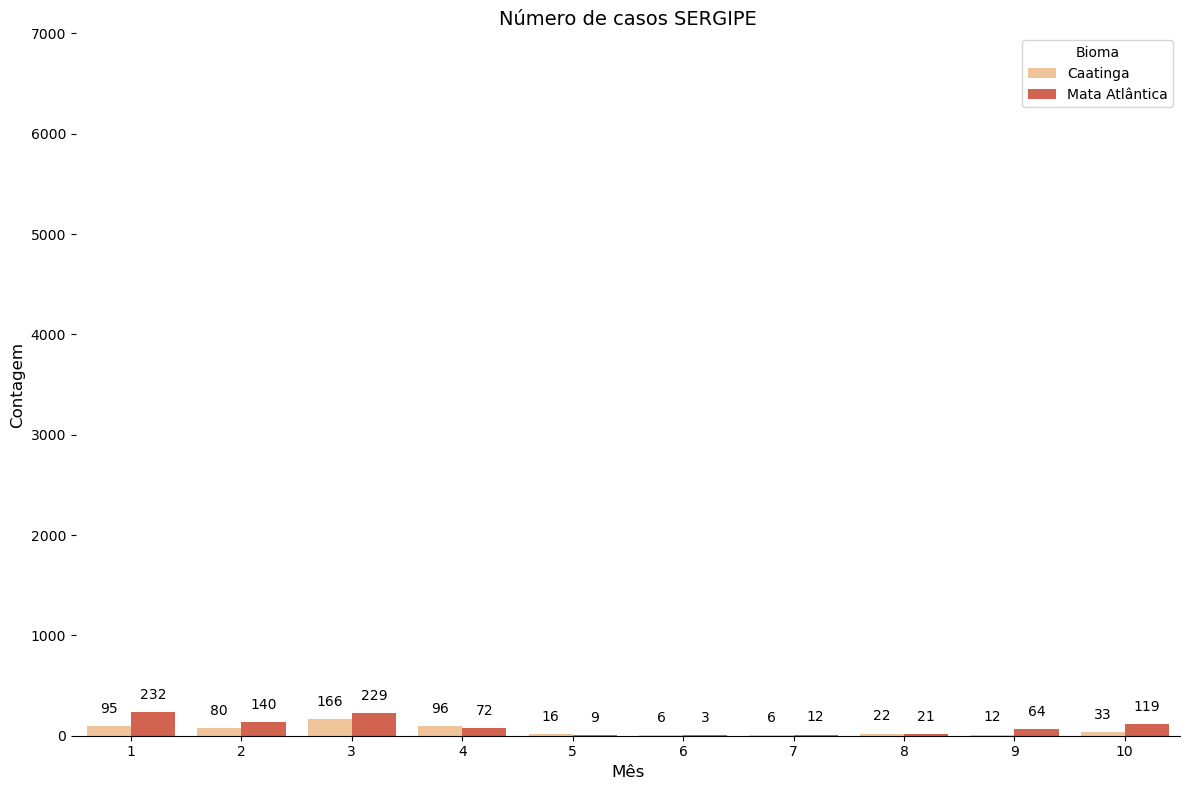

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

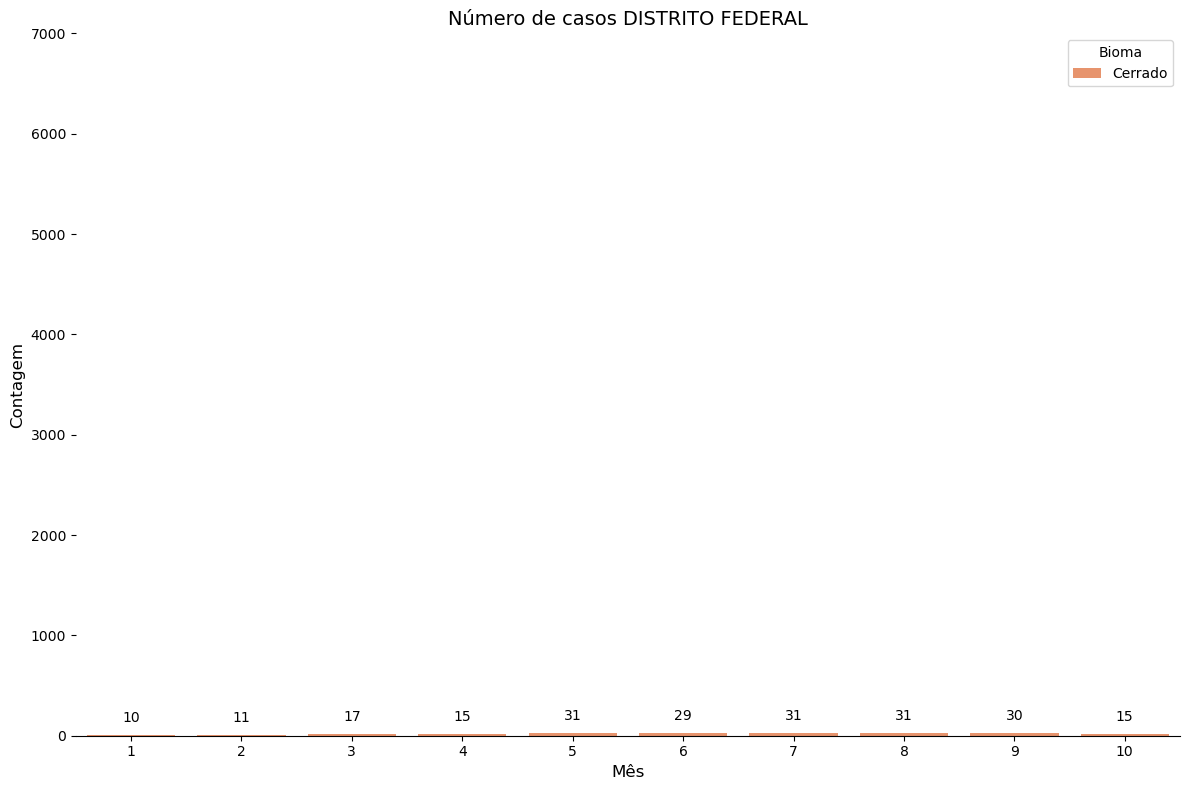

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

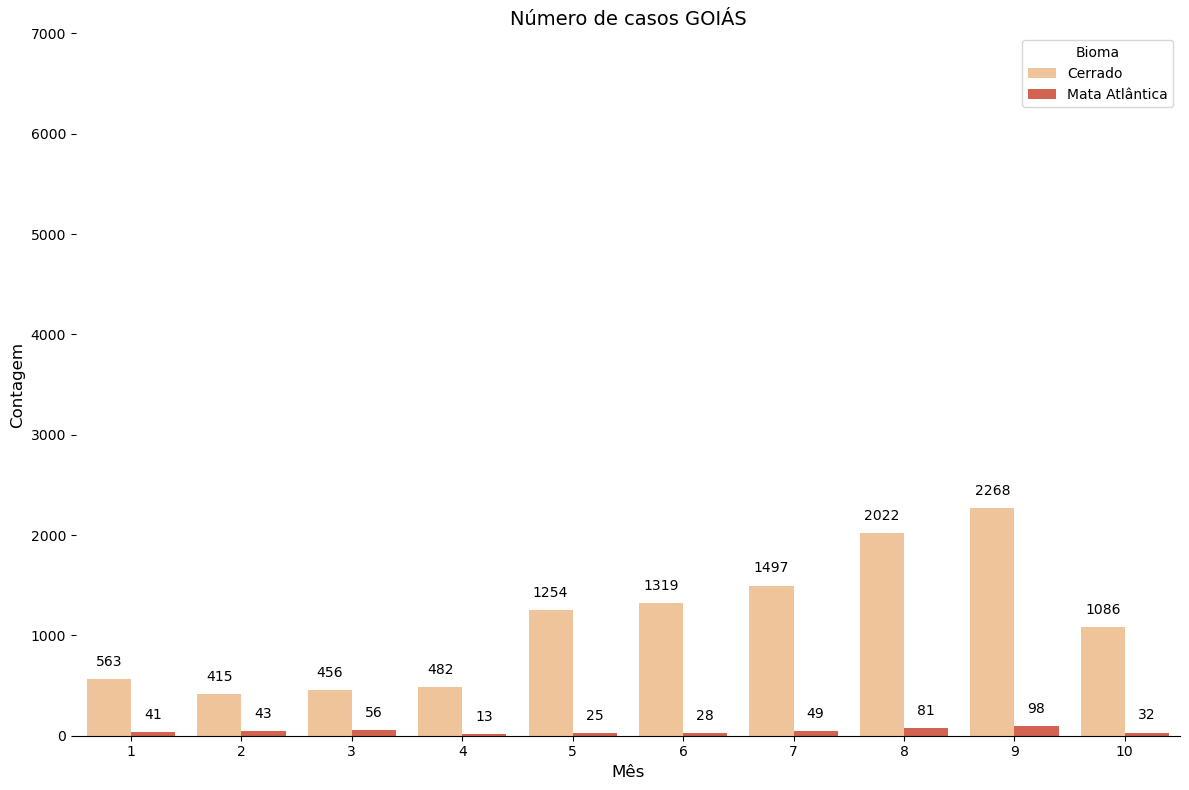

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

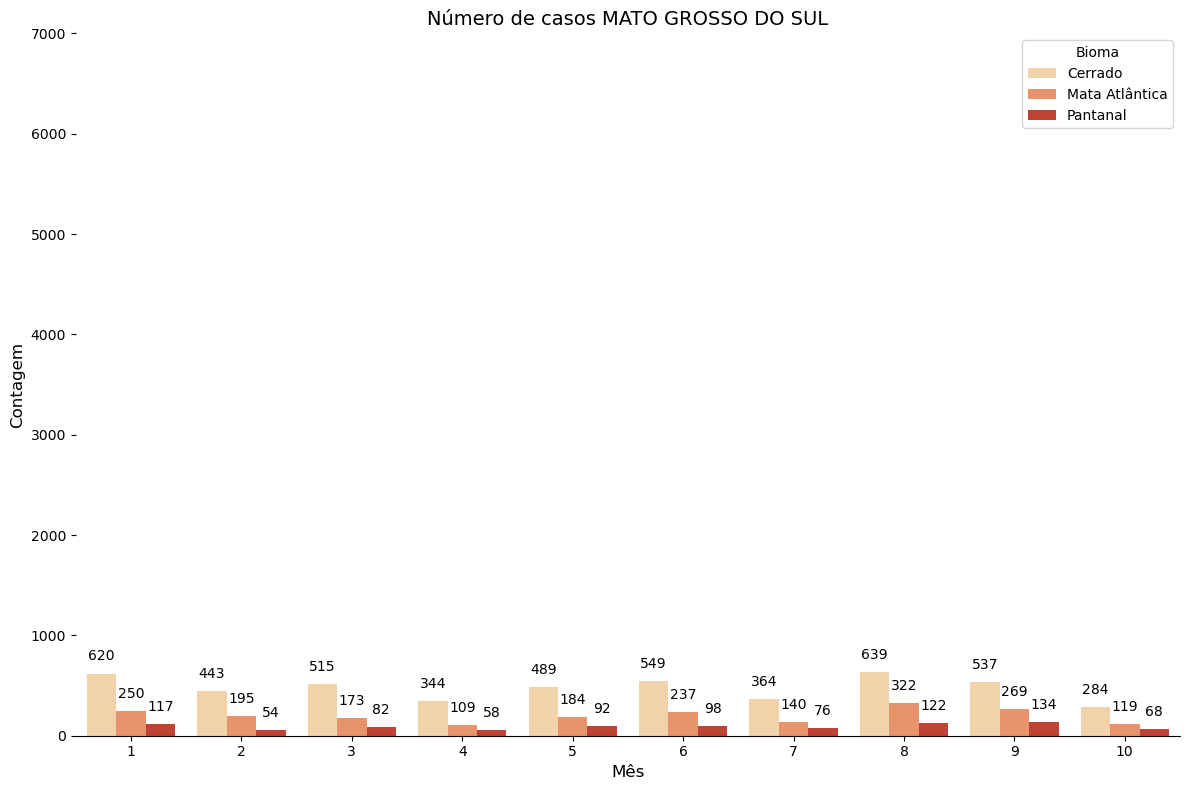

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

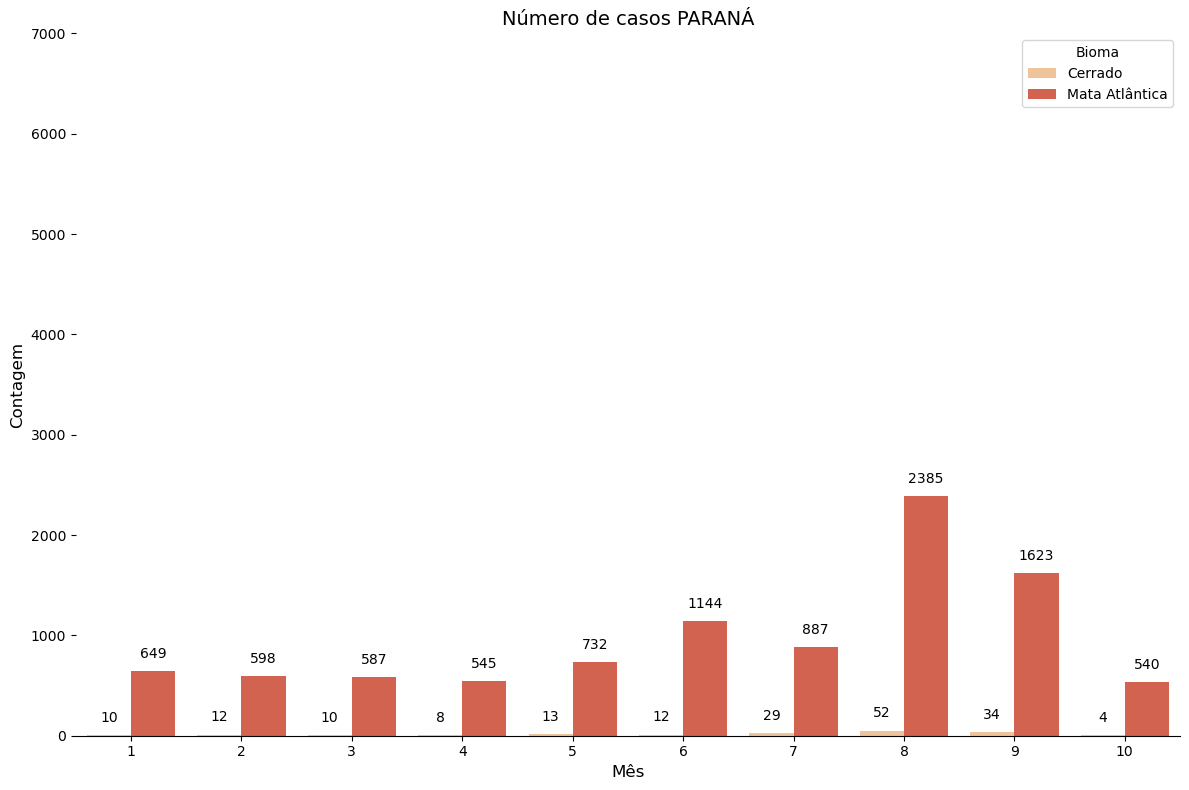

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

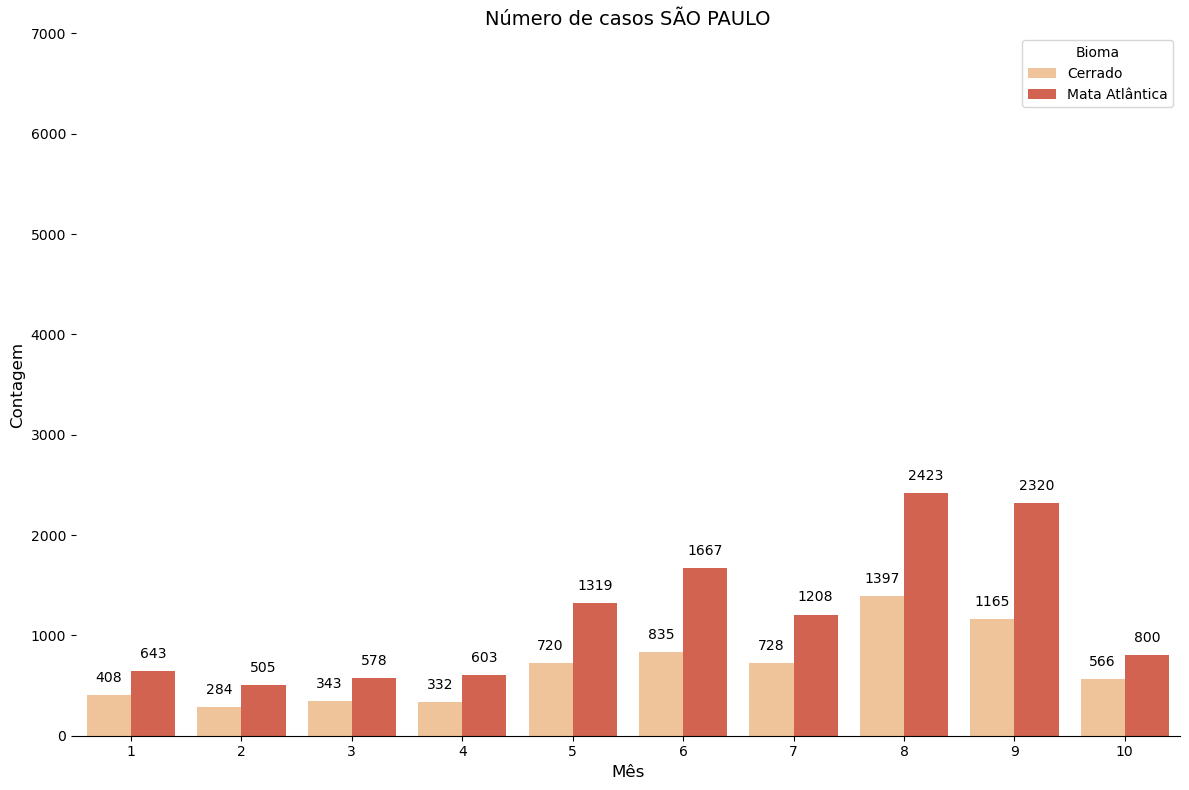

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

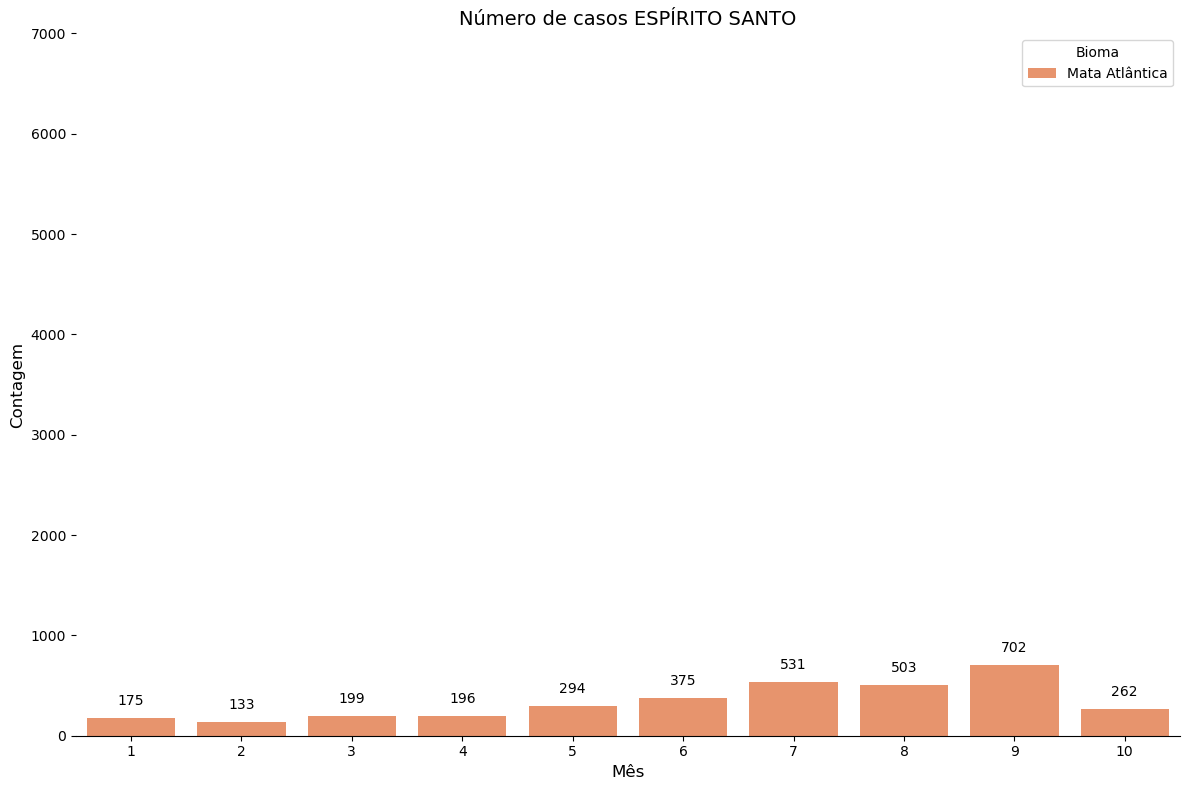

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

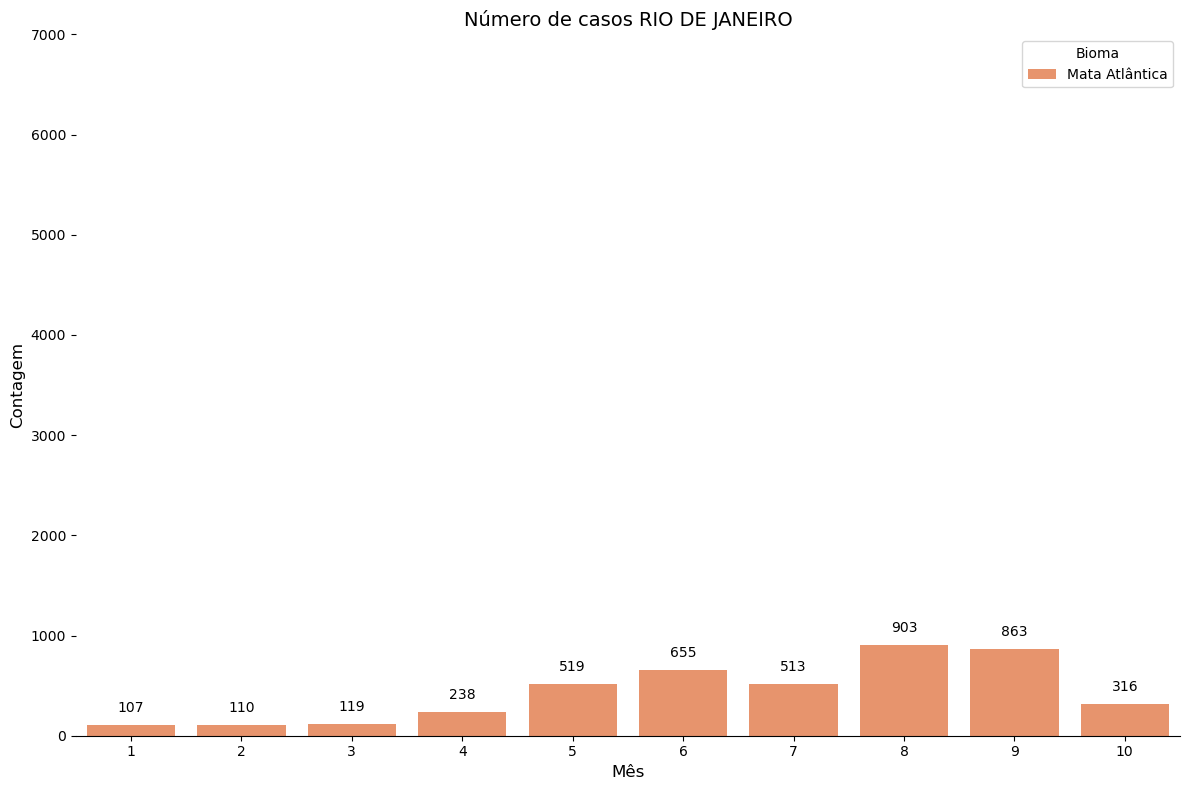

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

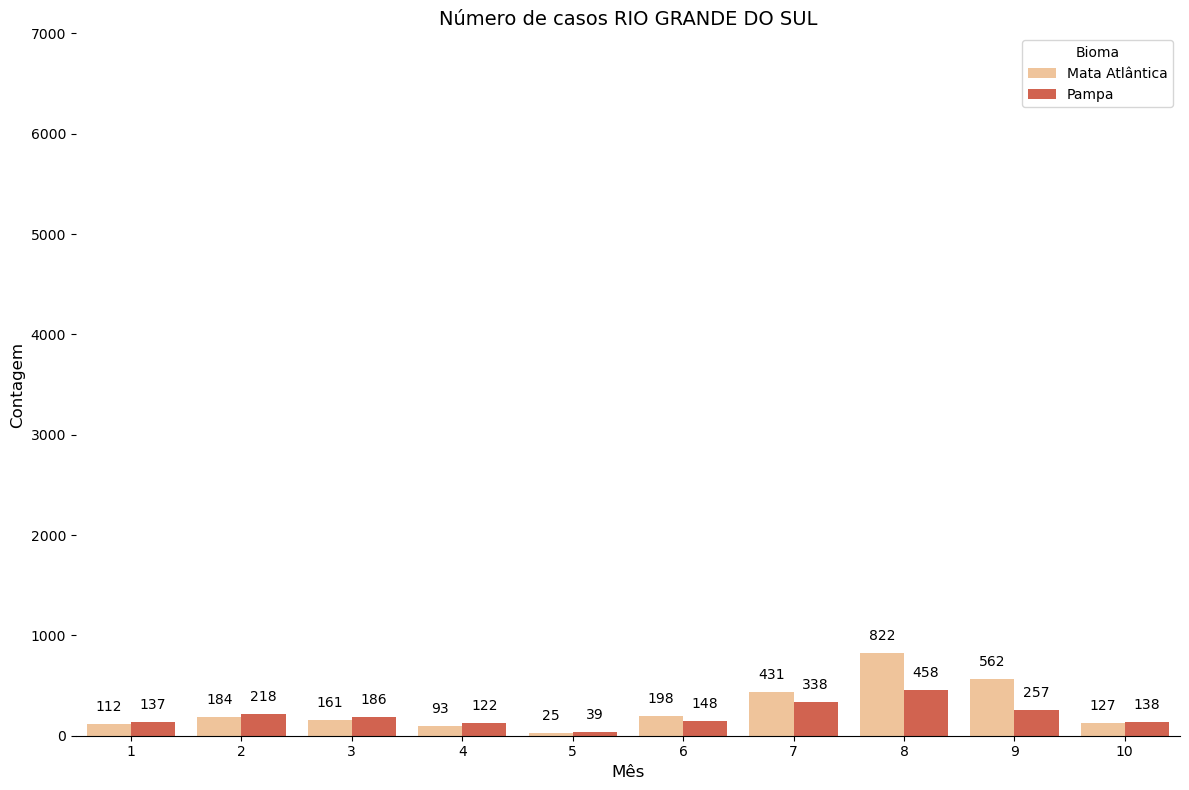

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

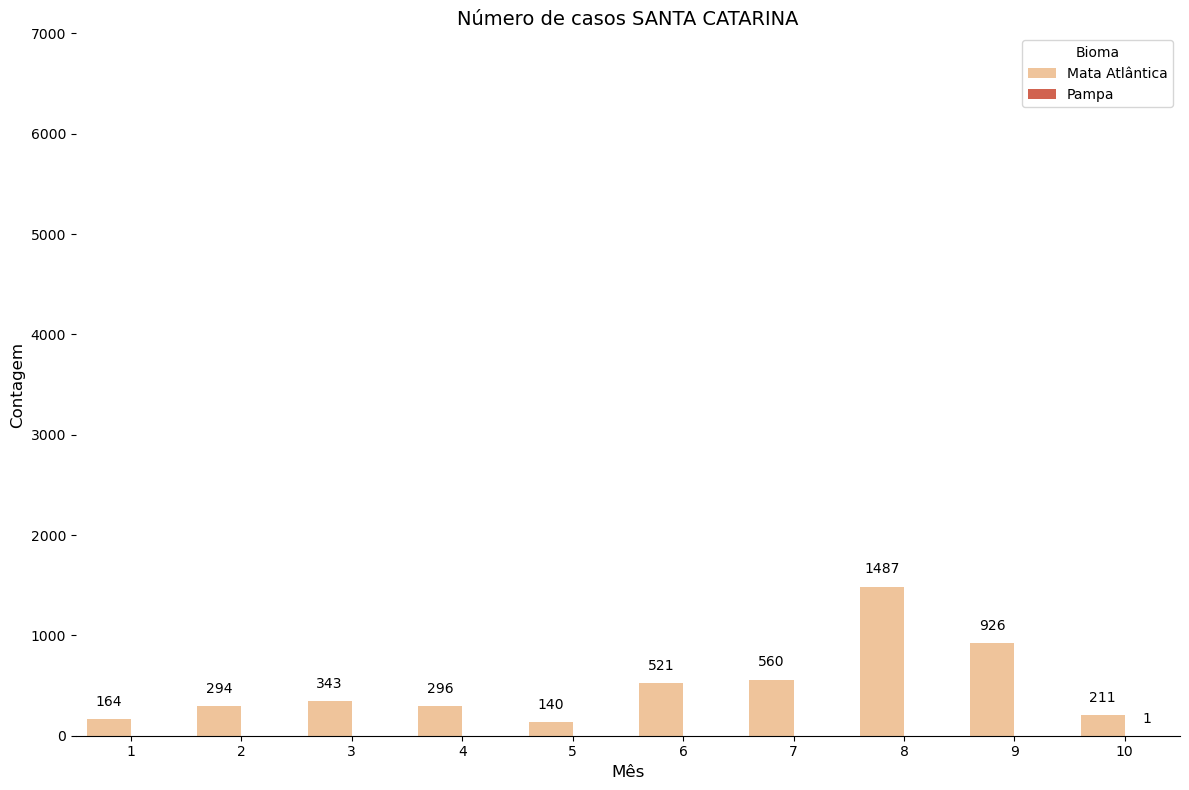

In [13]:
#gráfico de queimadas dos biomas por estado ao longo dos 10 meses

#criação do gráfico
for estado, data in dados_por_estado.items():
    df = pd.DataFrame(data)
    df['mês'] = df['mês'].astype(str)
    
    plt.figure(figsize=(12, 8))
    plot = sns.barplot(data=df, x='mês', y='count', hue='bioma', 
                       palette='OrRd')
    
    #adicionar os rótulos de valores nas barras
    for i in plot.patches:
        height = i.get_height()
        if height > 0:
            x = i.get_x() + i.get_width() / 2
            y = height + 100
            value_label = f'{int(height)}'
            plot.annotate(value_label, (x,y), ha='center', va='bottom', fontsize=10, color='black')
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0,7000)
    
    plt.title(f'Número de casos {estado}', fontsize=14)
    plt.xlabel('Mês', fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    plt.legend(title='Bioma')
    plt.tight_layout()

    plt.savefig(f'Queimadas2024_{estado.lower().replace(" ", "_")}.png', format='png', dpi=300)

    plt.show()

In [14]:
df_biomas = arquivo.groupby('bioma')[['bioma']].count().rename(columns={'bioma': 'count'})
df_biomas

count
bioma                
Amazônia        50108
Caatinga        36578
Cerrado         81199
Mata Atlântica  68673
Pampa            2042
Pantanal         1864

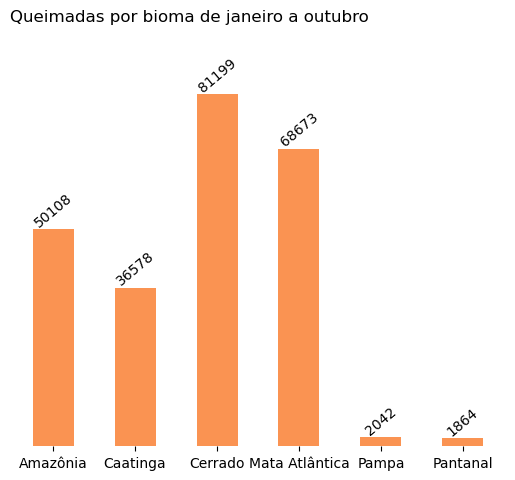

In [15]:
#gráfico de queimadas por bioma no total dos 10 meses

fig, ax = plt.subplots()
bars = ax.bar(list(df_biomas.index), df_biomas["count"], color="#FA9352", width=0.5)

for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
            ha='center', va='bottom', rotation=40)

ax.set_xticks(list(df_biomas.index))
ax.set_xticklabels(list(df_biomas.index))

ax.set_title('Queimadas por bioma de janeiro a outubro', loc='left', pad=40)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)

plt.show()
fig.savefig('queimadas_biomas_2024.png', dpi=100, bbox_inches='tight', orientation='portrait')

In [16]:
##contagem de ocorrências em cada estado por ano
df_estado_mes = arquivo.groupby(['estado', 'mês'])[['estado']].count().rename(columns={'estado': 'count'})
df_estado_mes = df_estado_mes.reset_index()
df_estado_mes

estado  mês  count
0         ACRE    1     50
1         ACRE    2     26
2         ACRE    3     60
3         ACRE    4     75
4         ACRE    5    114
..         ...  ...    ...
265  TOCANTINS    6   1835
266  TOCANTINS    7   1767
267  TOCANTINS    8   2054
268  TOCANTINS    9   2403
269  TOCANTINS   10   1650

[270 rows x 3 columns]

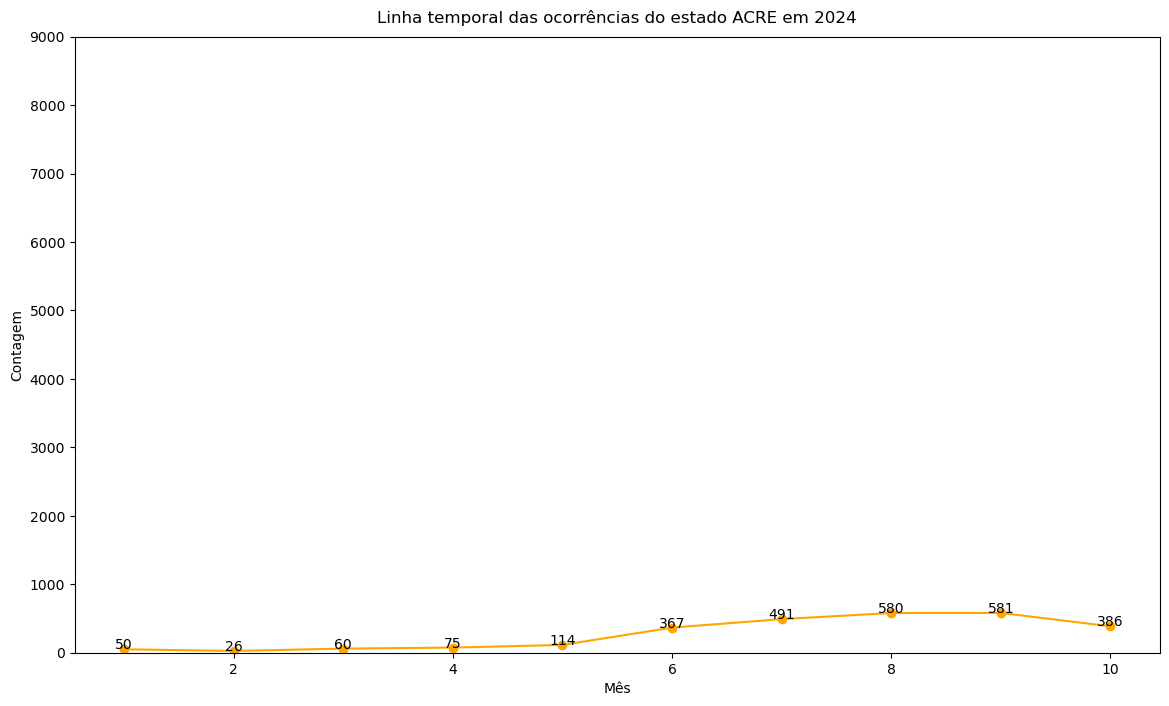

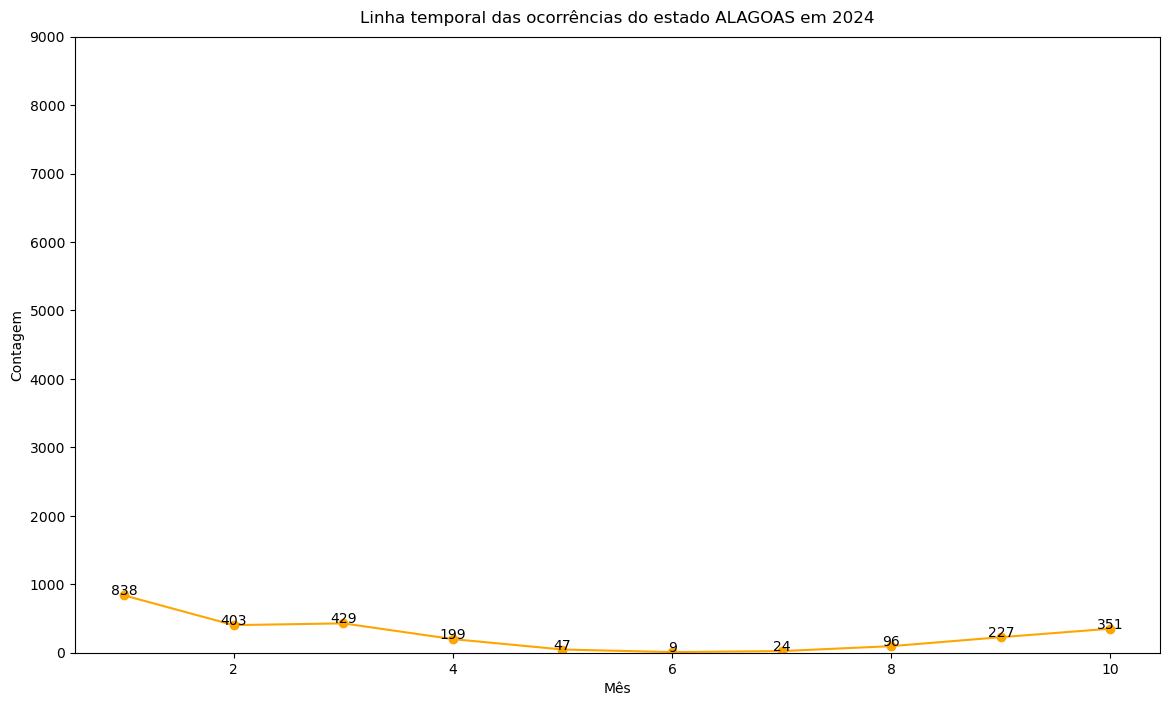

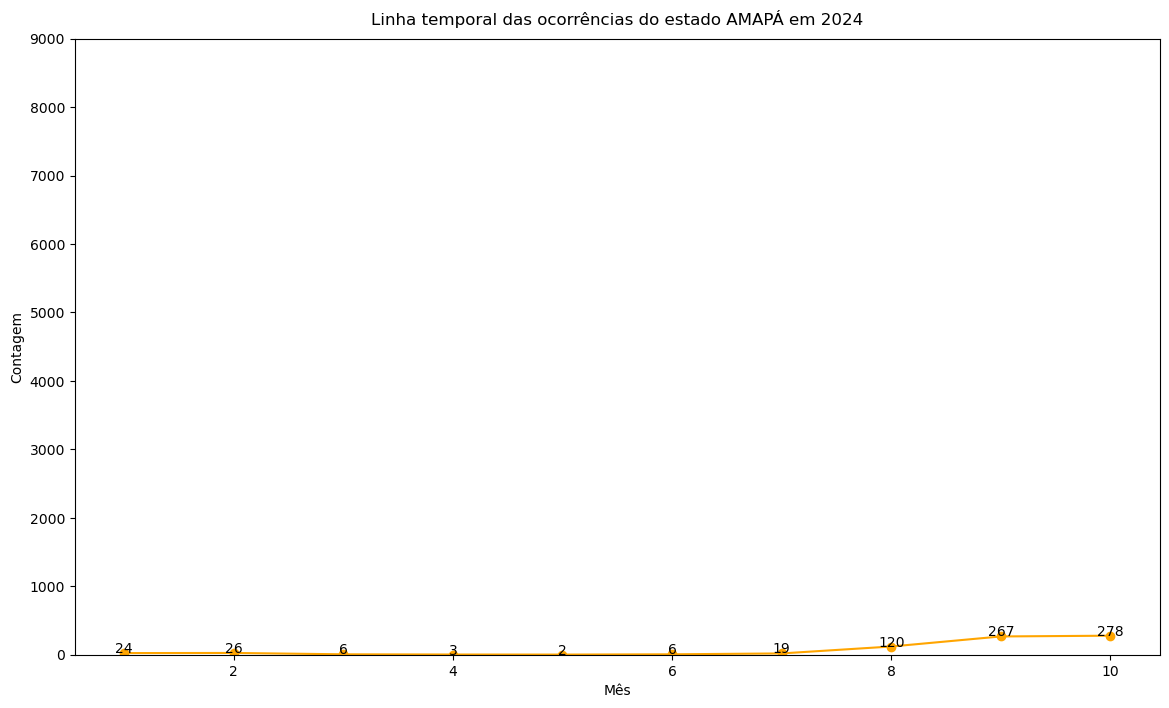

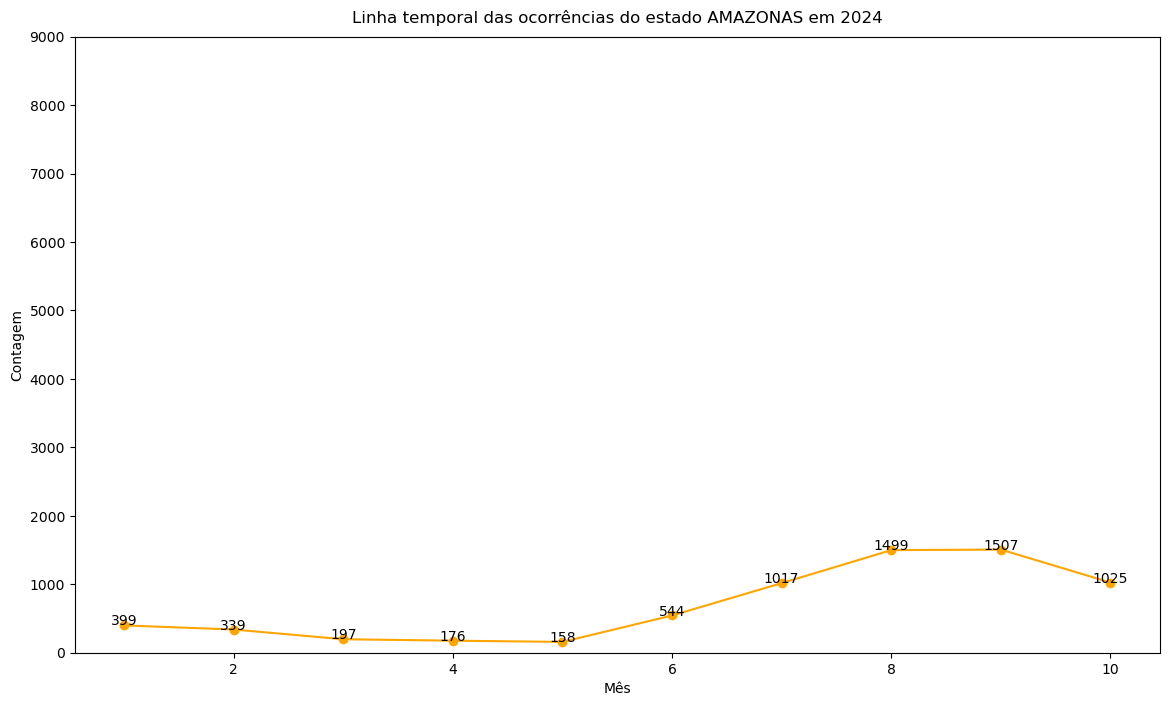

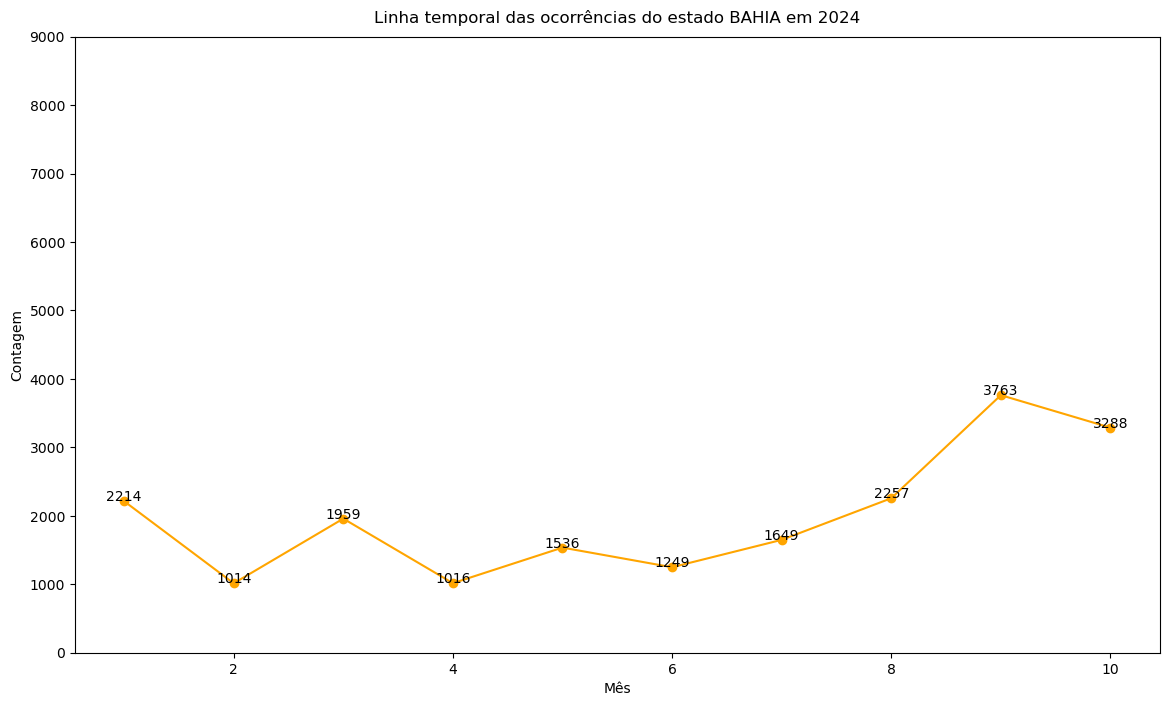

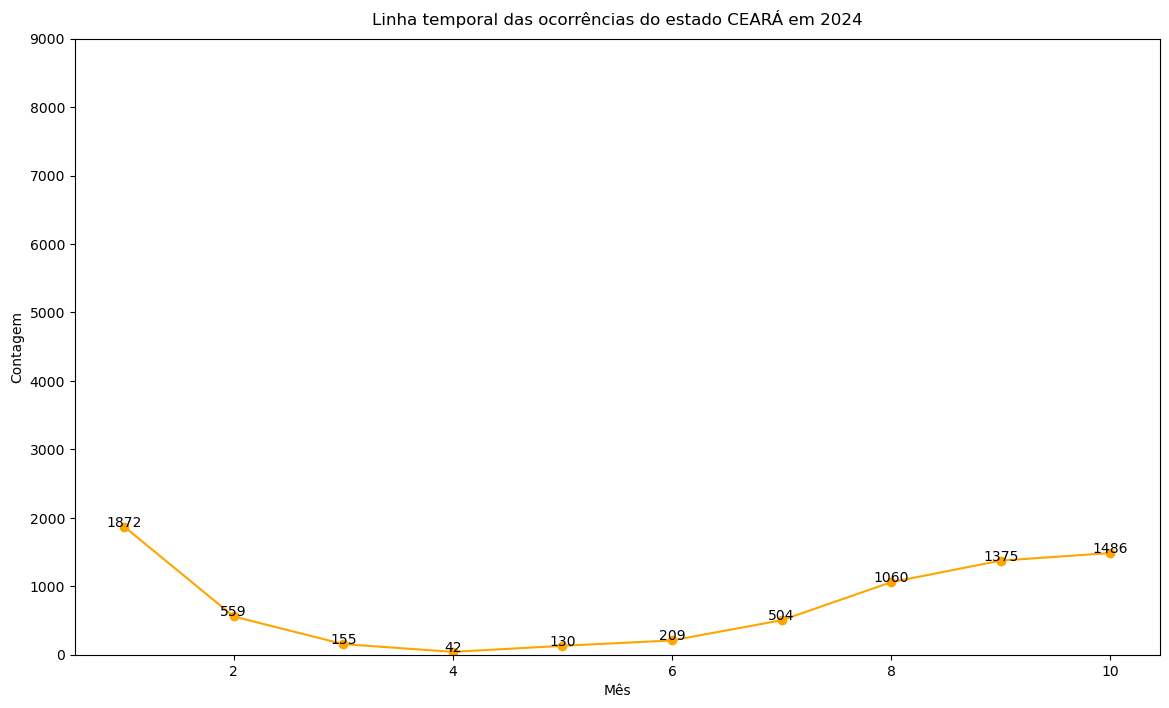

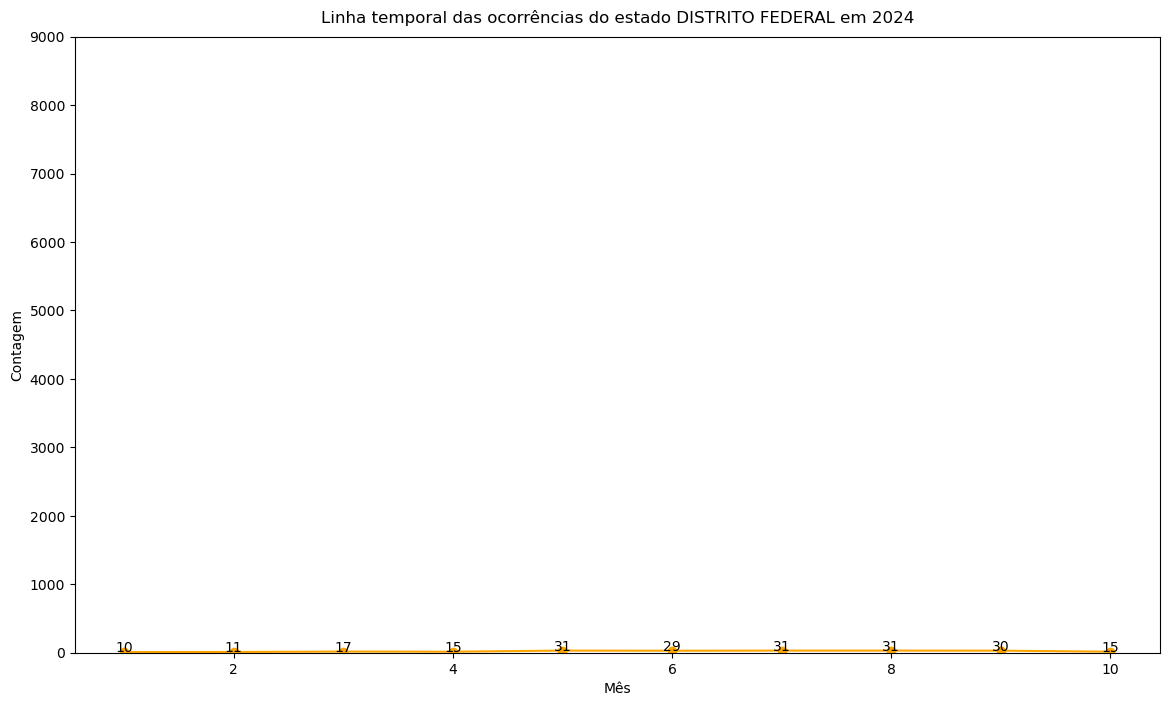

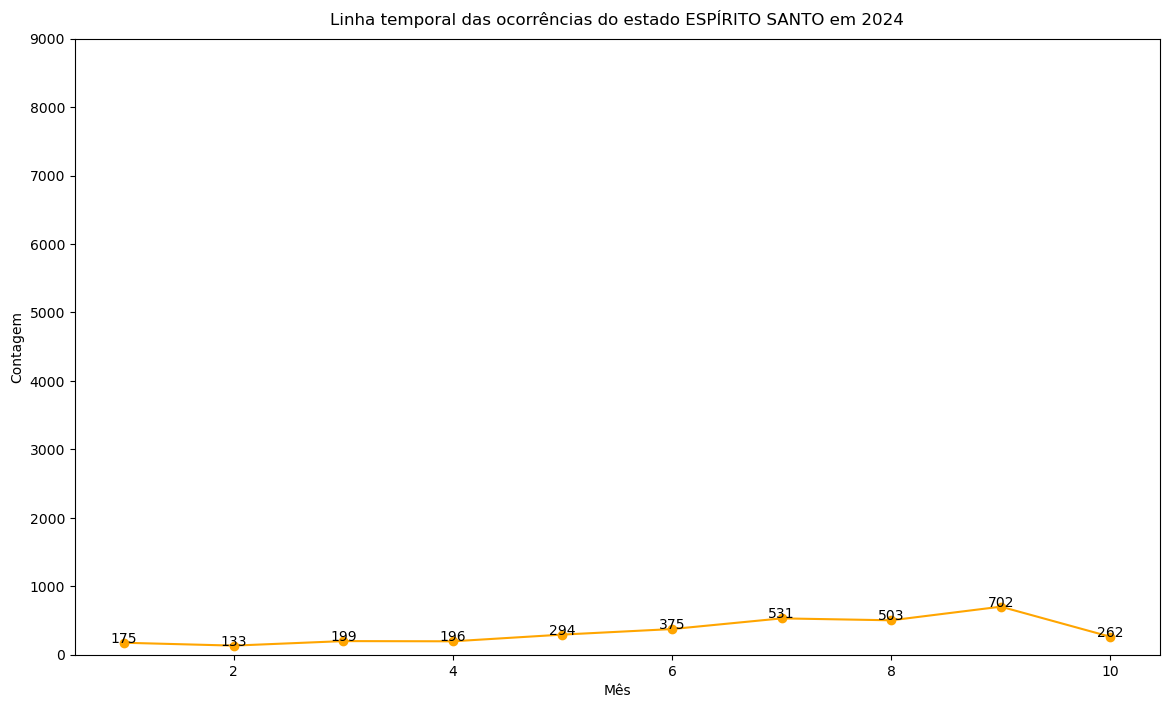

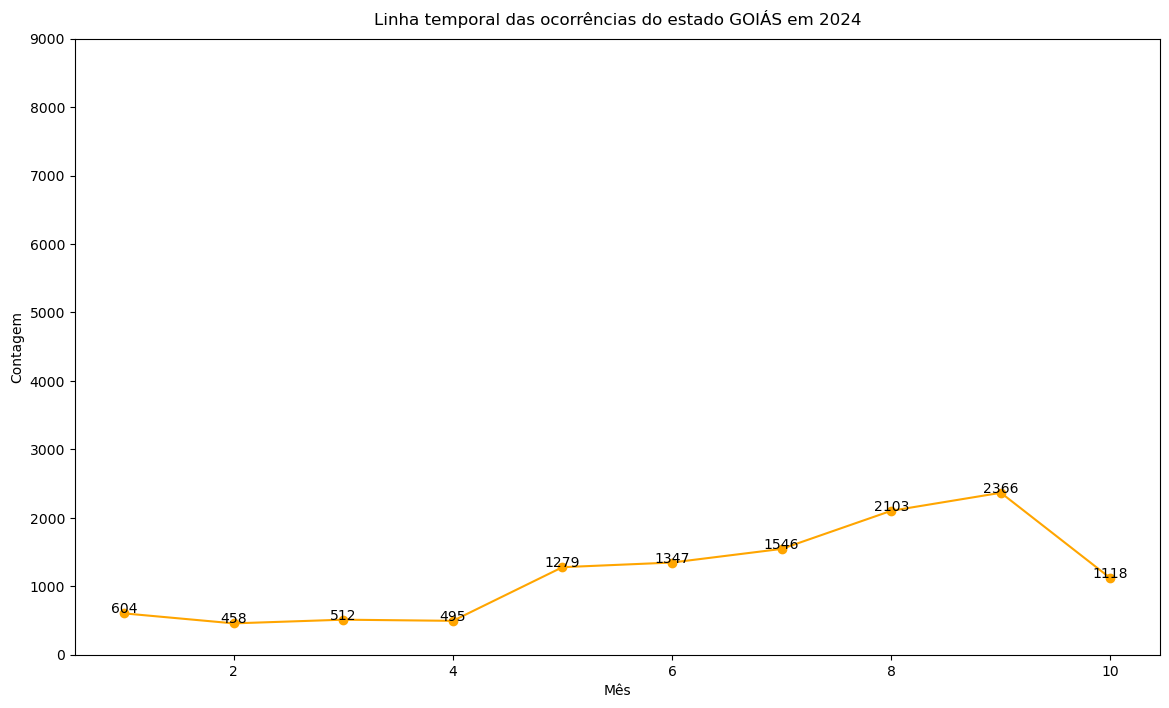

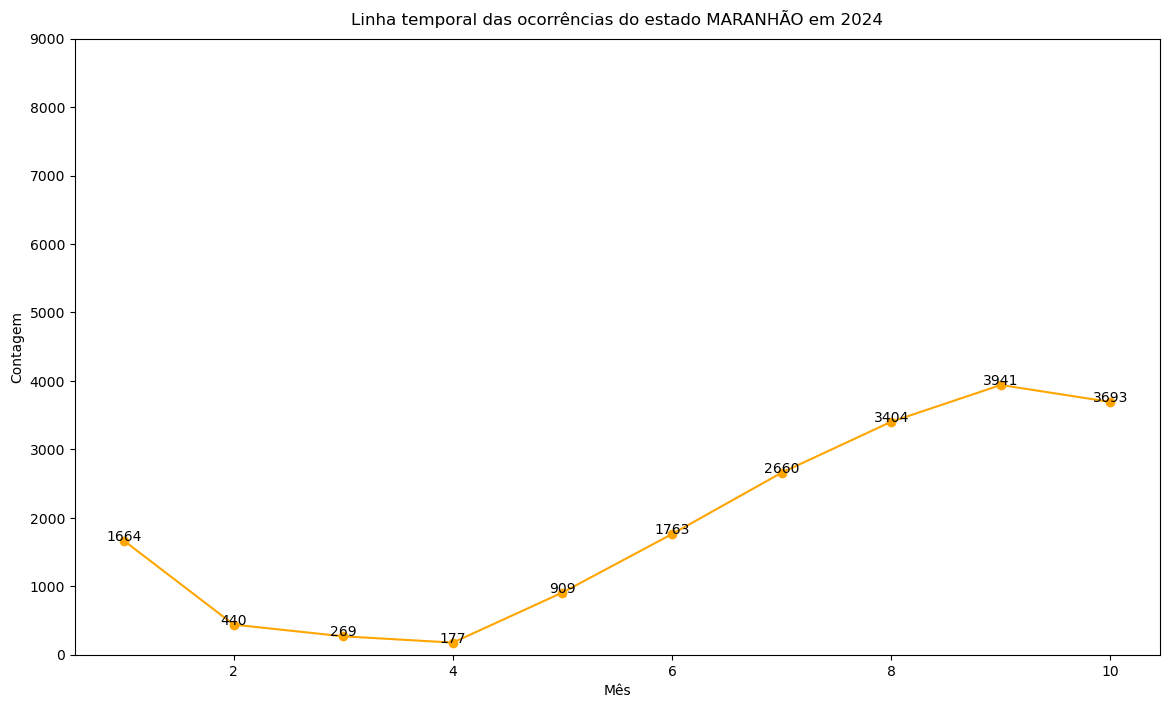

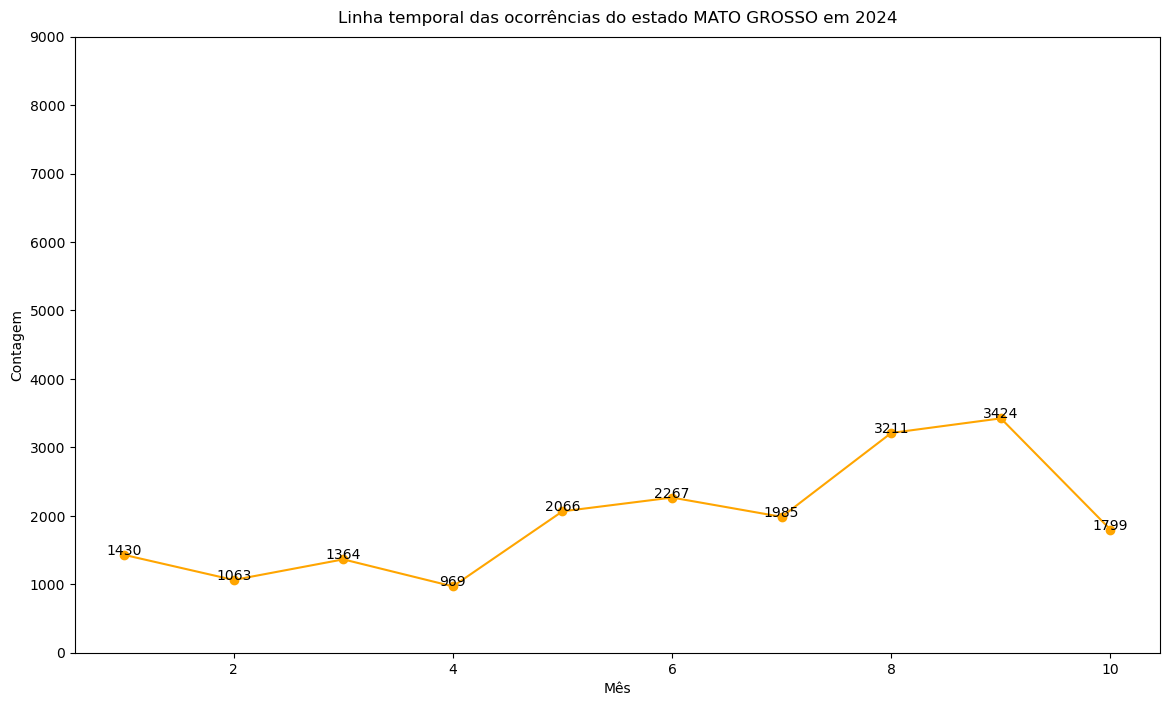

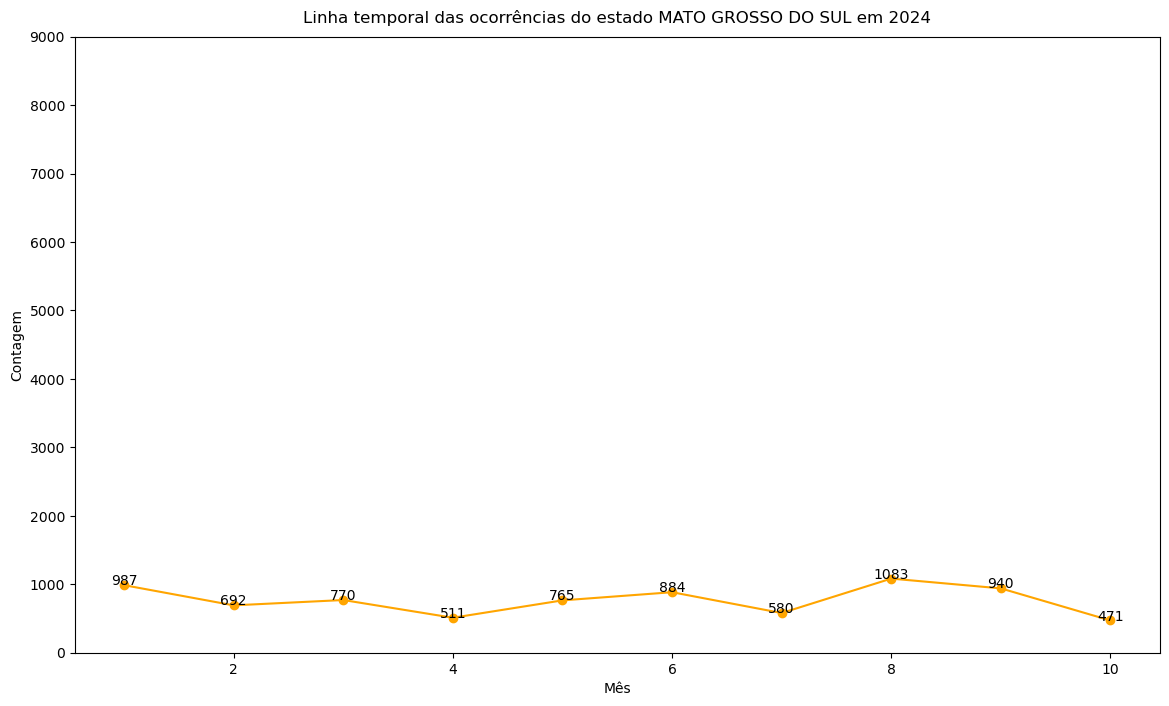

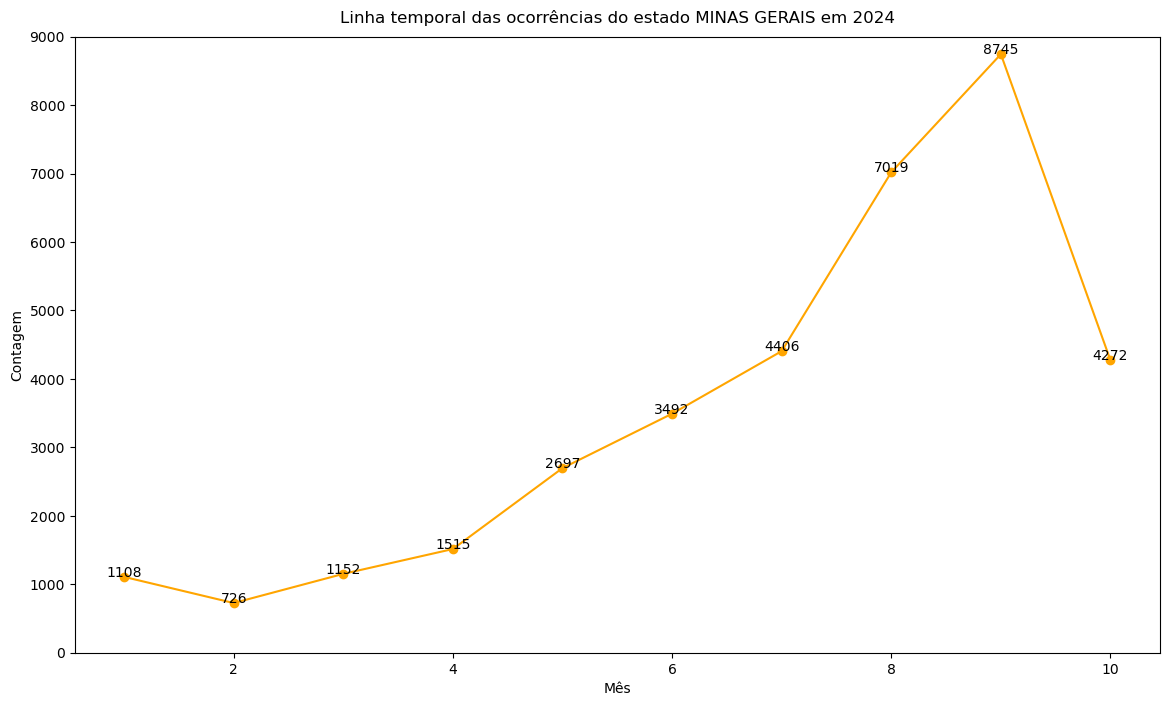

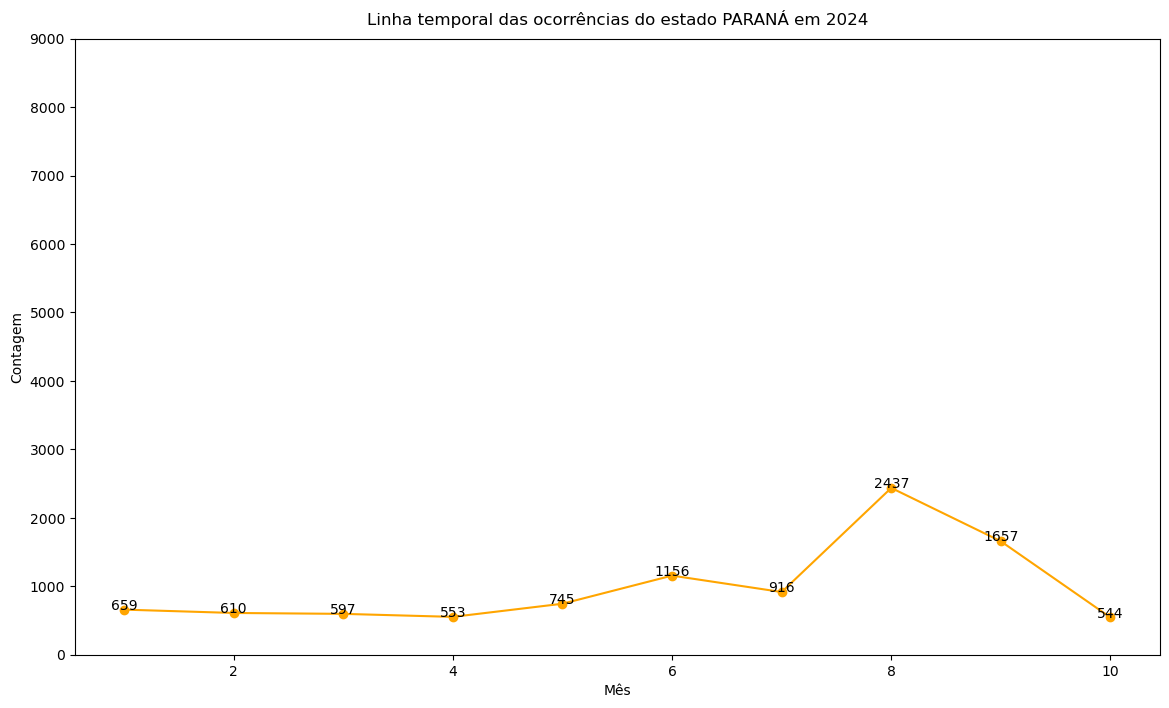

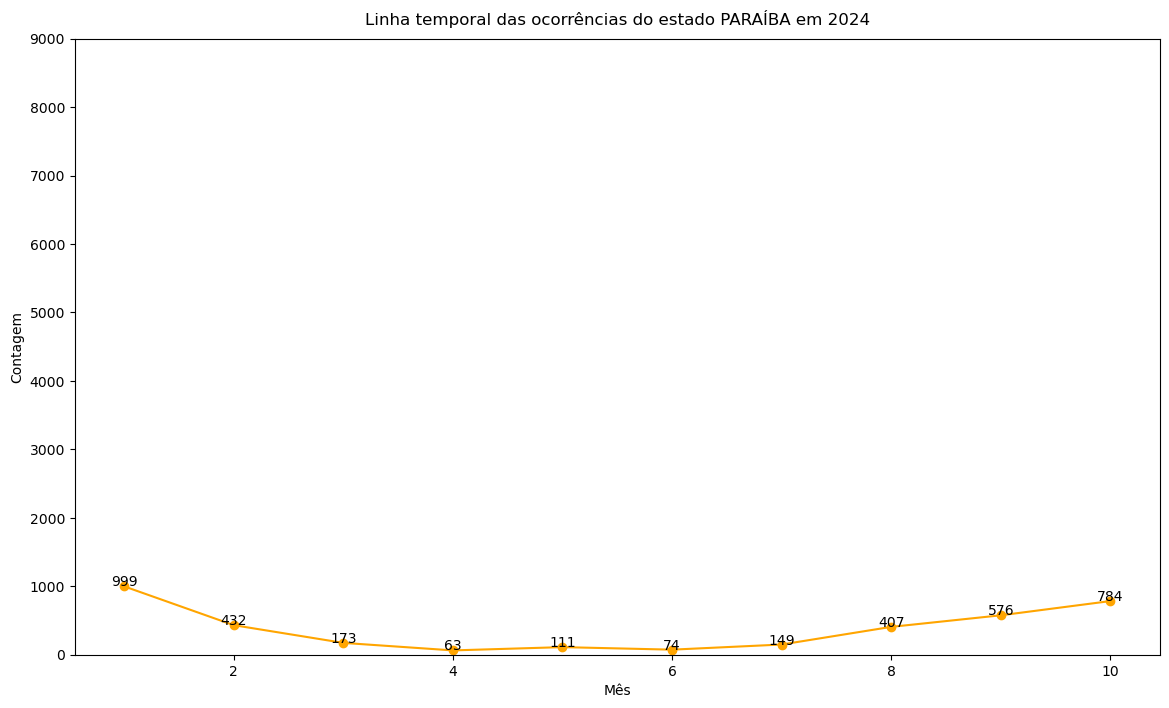

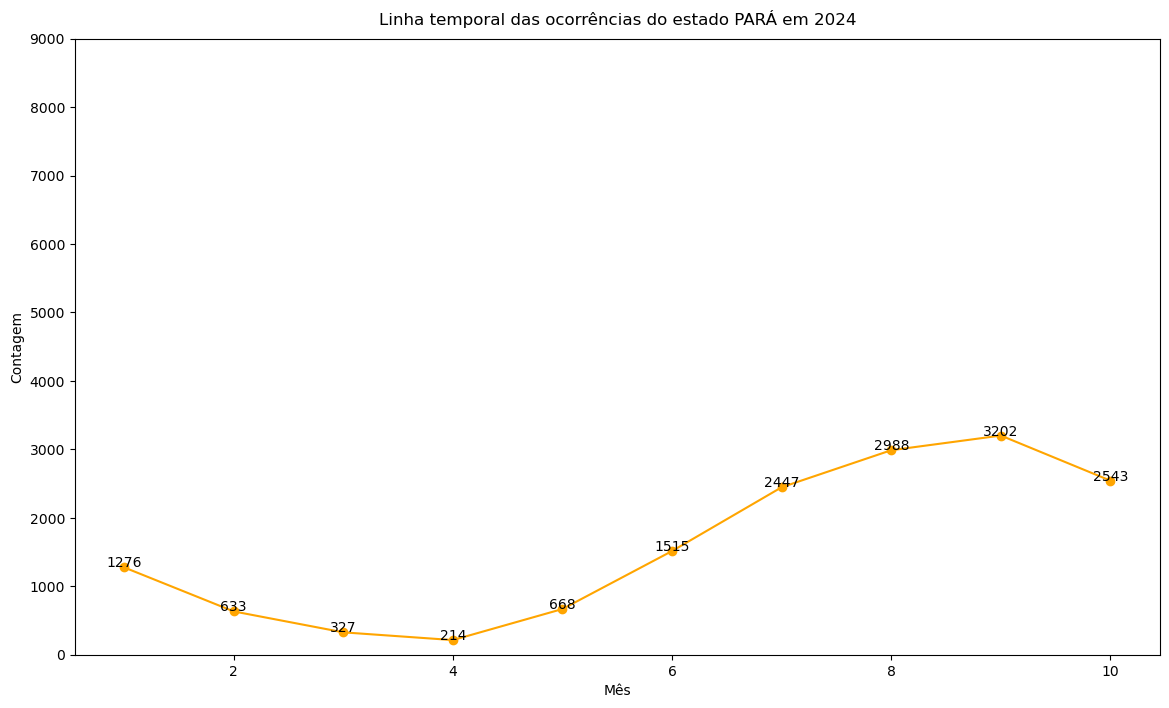

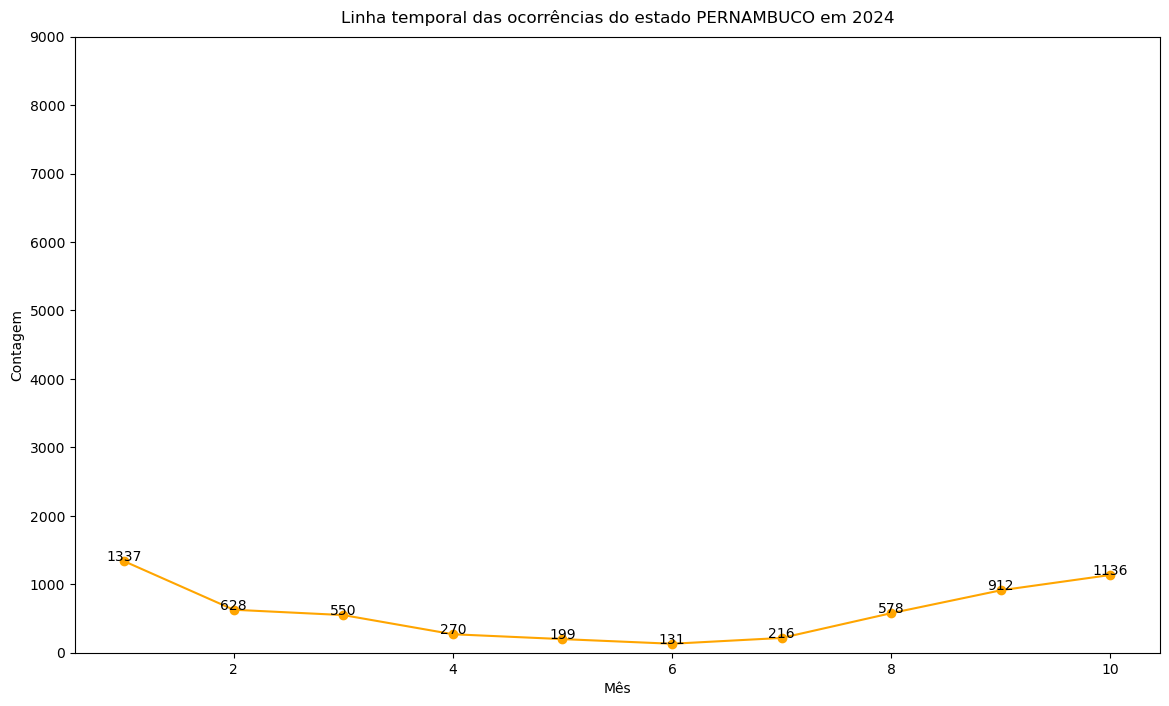

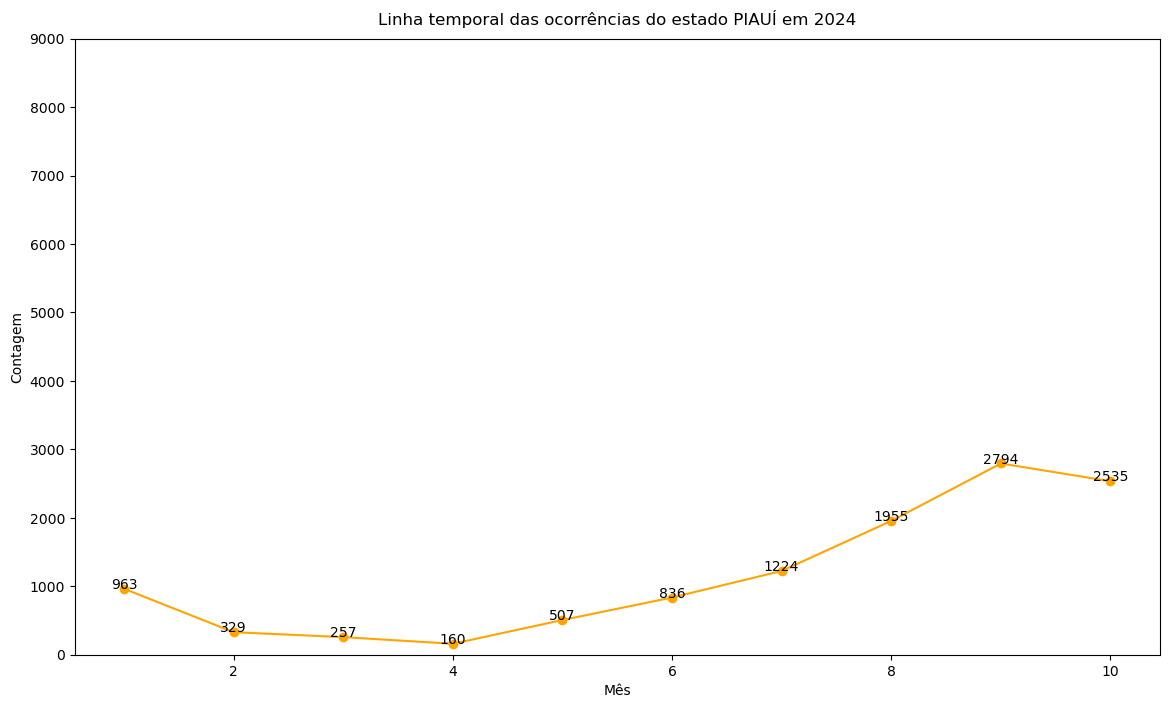

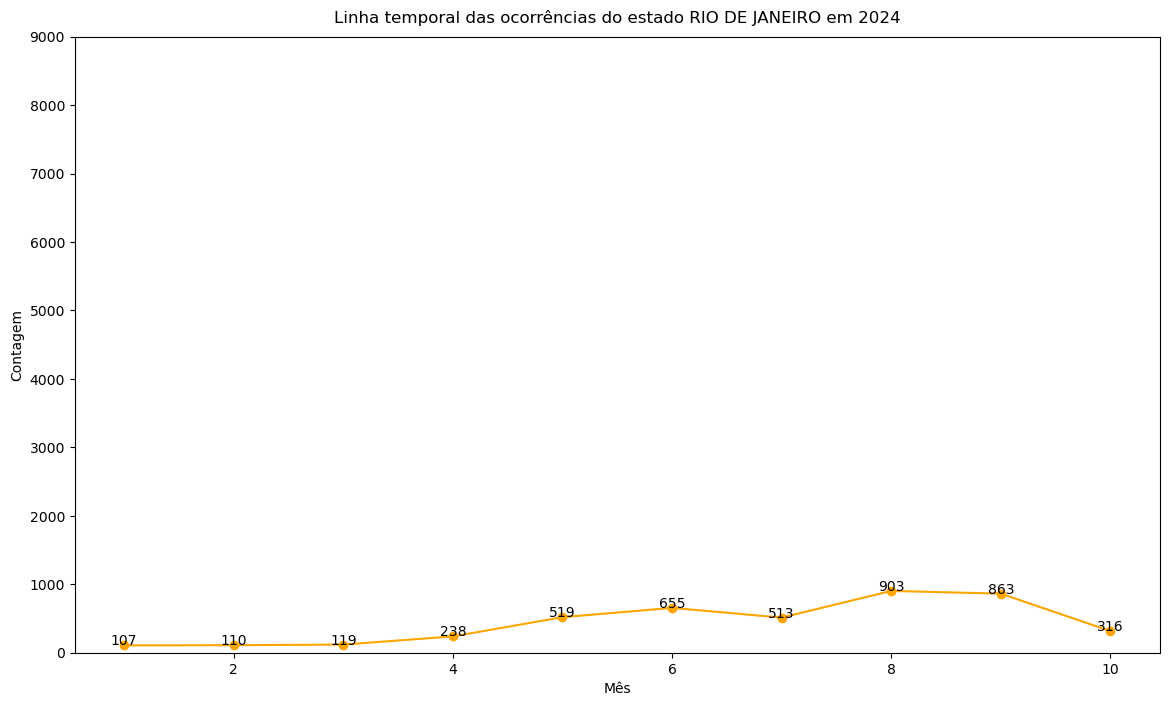

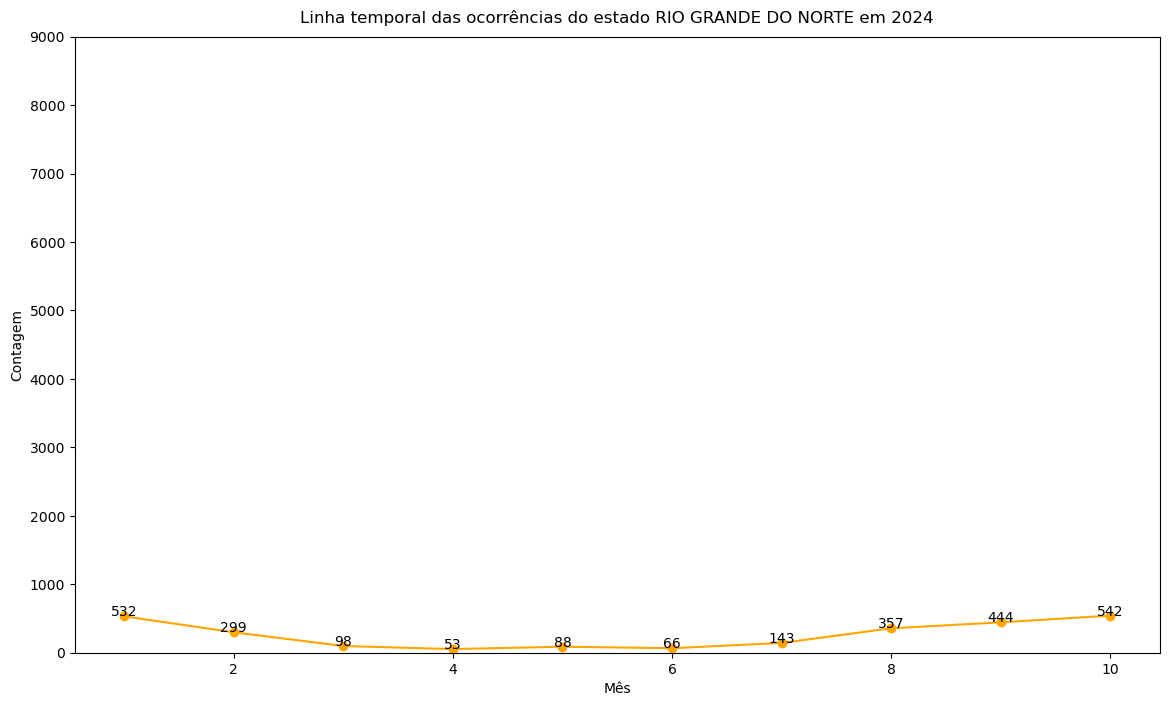

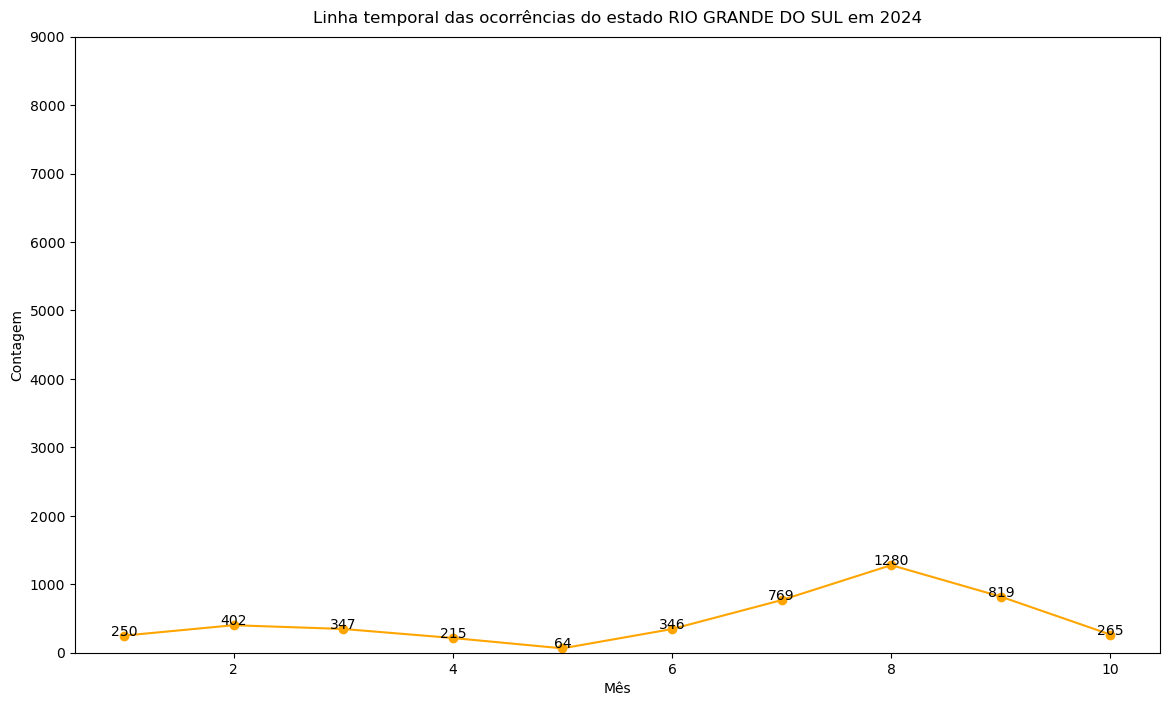

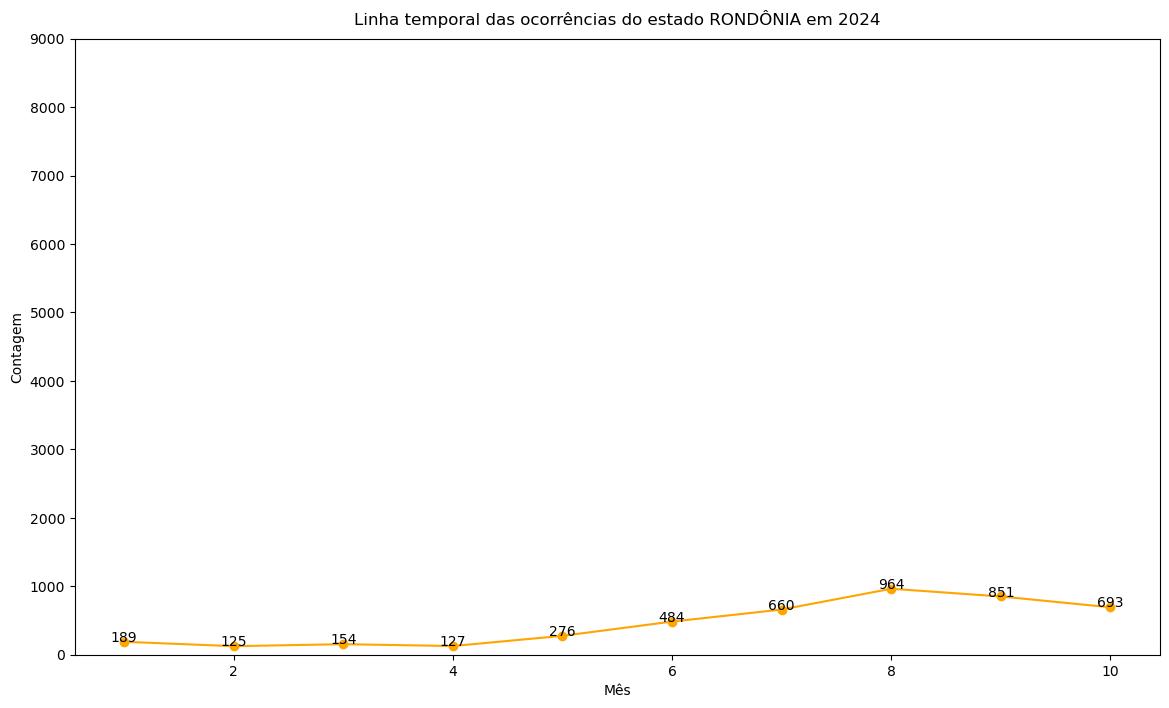

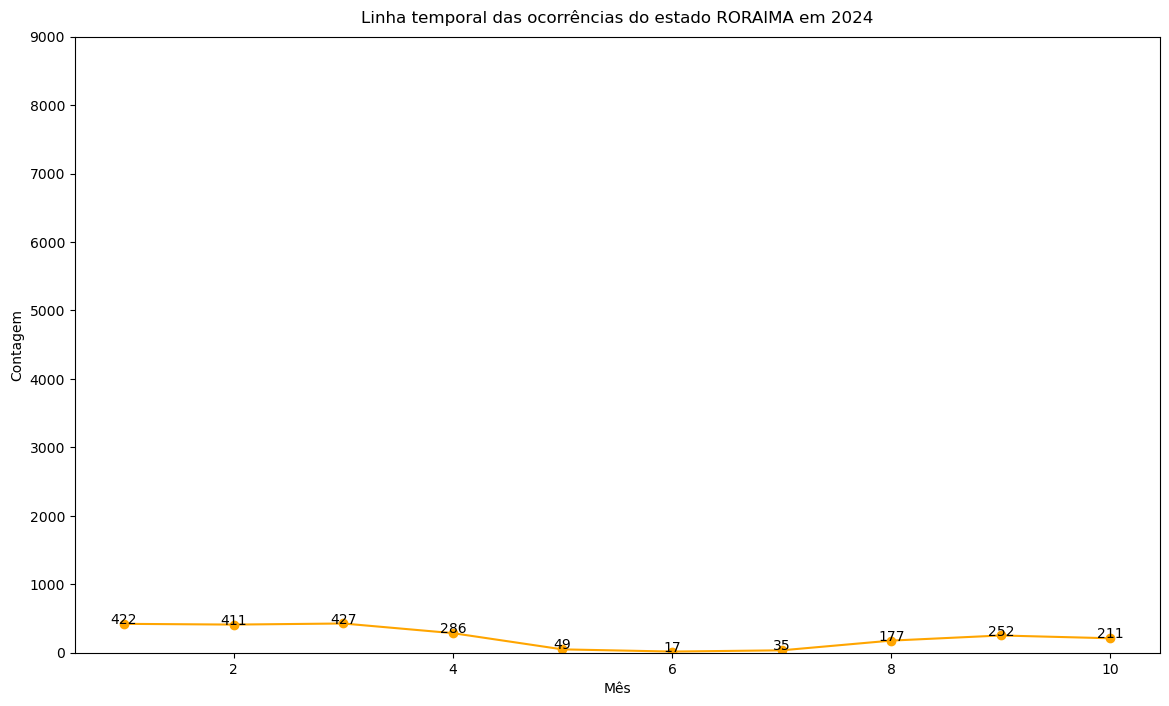

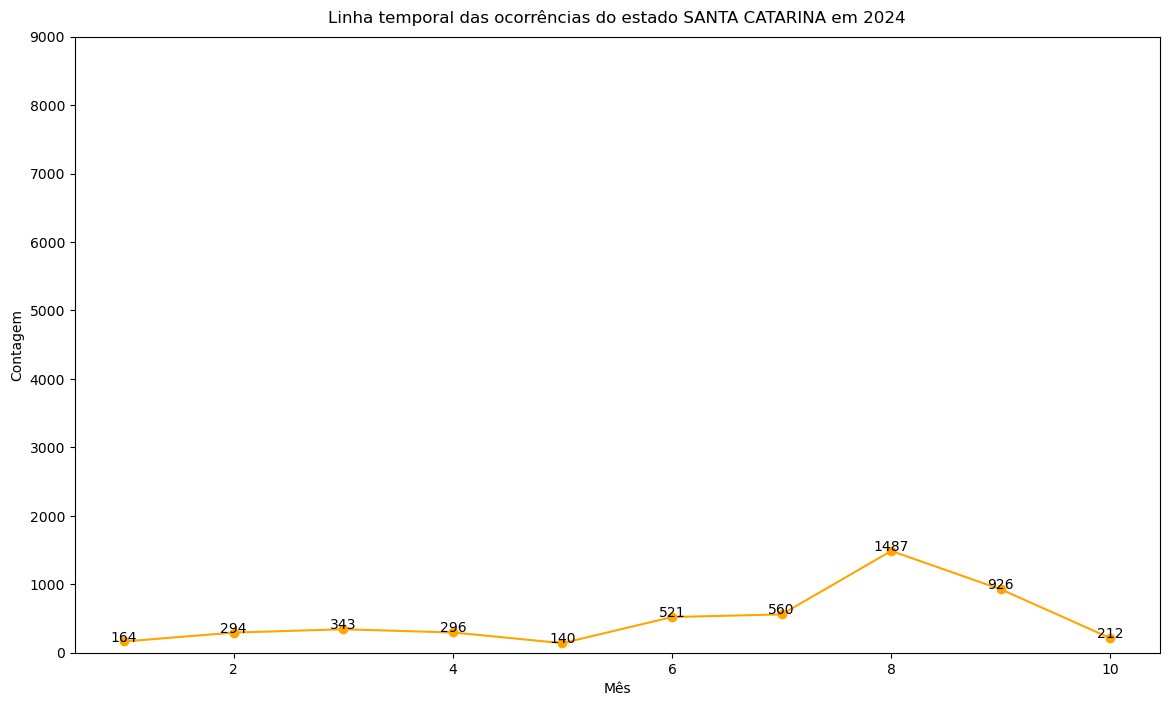

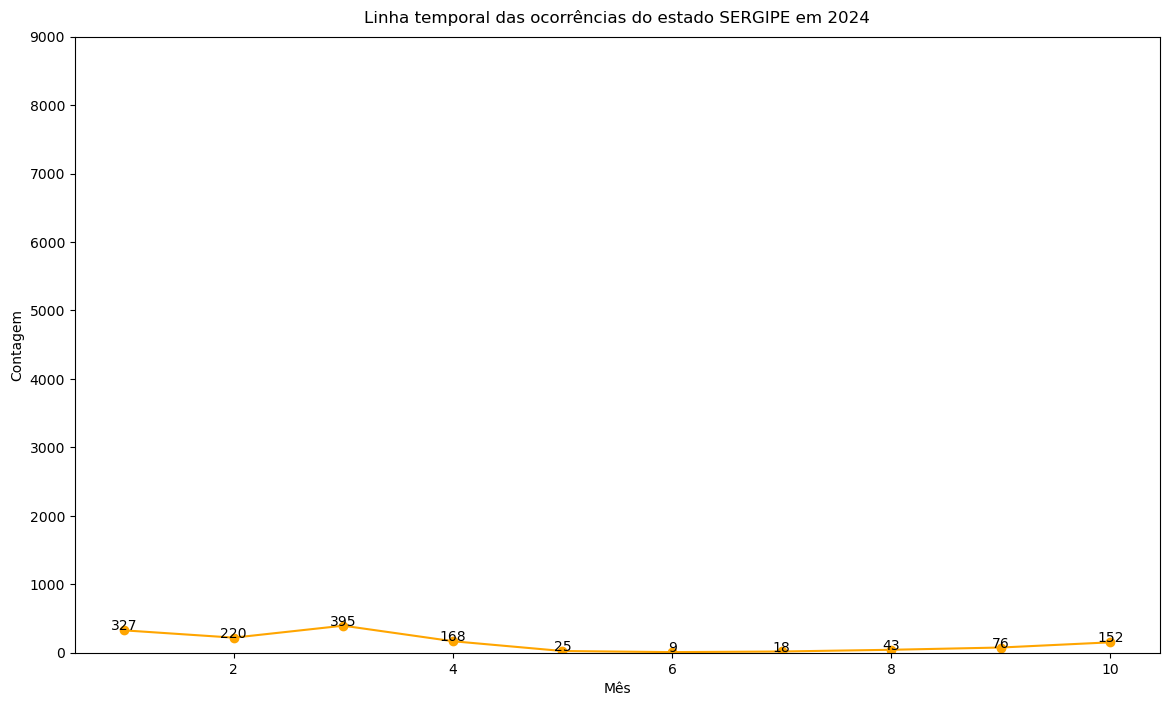

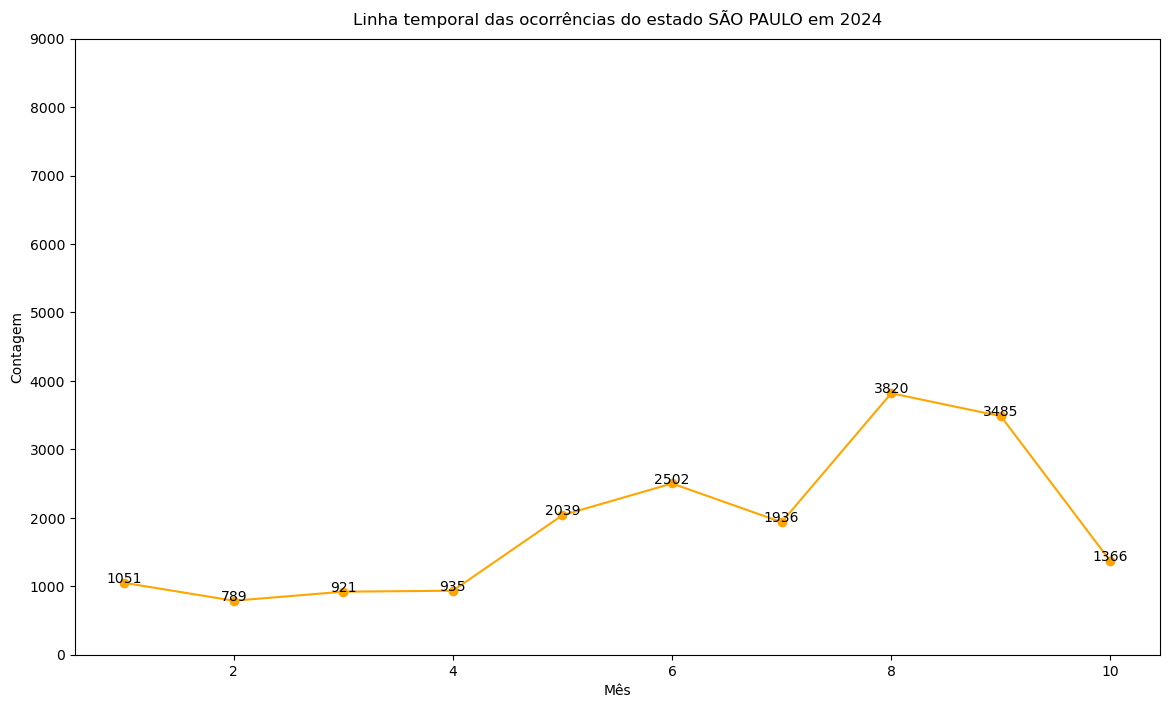

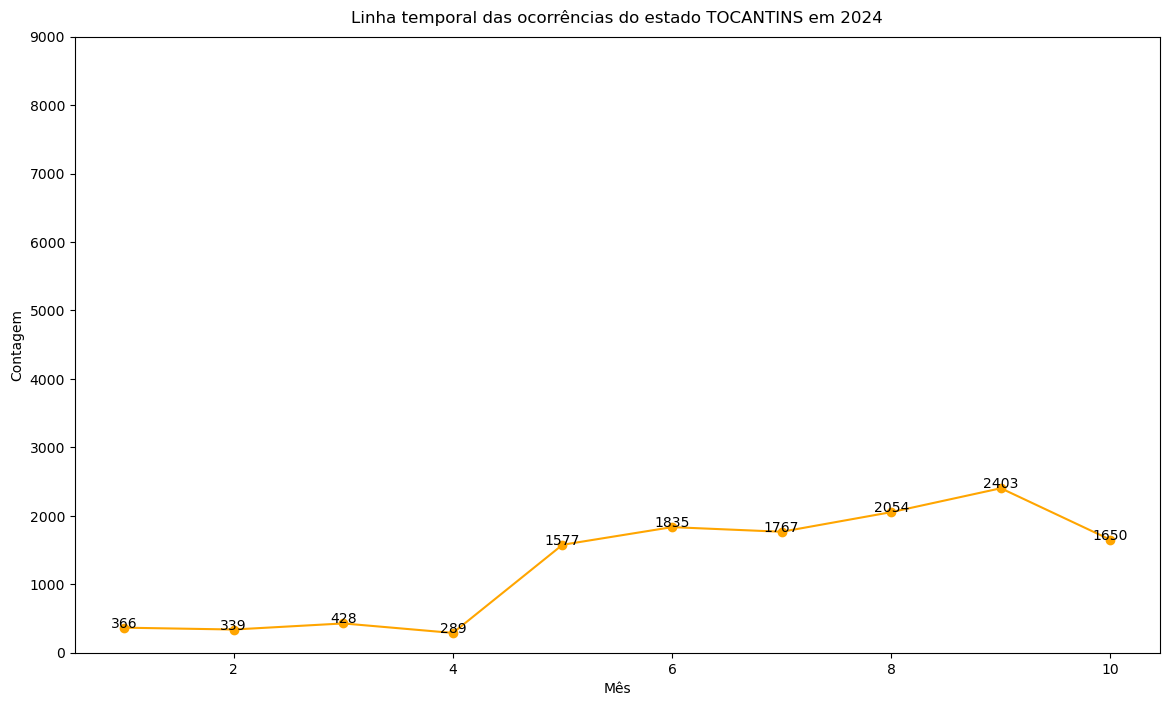

In [41]:
#gráfico da linha temporal de ocorrência em cada estado ao longo dos 10 meses

#criar lista de estados únicos
estados = df_estado_mes['estado'].unique()

#criar o gráfico
for estado in estados:
    df_estado = df_estado_mes[df_estado_mes['estado'] == estado]
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.plot(df_estado['mês'], df_estado['count'], marker='o', 
            label=estado, color='orange')
    ax.set_ylim(0,9000)
                
    #adicionar os rótulos de valores nas barras
    for x, y in zip(df_estado['mês'], df_estado['count']):
        ax.text(x, y + 2, f'{y}', ha='center', va='baseline', fontsize=10)  # Ajuste para evitar sobreposição
    
    plt.title(f'Linha temporal das ocorrências do estado {estado} em 2024', pad=10)
    plt.xlabel('Mês')
    plt.ylabel('Contagem')
    plt.grid(False)

    fig.savefig(f'queimadas_temporais2024_{estado}.png', dpi=100, 
                bbox_inches='tight', orientation='portrait')

    plt.show()


In [18]:
#os dez municípios com mais ocorrências em cada mês
df_ocorr = arquivo.groupby(['estado', 'municipio', 'mês'])[['municipio']].count().rename(columns={'municipio': 'count'})
df_ocorr.head()

count
estado municipio  mês       
ACRE   ACRELÂNDIA 3        3
                  4        1
                  5        1
                  6       12
                  7       27

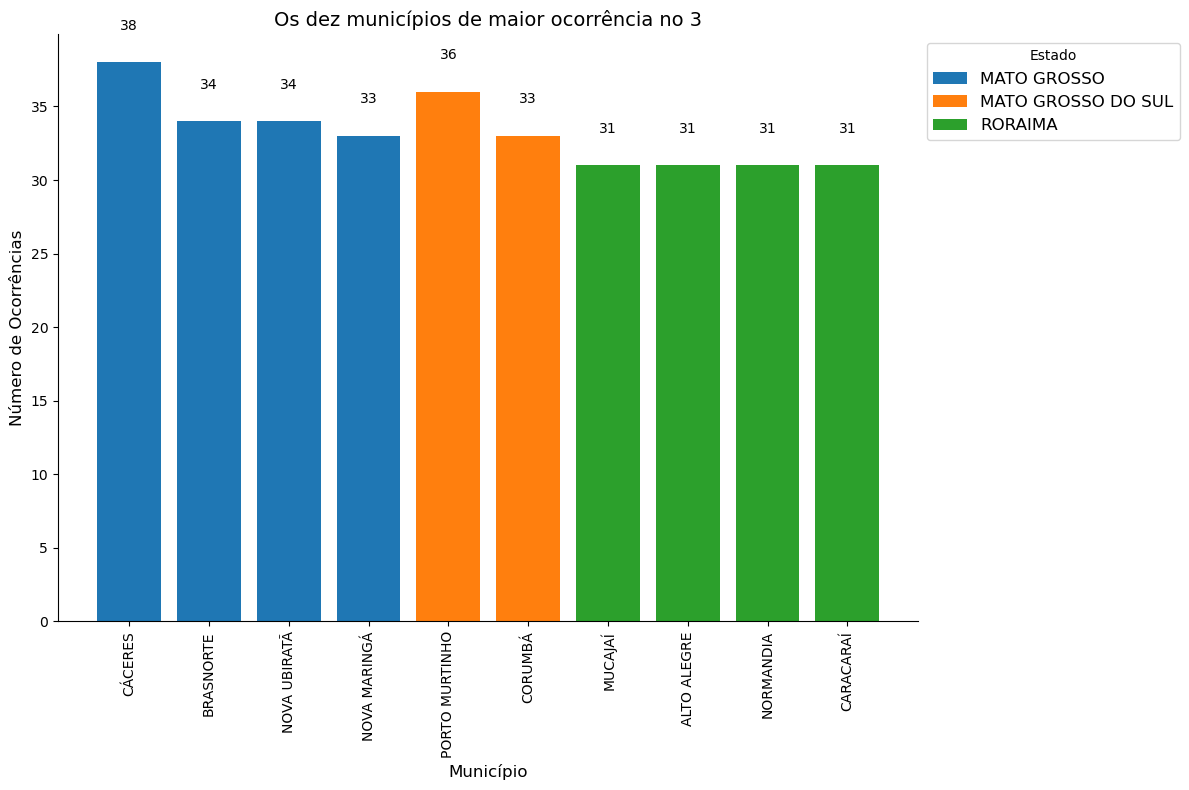

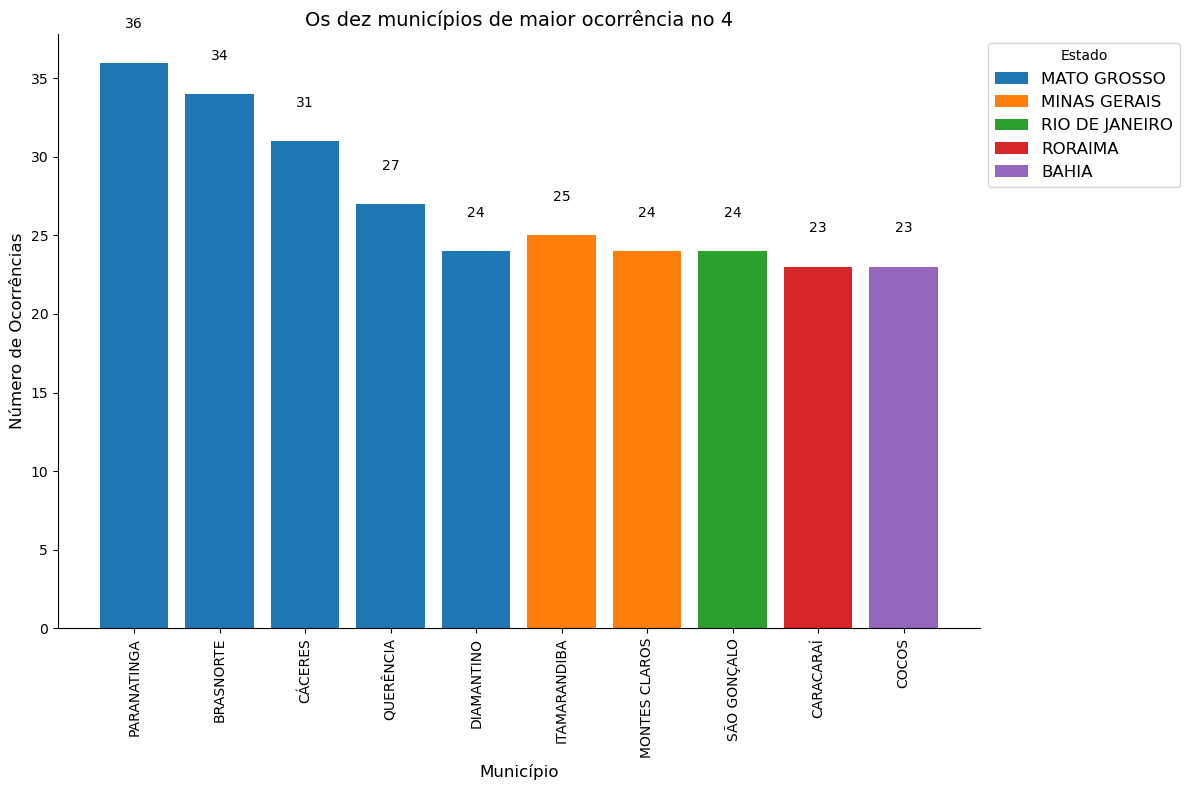

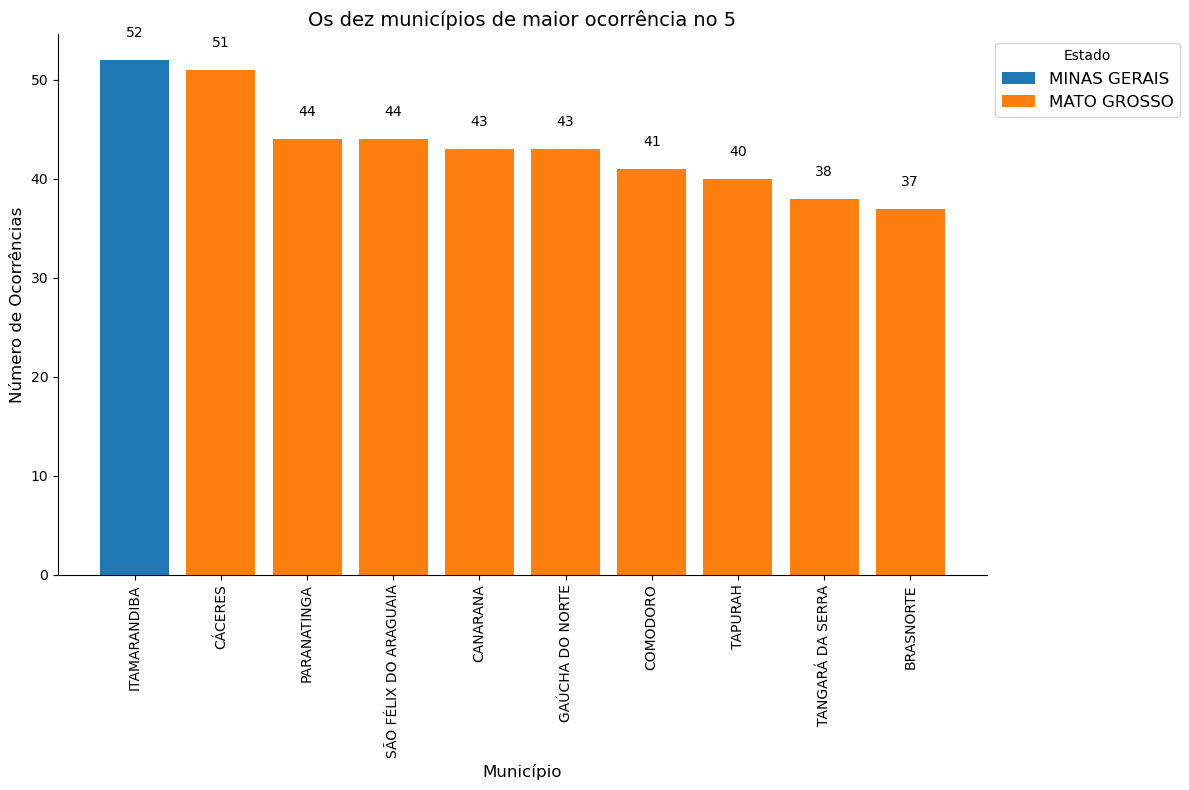

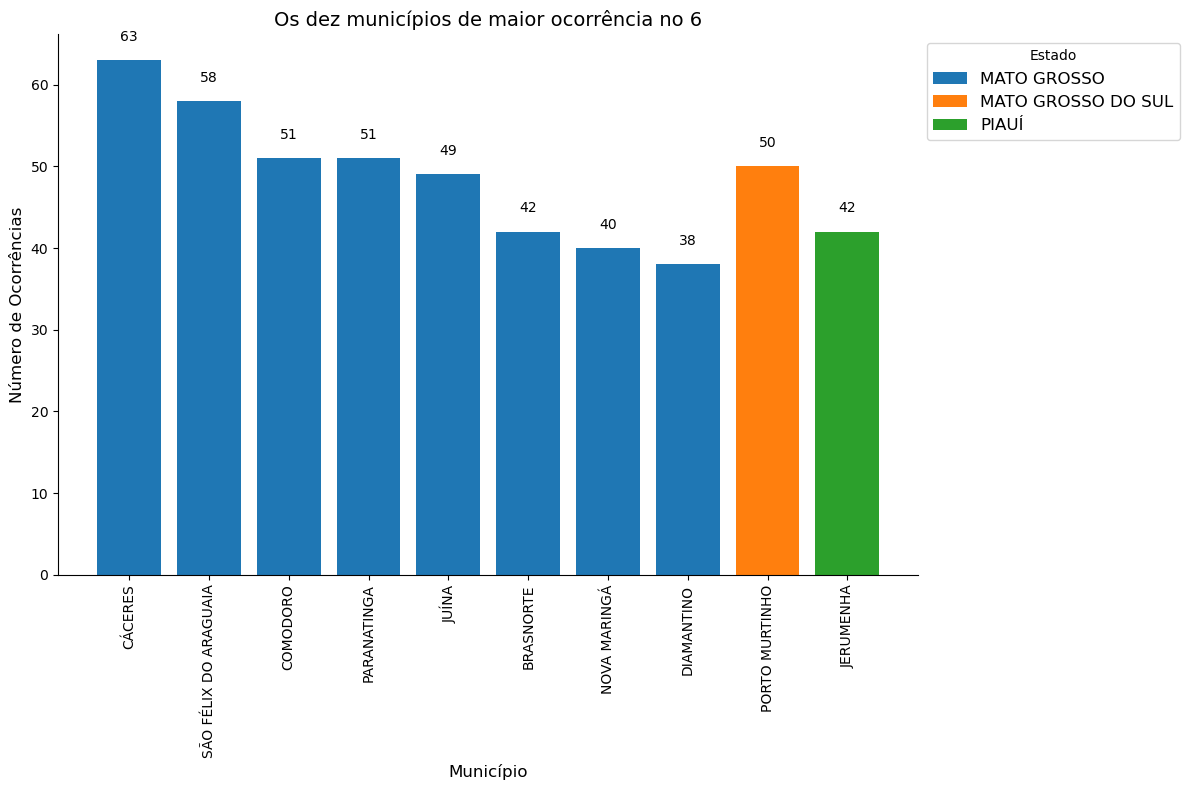

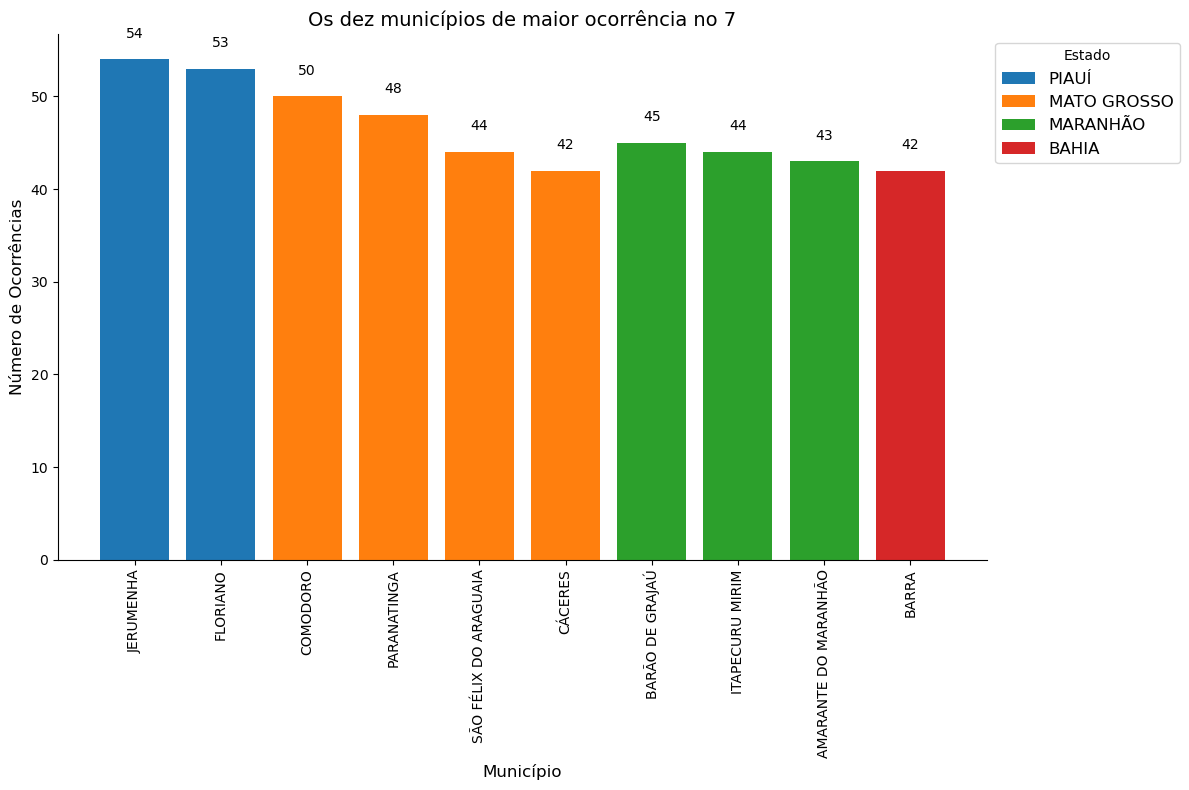

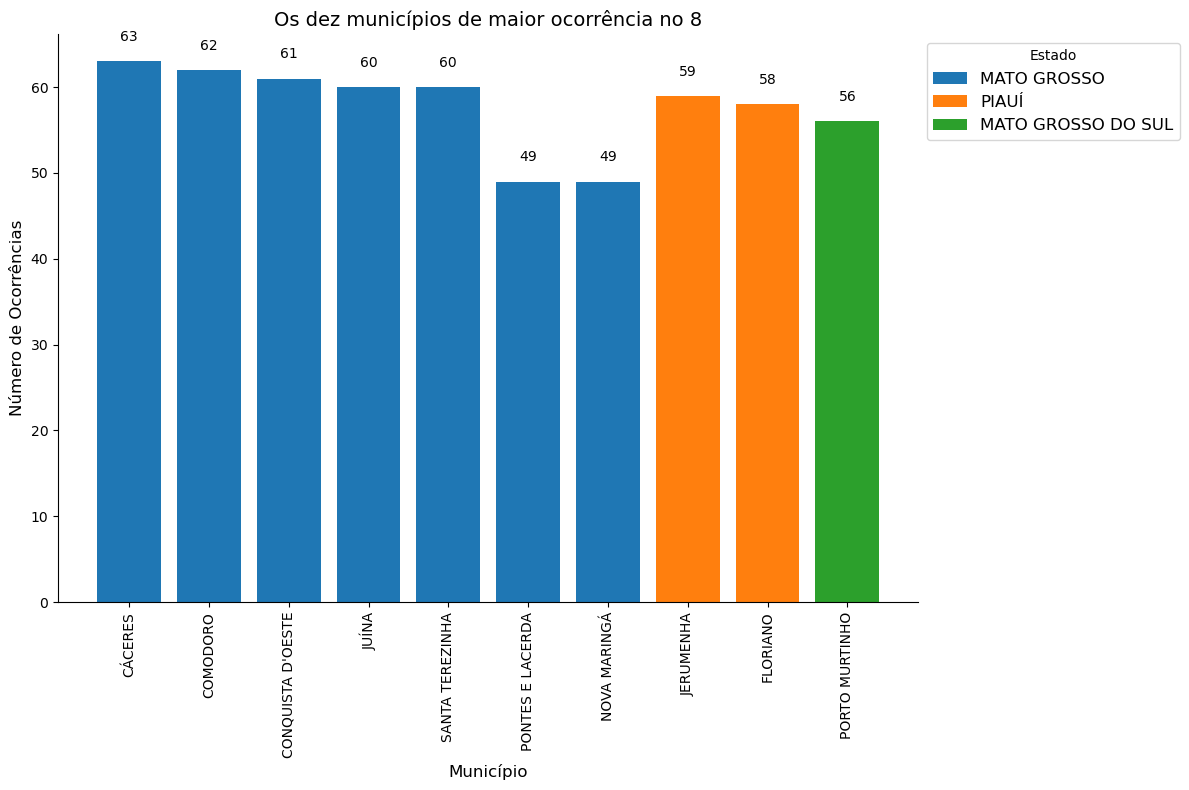

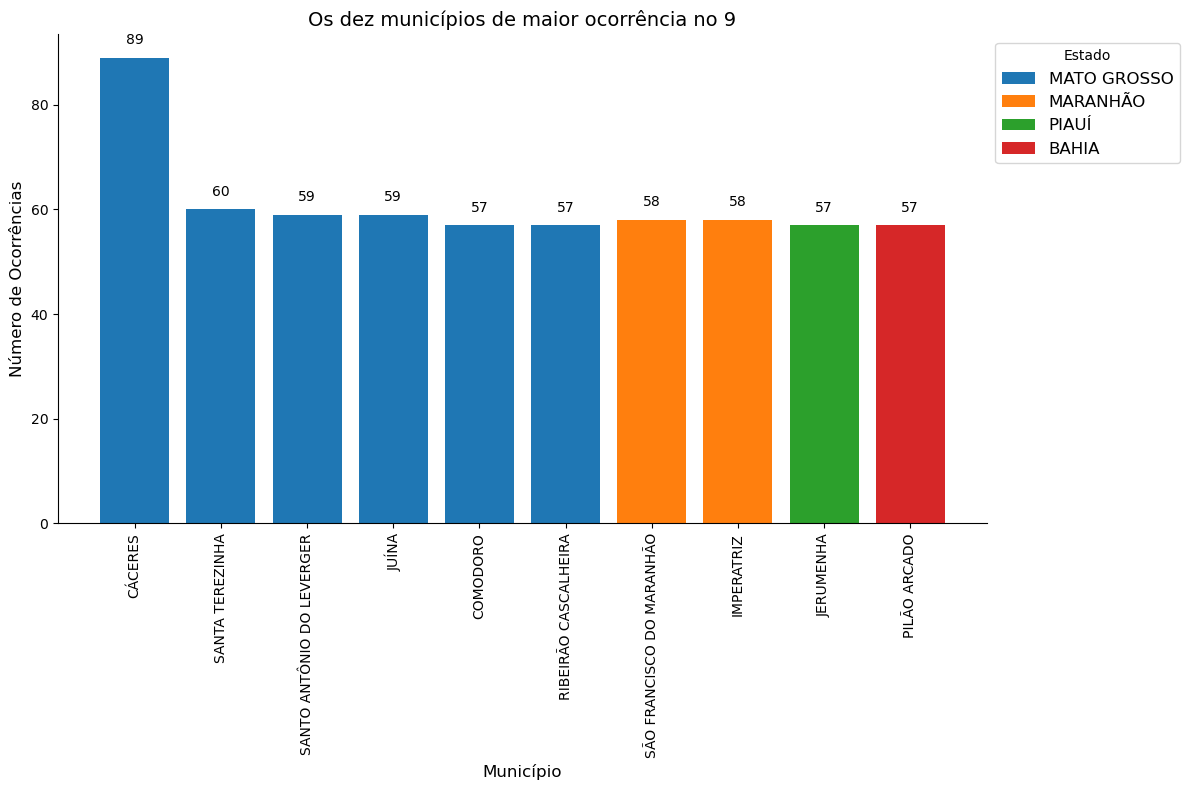

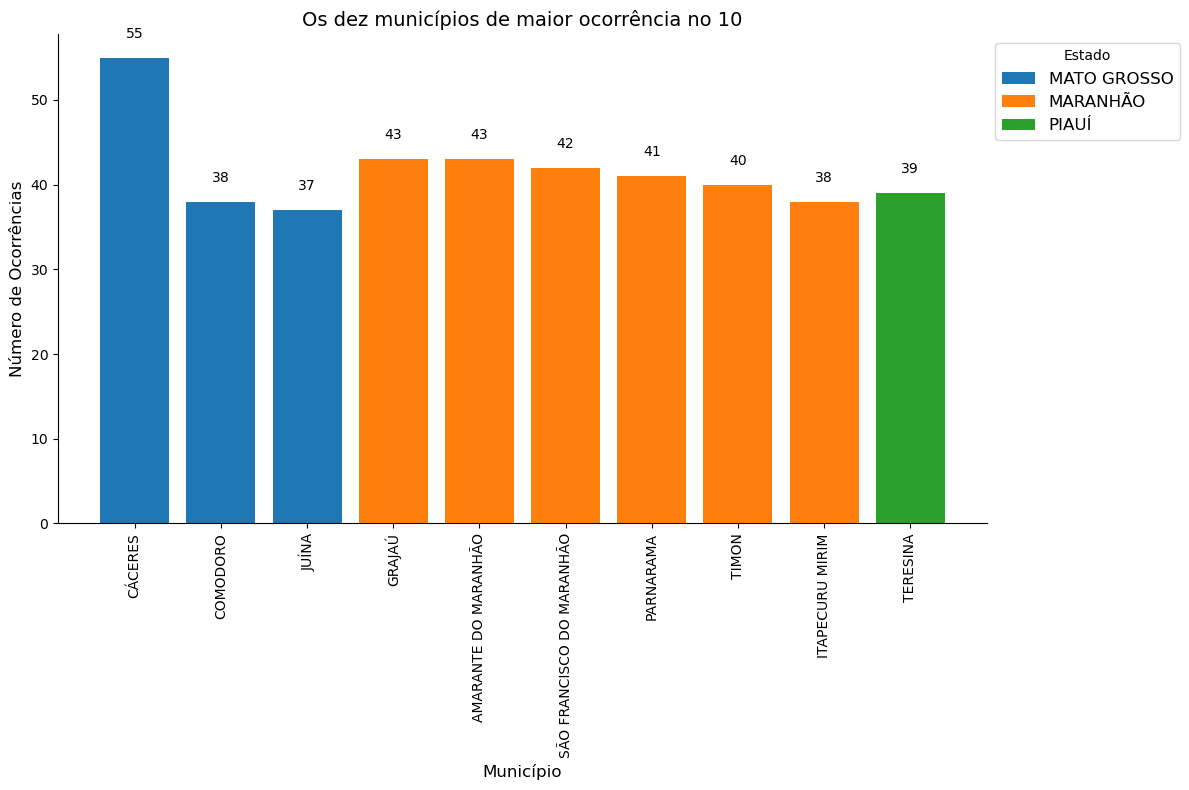

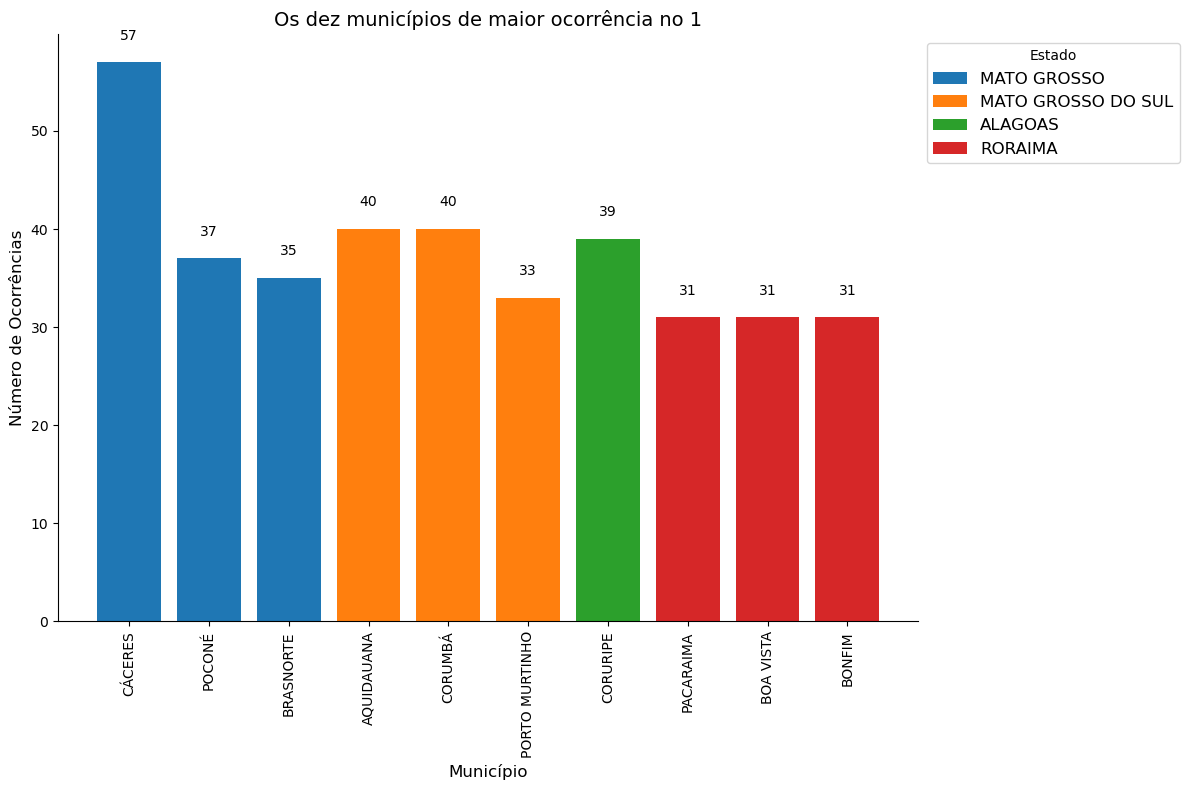

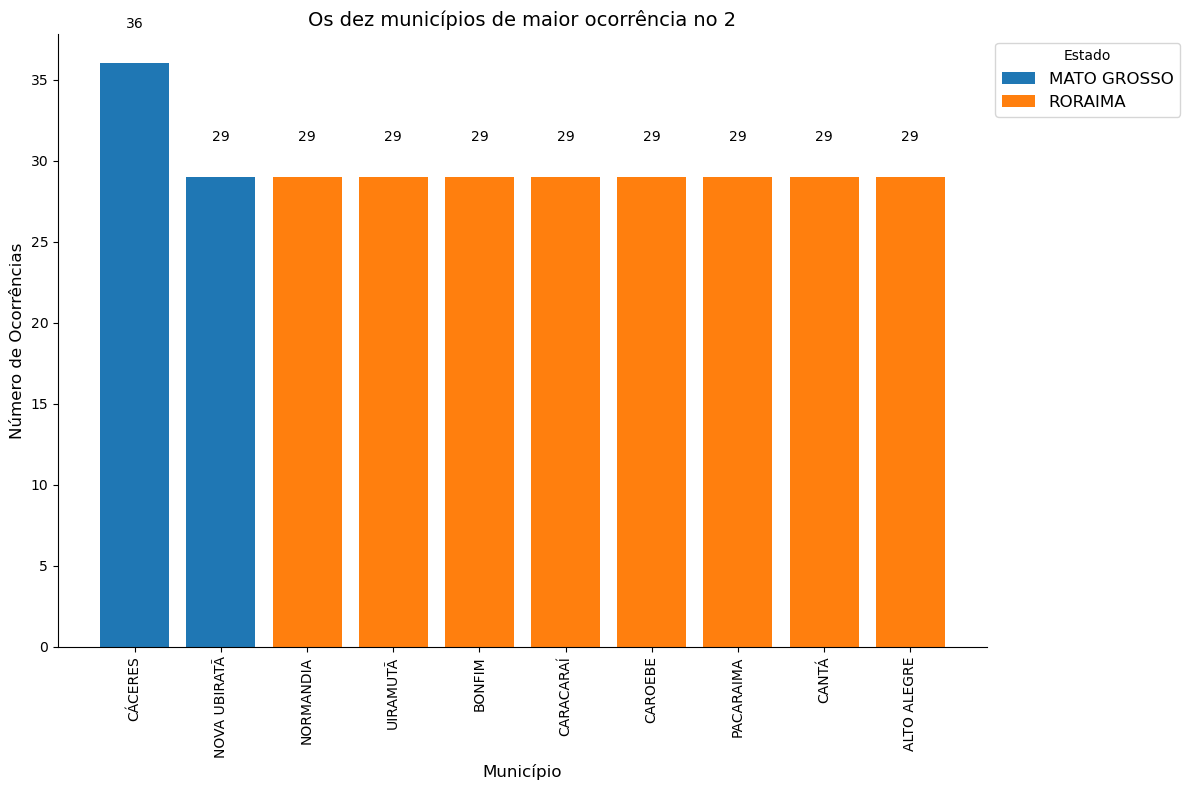

In [19]:
meses = df_ocorr.index.get_level_values('mês').unique()

#criação do gráfico
for mes in meses:
    df_mes = df_ocorr[df_ocorr.index.get_level_values('mês') == mes]
    df_mes = df_mes.reset_index()
    #para ordenar os municípios de maior ocorrência 1º
    df_mes_sorted = df_mes.sort_values(by='count', ascending=False)
    df_mes_max = df_mes_sorted.head(10)
    plt.figure(figsize=(12, 8))
    
    #criar gráfico
    for estado in df_mes_max['estado'].unique():
        df_estado = df_mes_max[df_mes_max['estado'] == estado]
        bars = plt.bar(df_estado['municipio'], df_estado['count'], 
                       label=estado)
    
        #adicionar os rótulos de valores das barras
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() +2,
                     int(bar.get_height()), ha='center', va='bottom',
                     fontsize=10)
    
    plt.title(f'Os dez municípios de maior ocorrência no {mes}', fontsize=14)
    plt.xlabel('Município', fontsize=12)
    plt.ylabel('Número de Ocorrências', fontsize=12)
    plt.xticks(rotation=90) 
    
    plt.legend(title='Estado', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(False)

    plt.tight_layout()

    plt.savefig(f'Ocorrencias2024_por_Municipio_{mes}.png', format='png', dpi=300)
    plt.show()

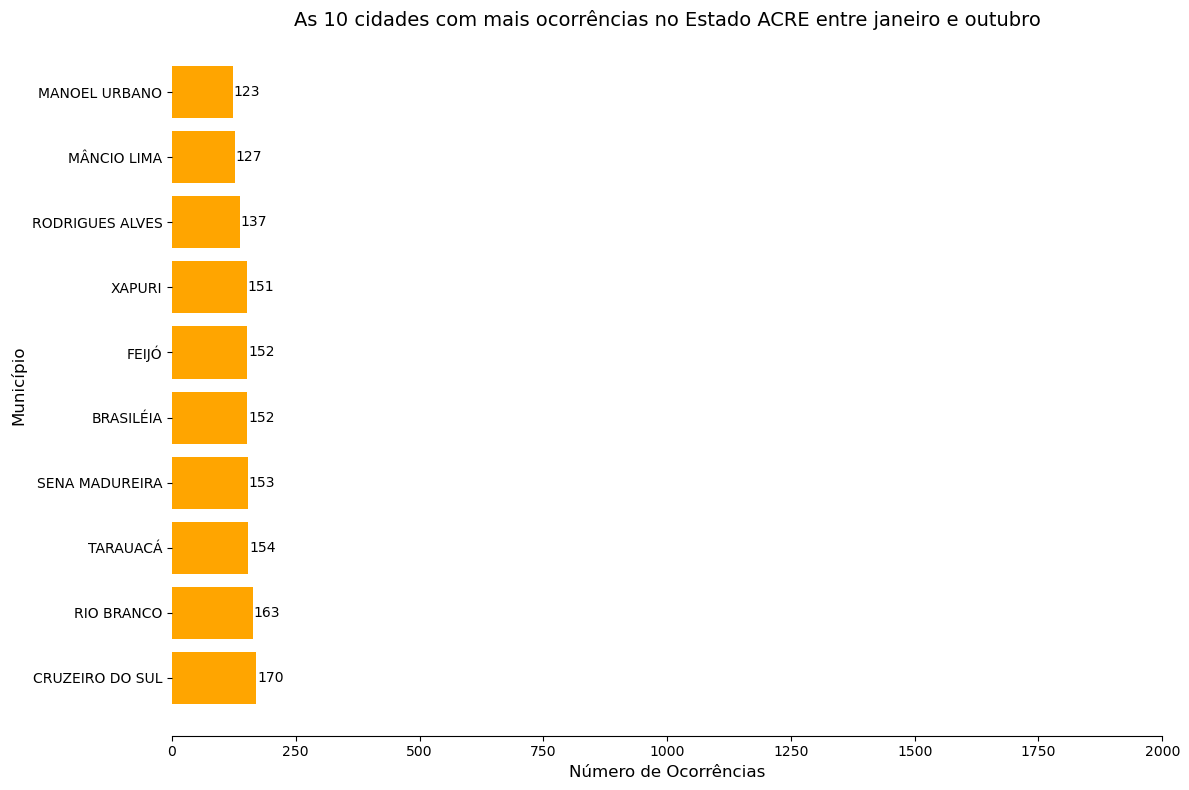

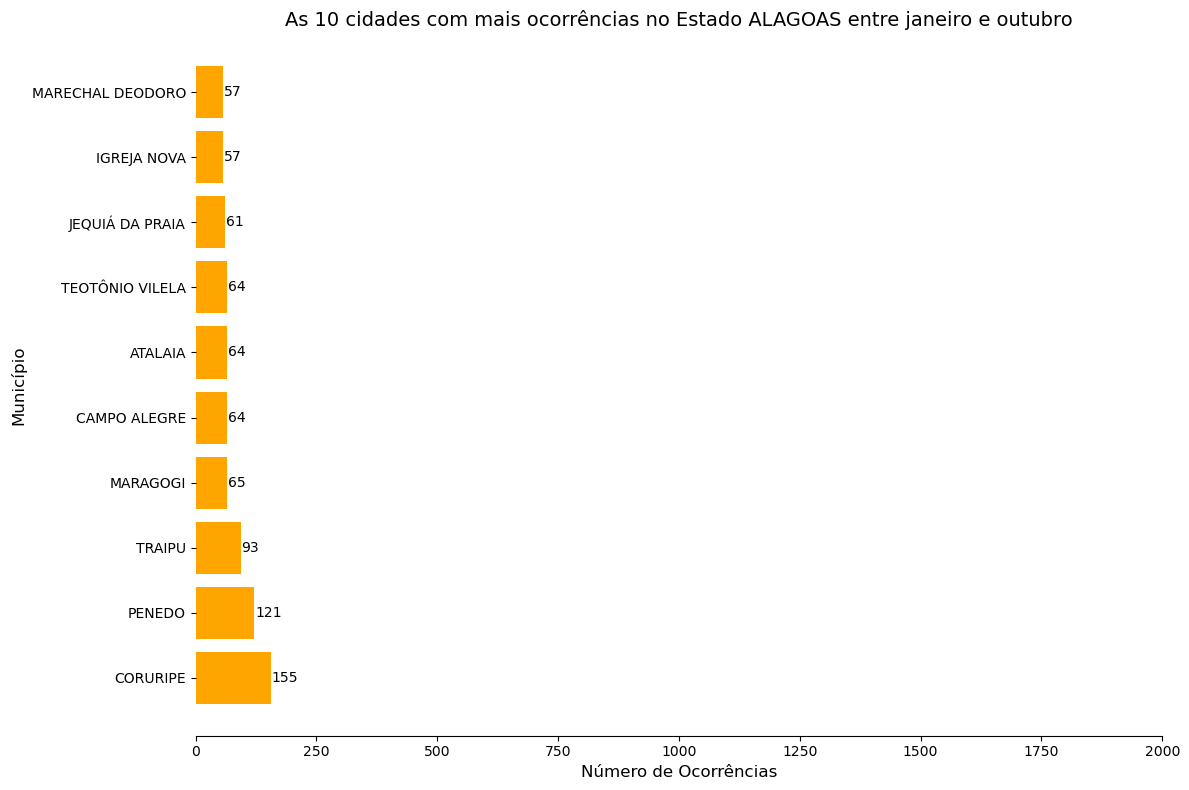

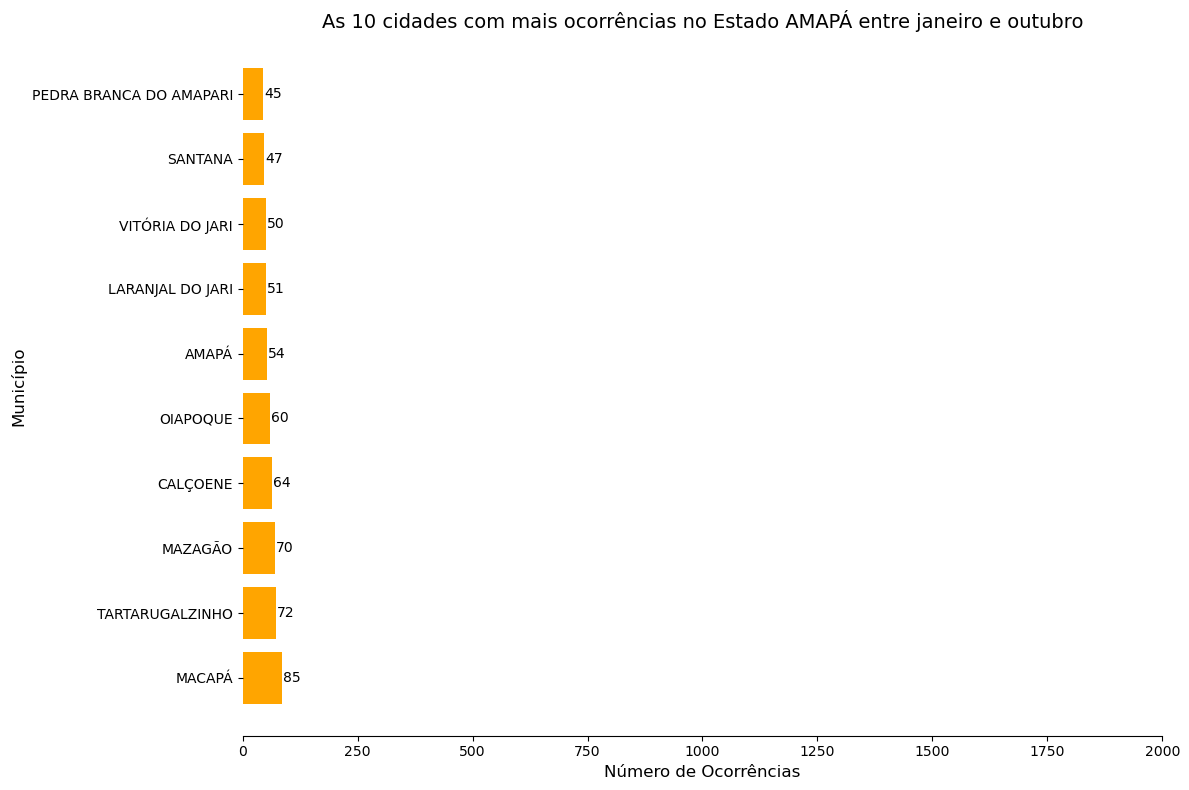

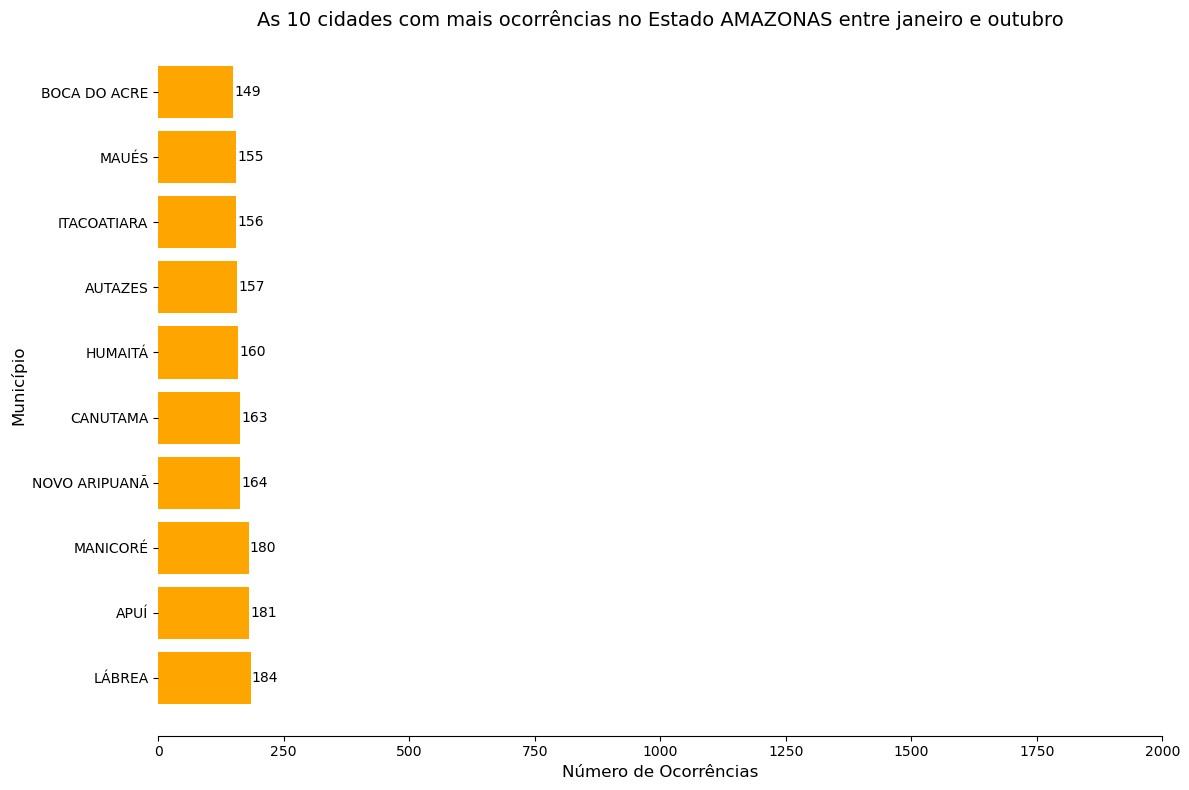

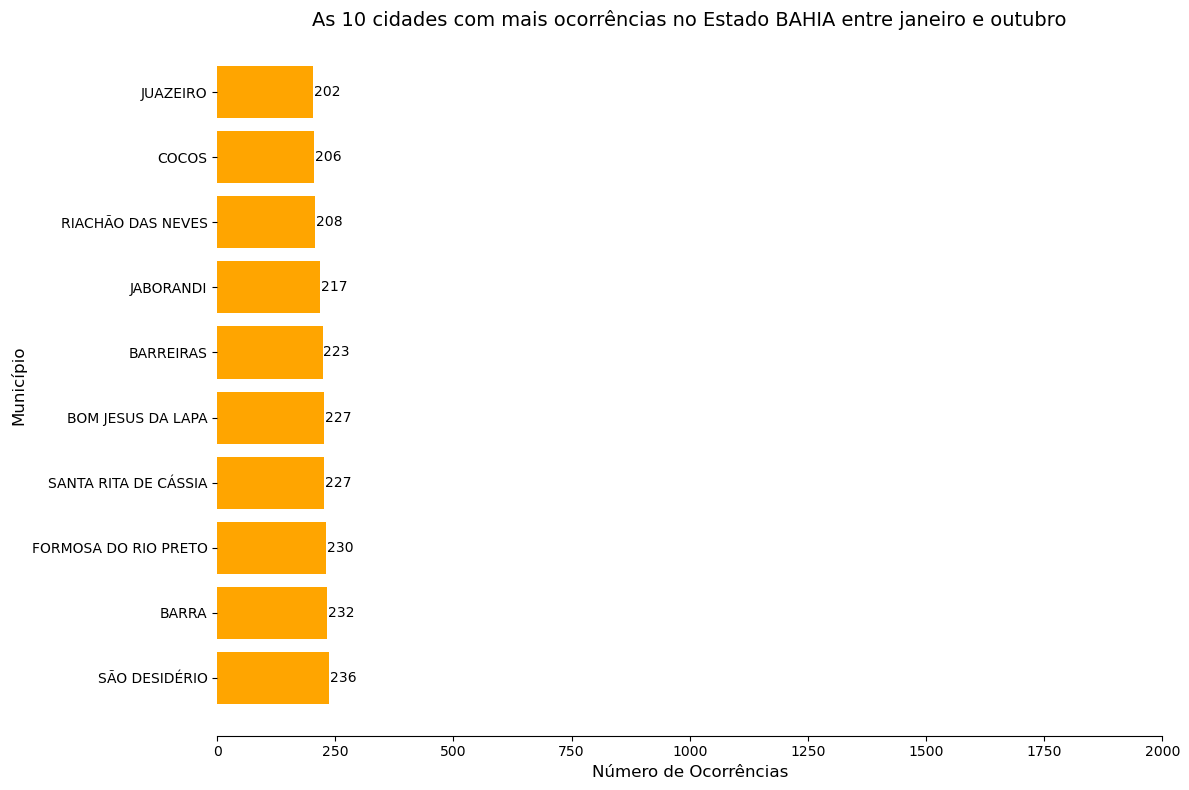

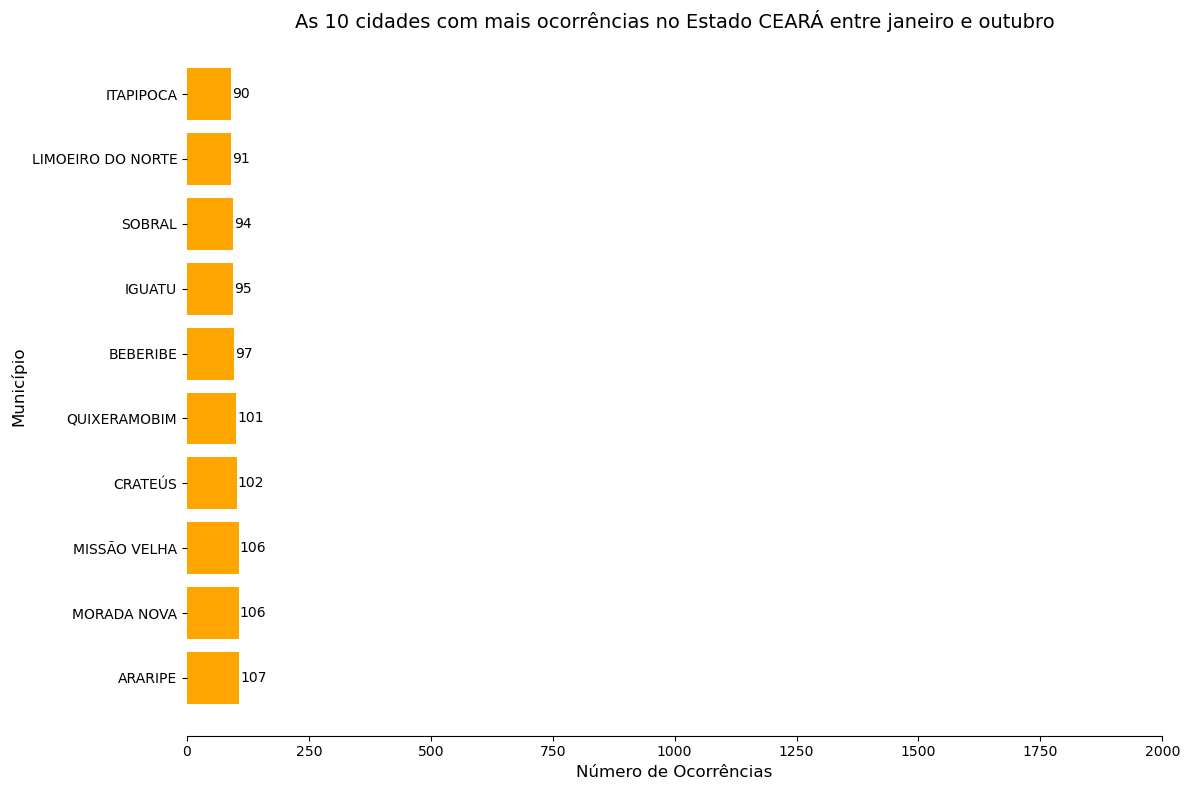

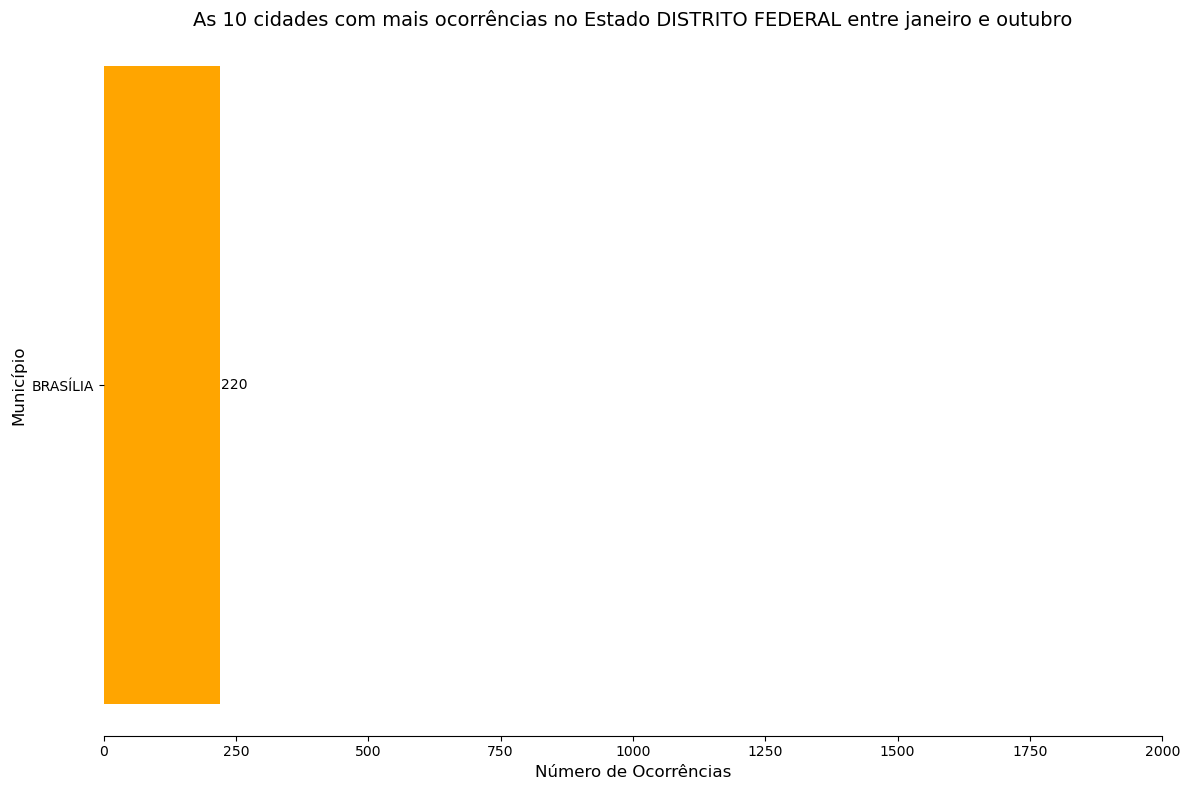

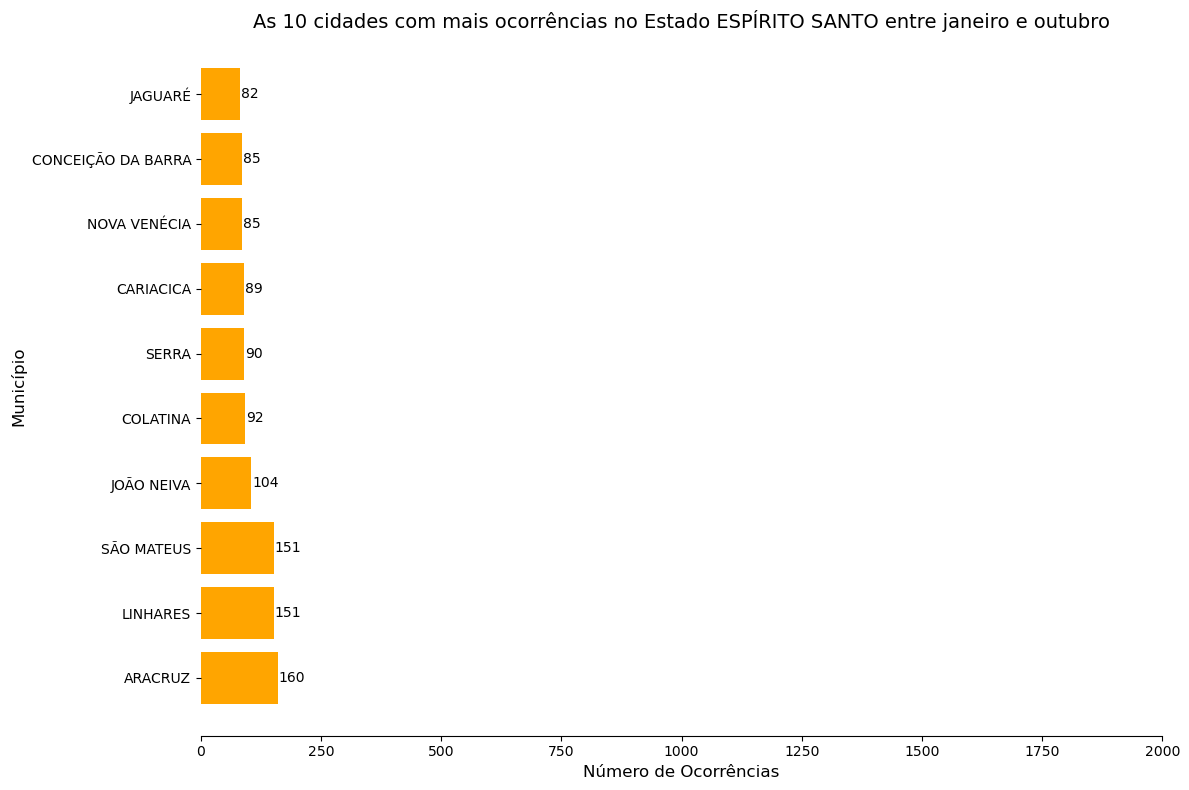

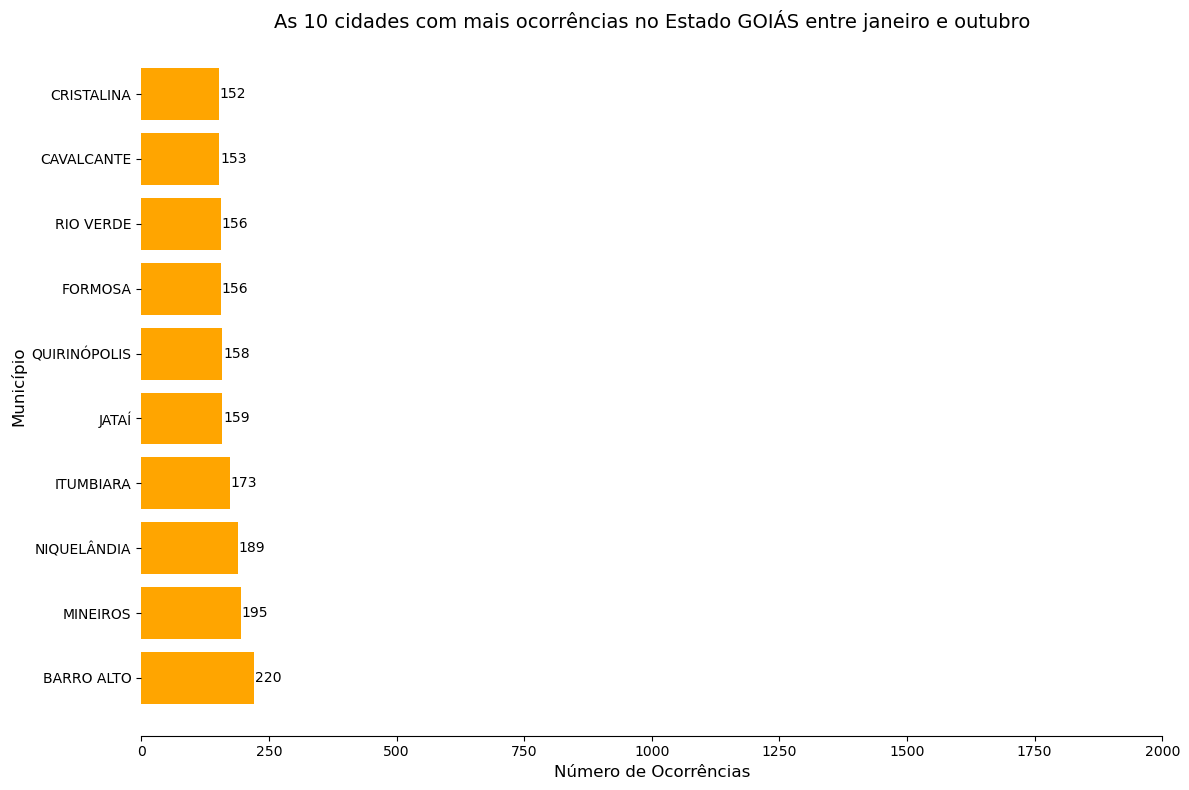

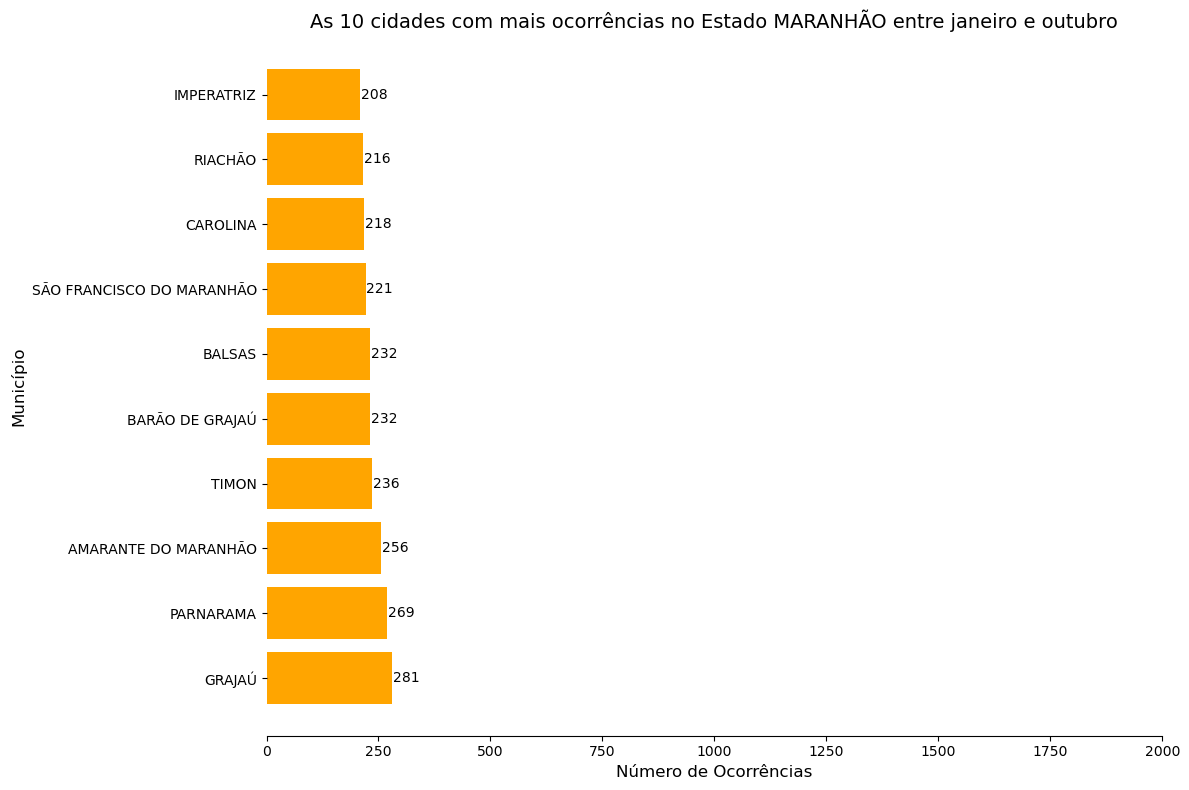

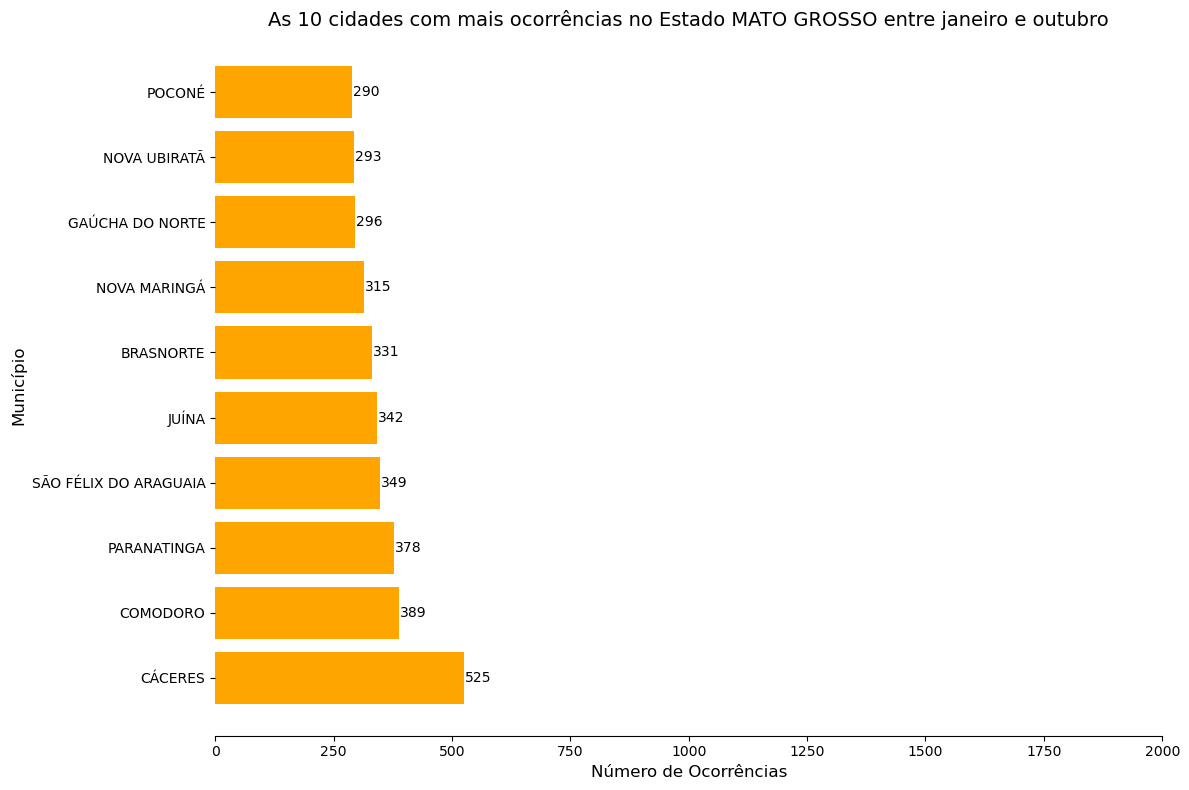

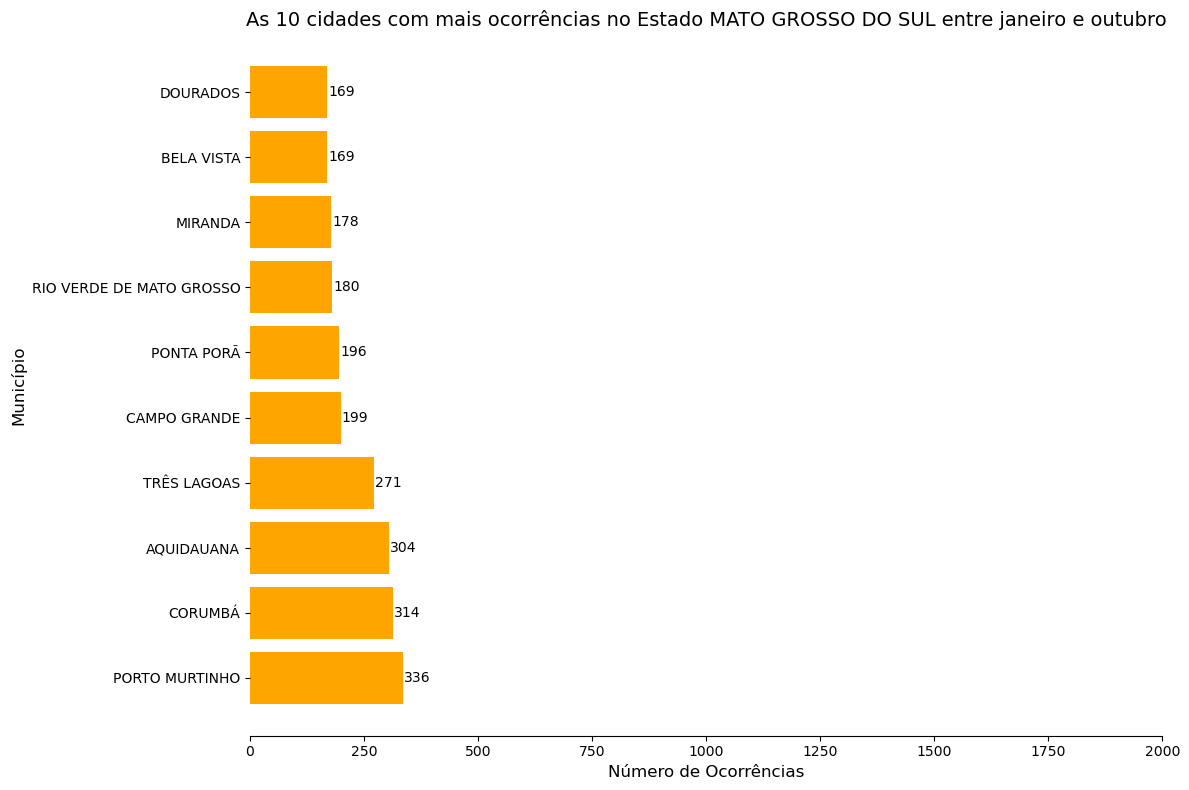

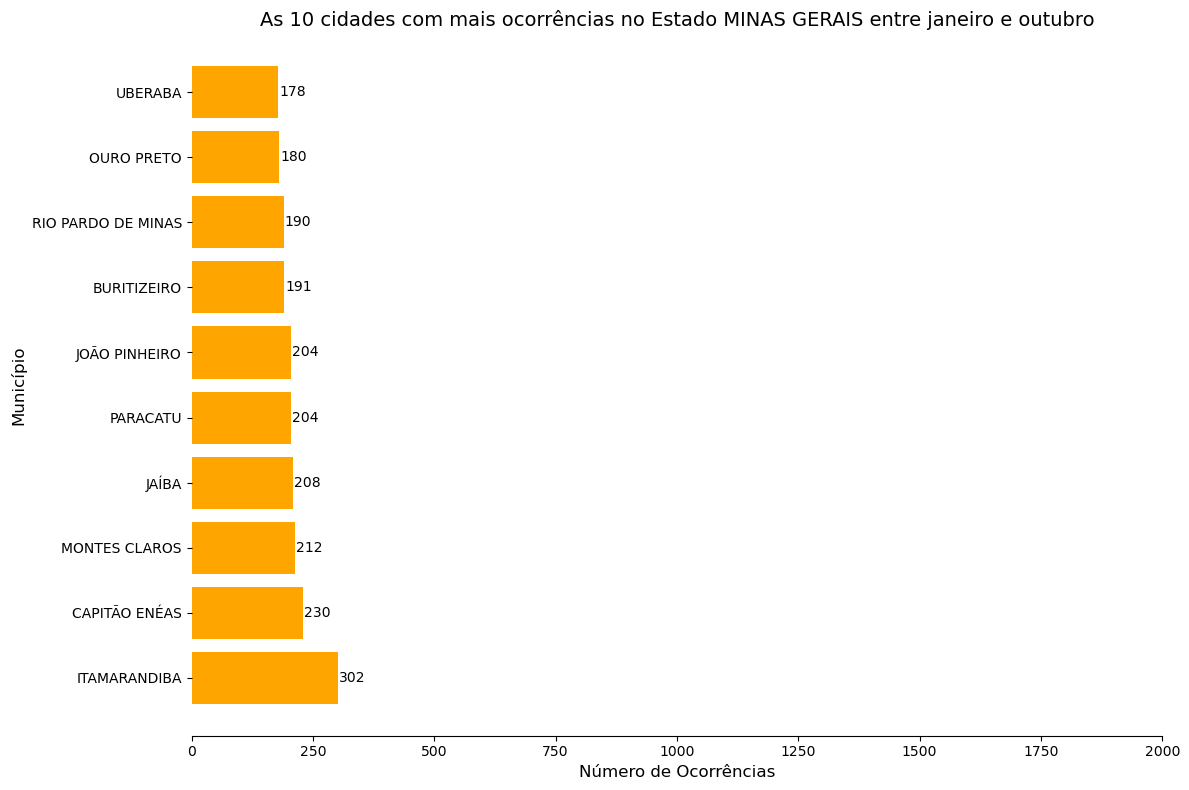

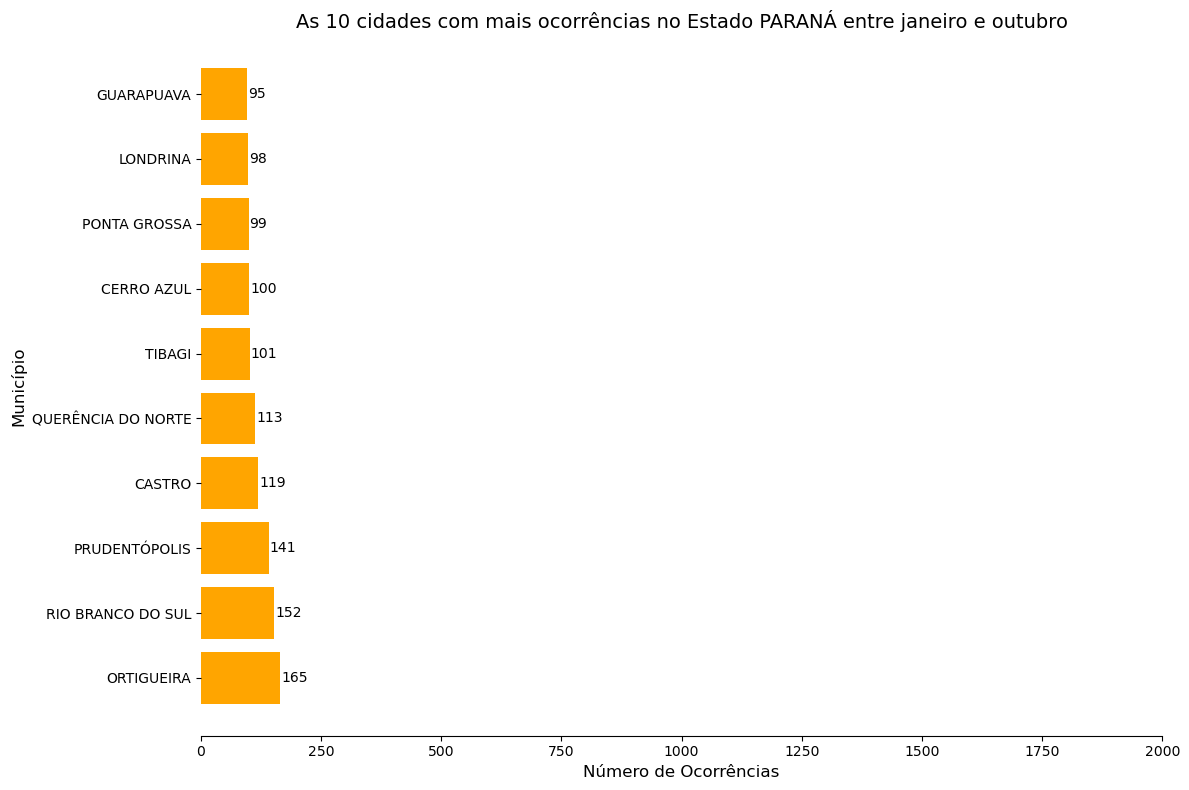

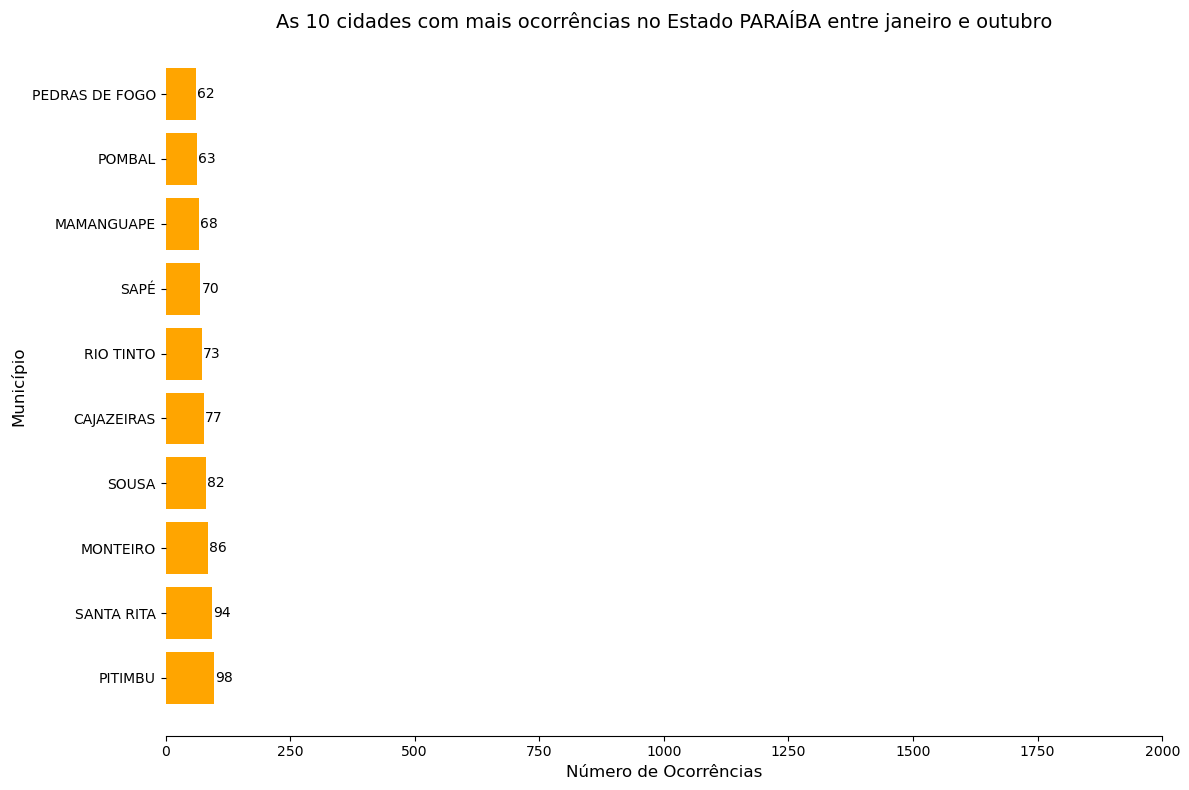

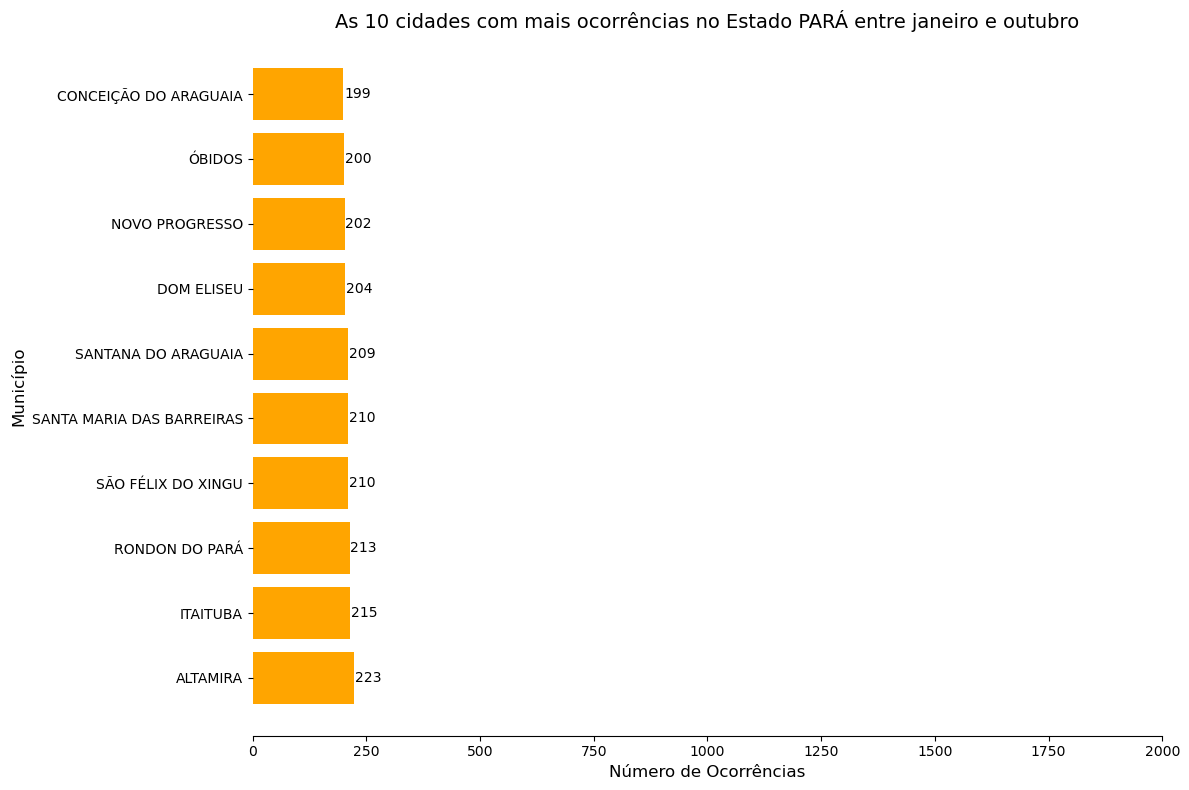

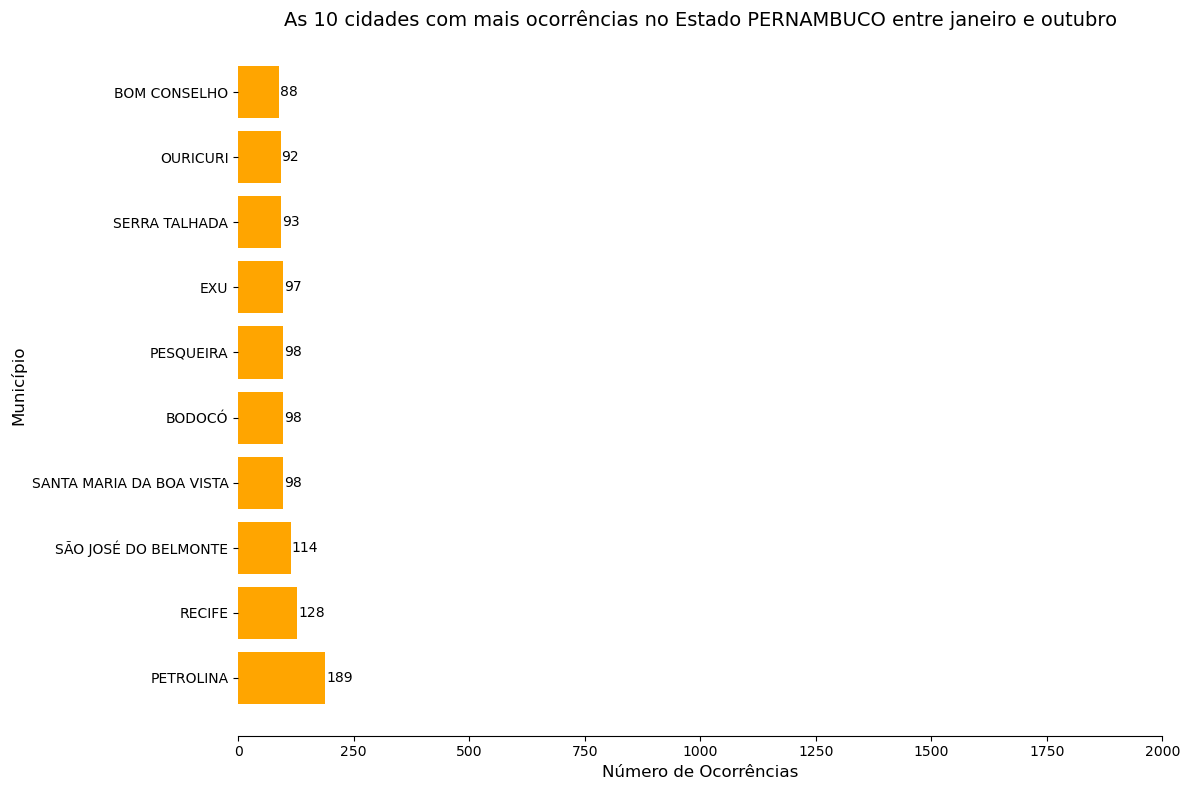

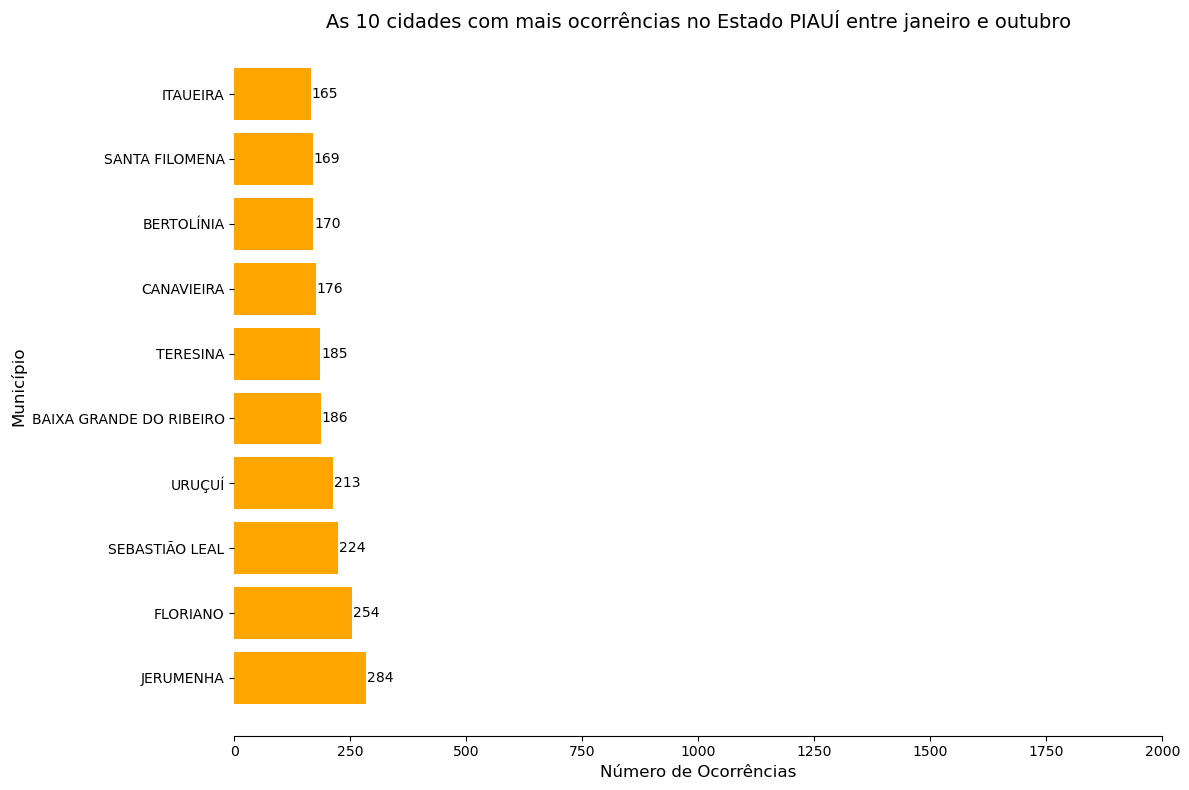

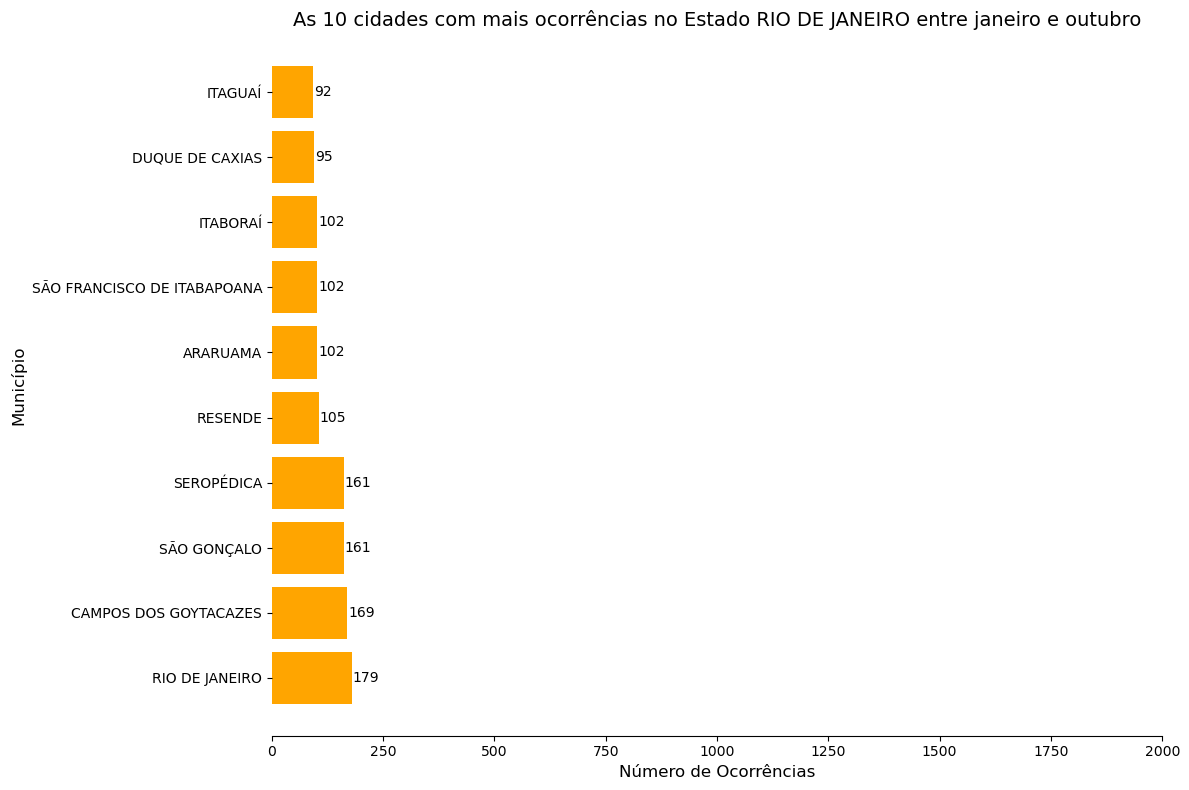

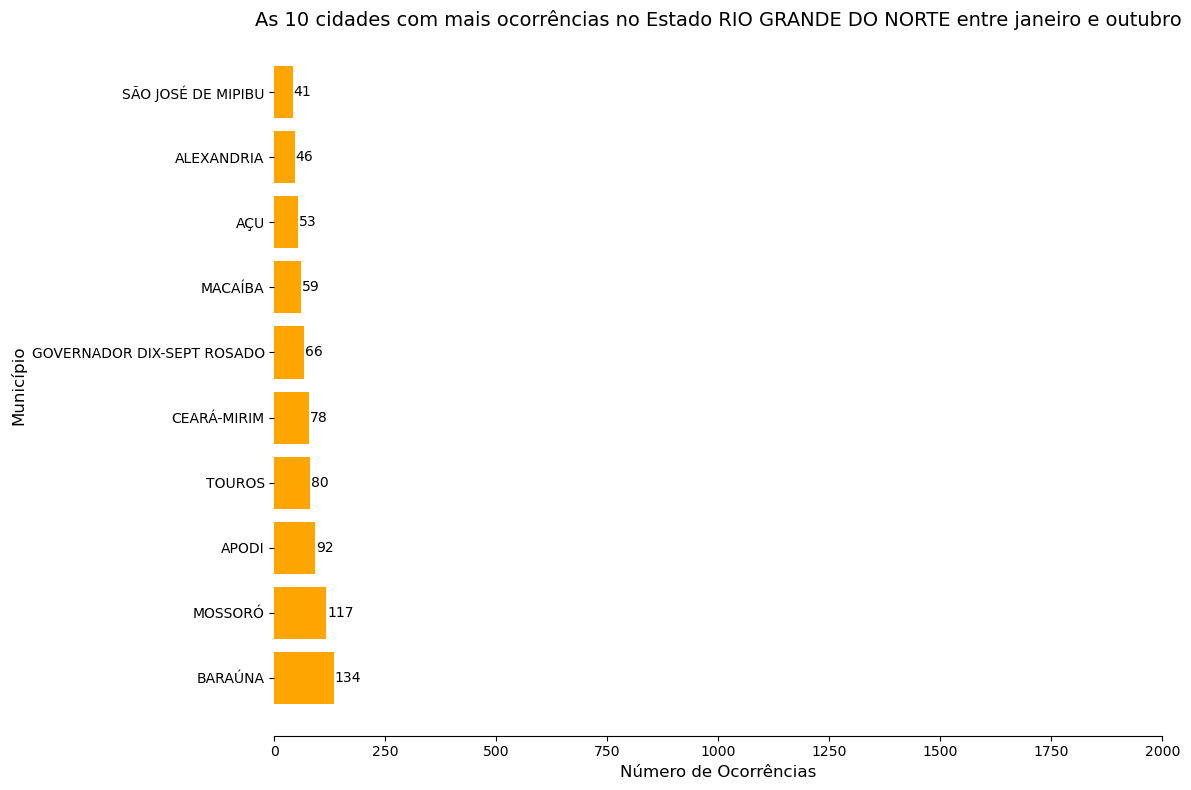

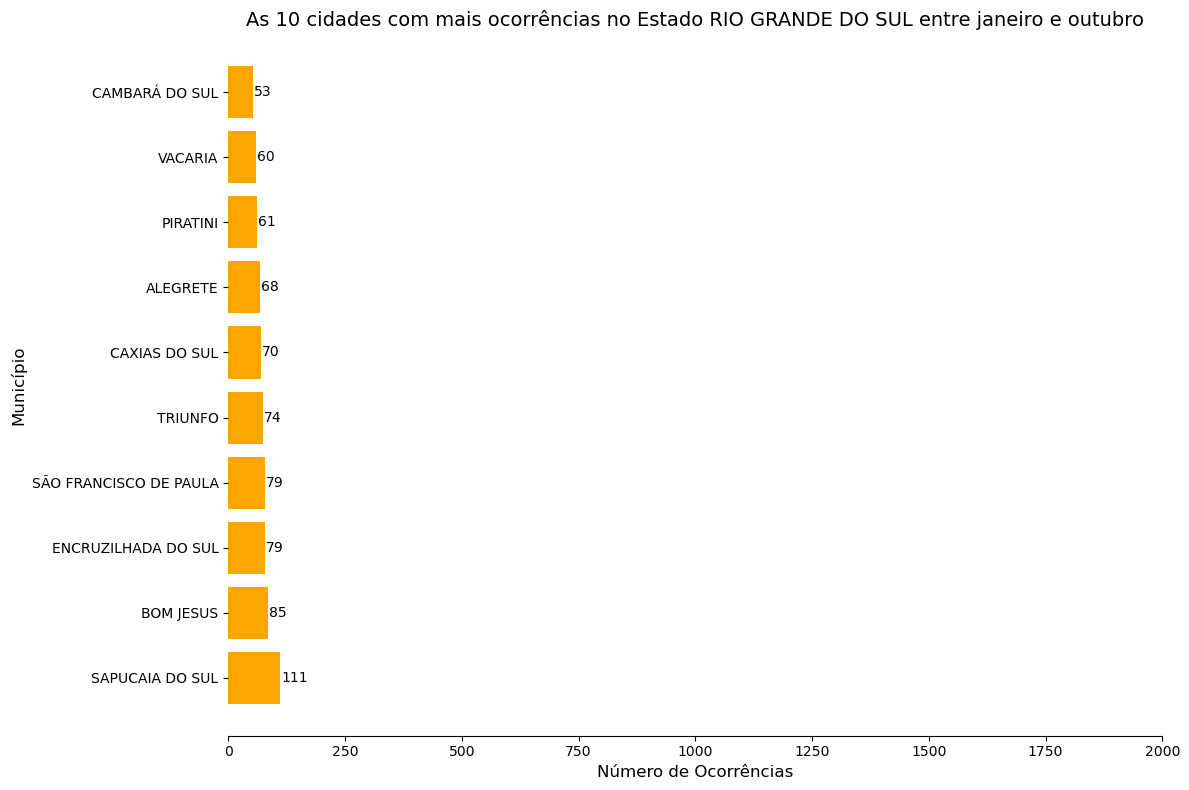

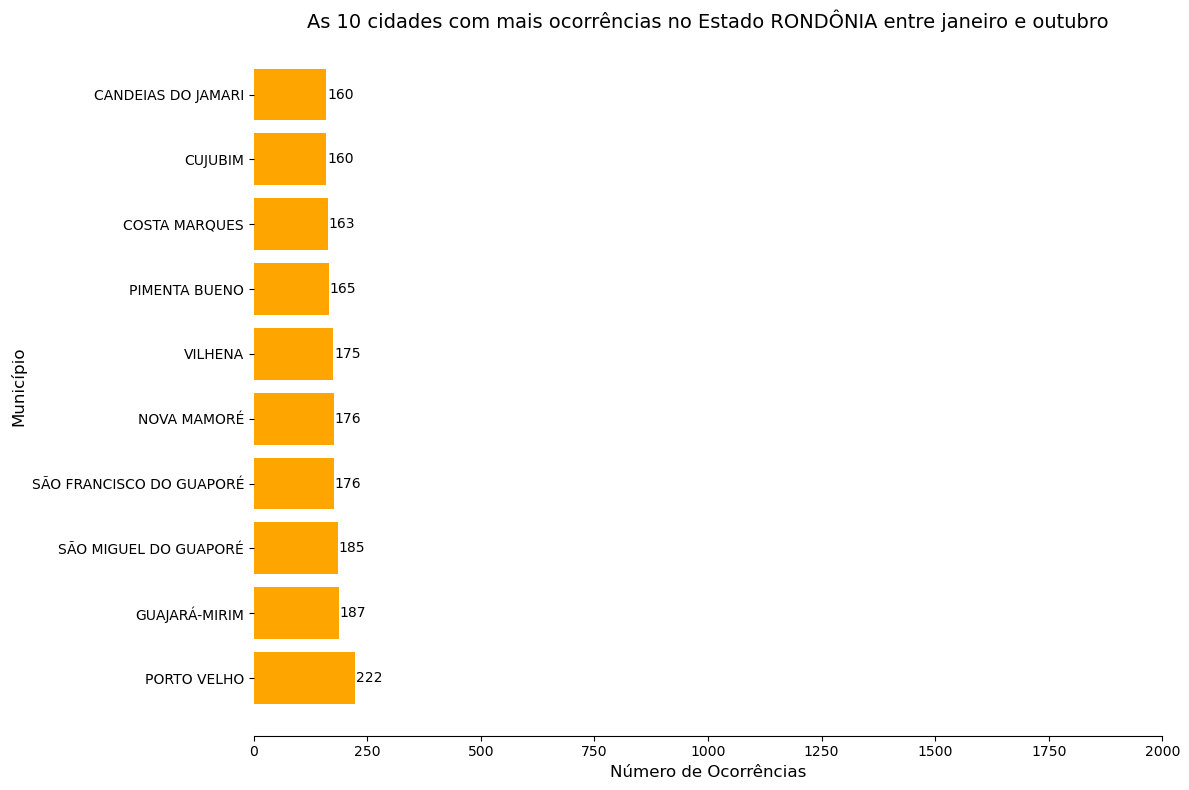

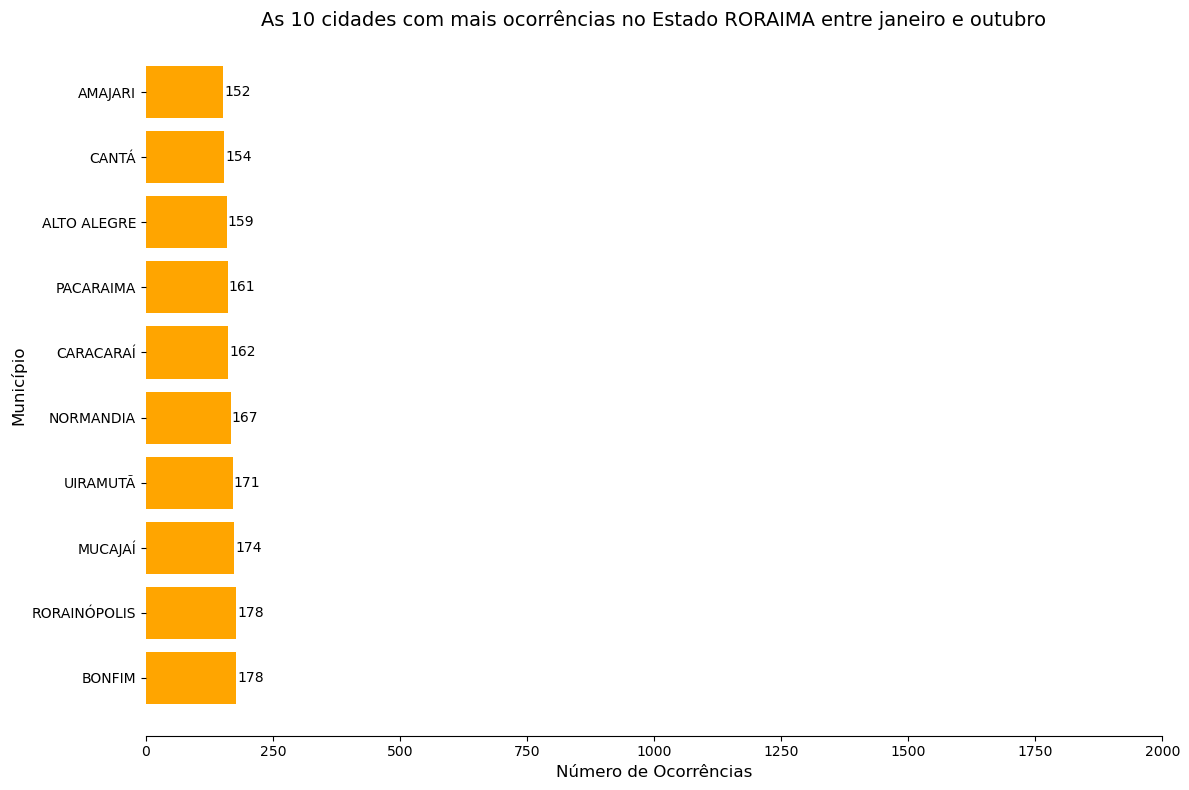

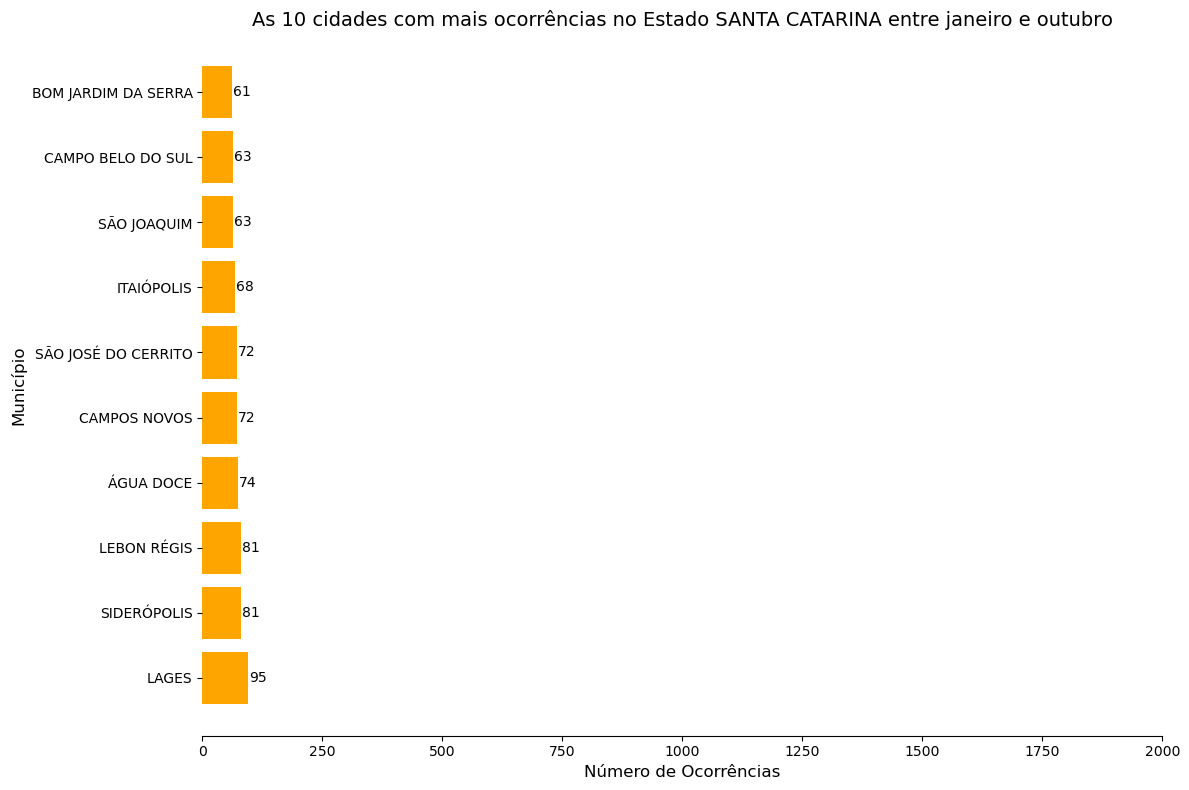

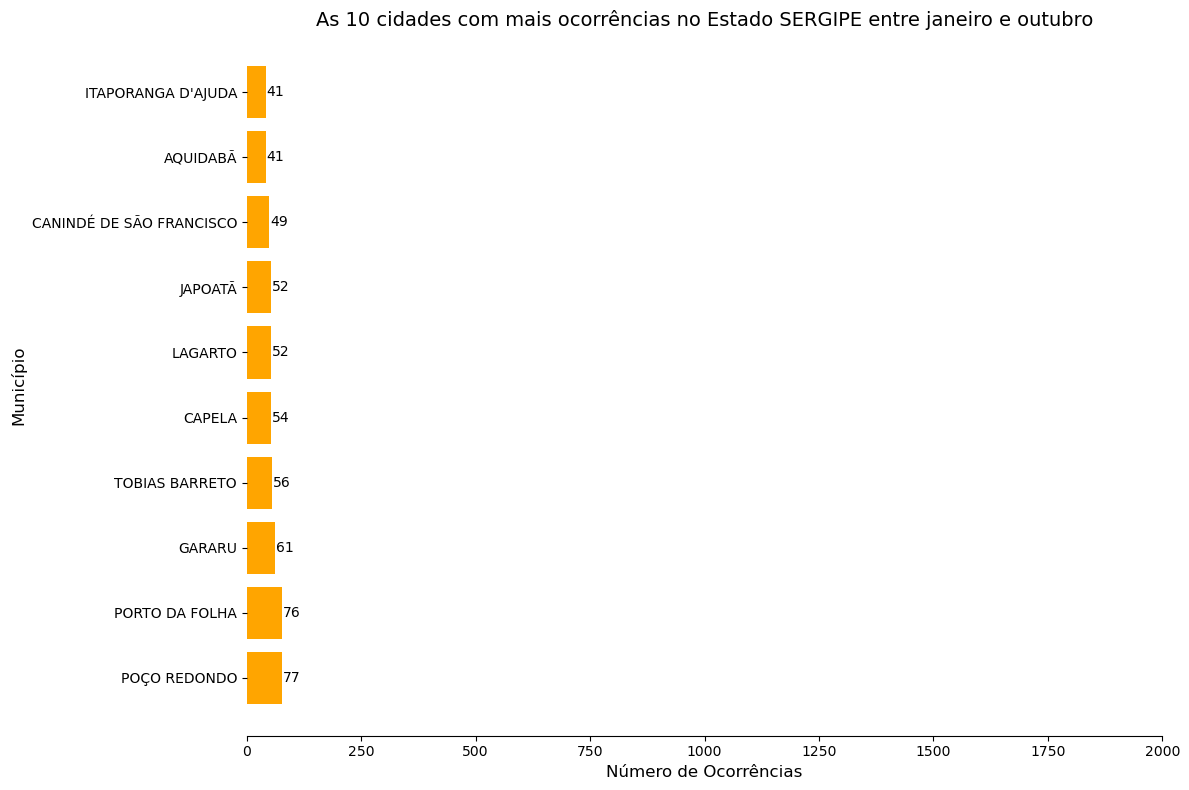

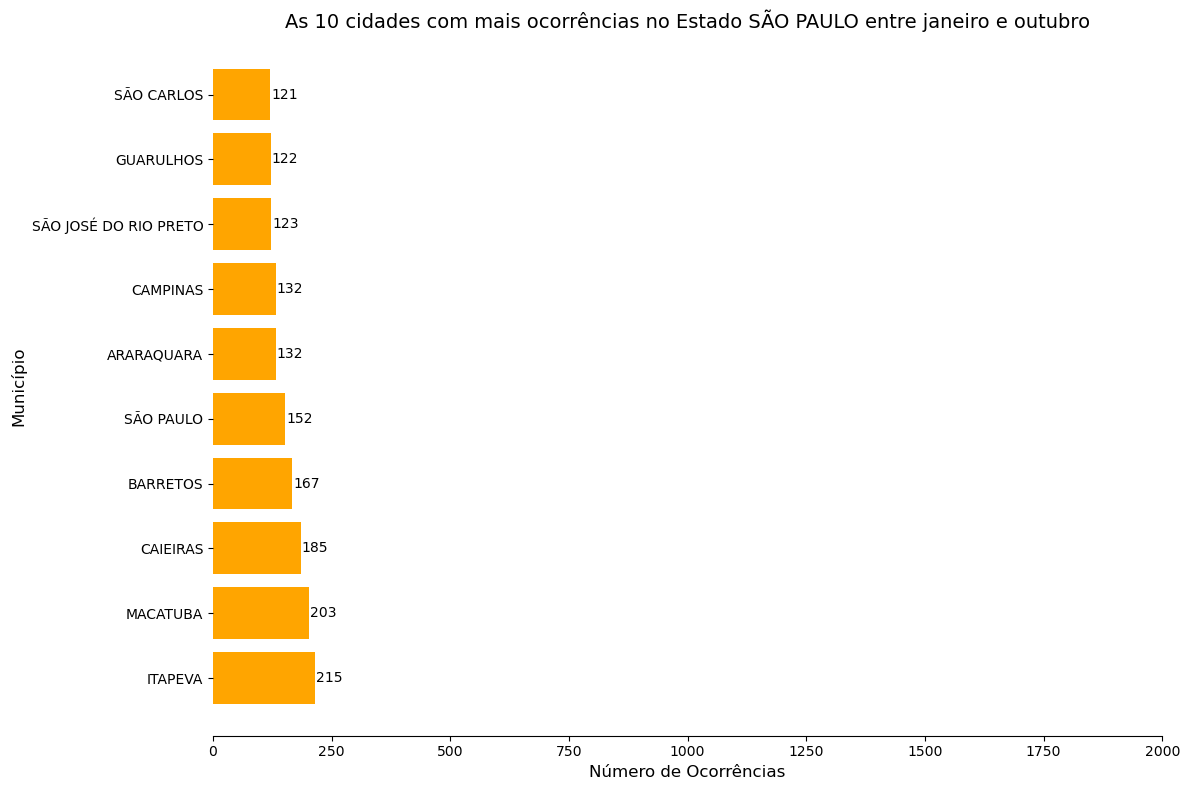

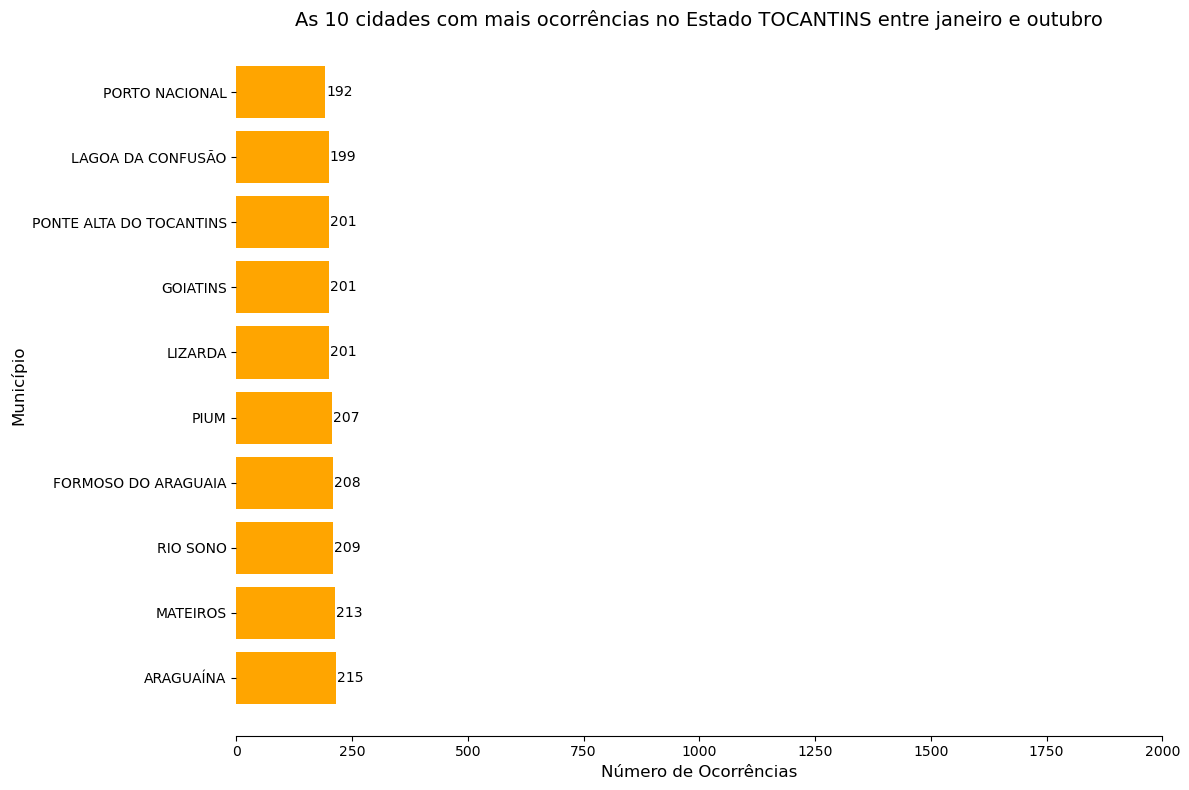

In [20]:
#as dez cidades com maior ocorrência de cada estado
df_oc = df_ocorr.reset_index()

#criar os gráficos
for estado in df_oc['estado'].unique():
    dado_e = df_oc[df_oc['estado'] == estado]
    cidades = dado_e.groupby('municipio')['count'].sum().sort_values(ascending=False).head(10)
    
    fig, ax = plt.subplots(figsize=(12,8))
    bars = ax.barh(cidades.index, cidades.values, color='orange')
    
    #adicionar os rótulos de valores nas barras
    for bar in bars: ax.text(bar.get_width() + 2, bar.get_y() +
                            bar.get_height() / 2, int(bar.get_width()),
                            ha = 'left', va='center', fontsize=10)
        
    ax.set_xlim(0,2000)
    ax.set_title(f'As 10 cidades com mais ocorrências no Estado {estado} entre janeiro e outubro', fontsize=14)
    ax.set_xlabel('Número de Ocorrências', fontsize=12)
    ax.set_ylabel('Município', fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(False)


    plt.tight_layout()
    plt.savefig(f'ocorrencias2024_estado_{estado}.png', format='png', dpi=300)
    plt.show()

In [21]:
#calcular a duração das ocorrências
duracao = arquivo.groupby(['estado','municipio','ano', 'mês'])[['dia']].count().rename(columns={'dia':'count'})
duracao.head()

count
estado municipio  ano  mês       
ACRE   ACRELÂNDIA 2024 3        3
                       4        1
                       5        1
                       6       12
                       7       27

C:\Users\apisa\AppData\Local\Temp\ipykernel_14556\3668842729.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


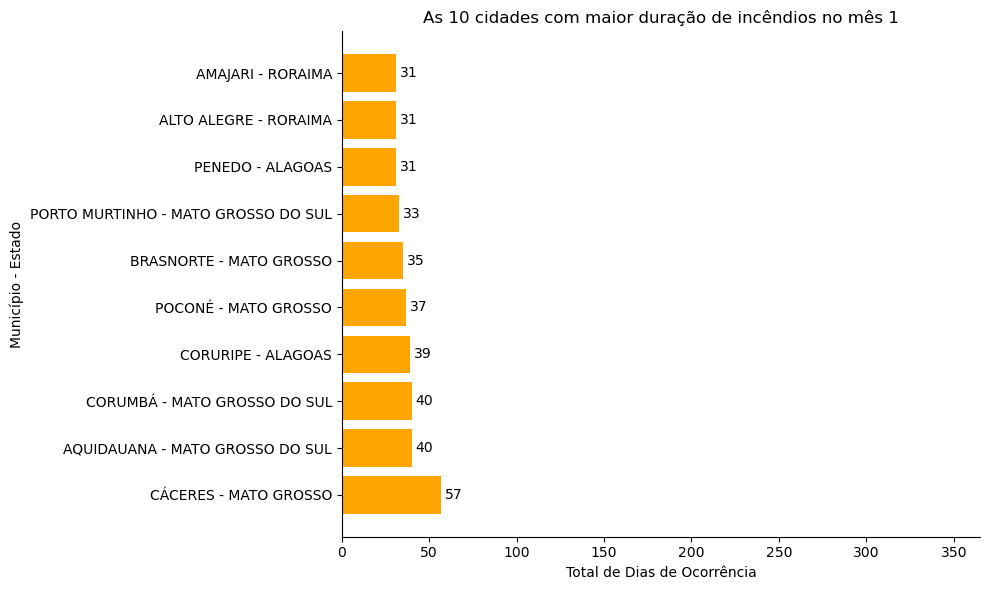

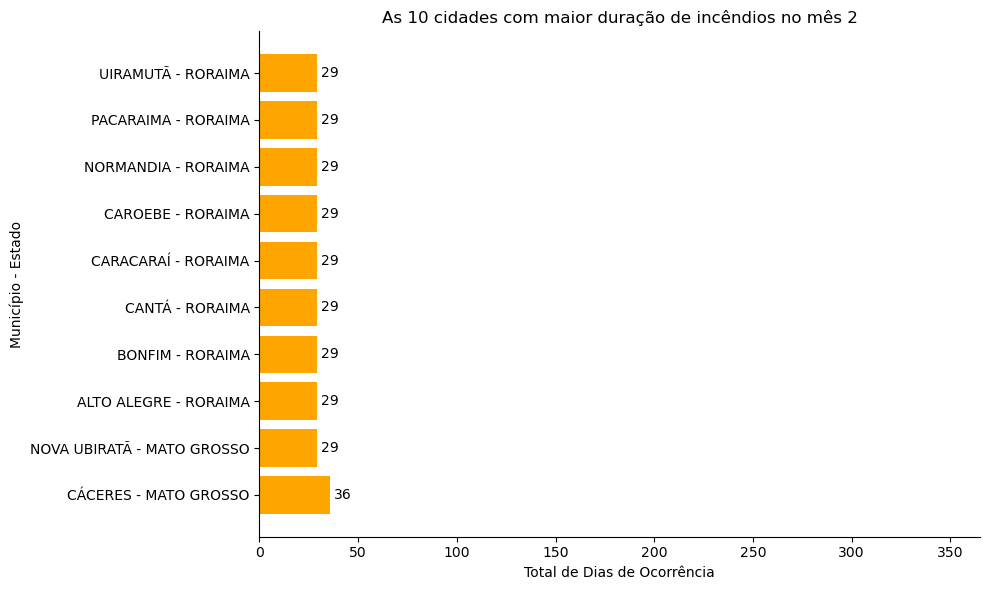

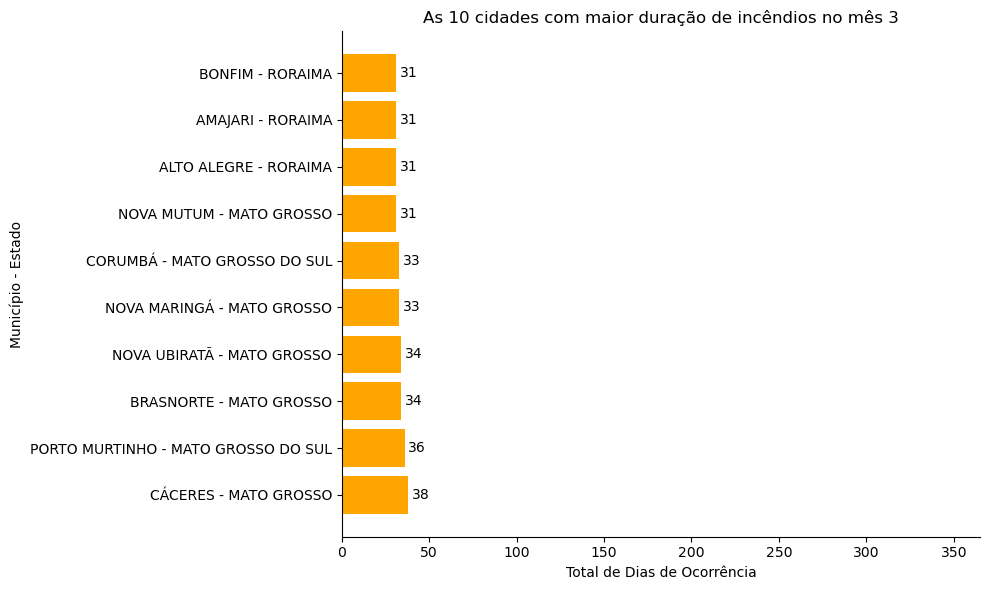

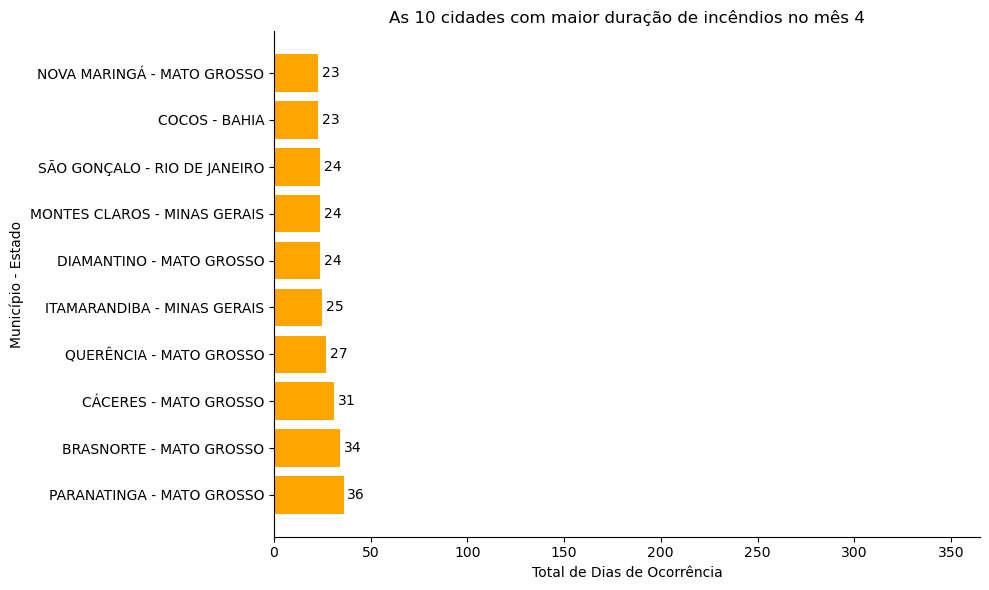

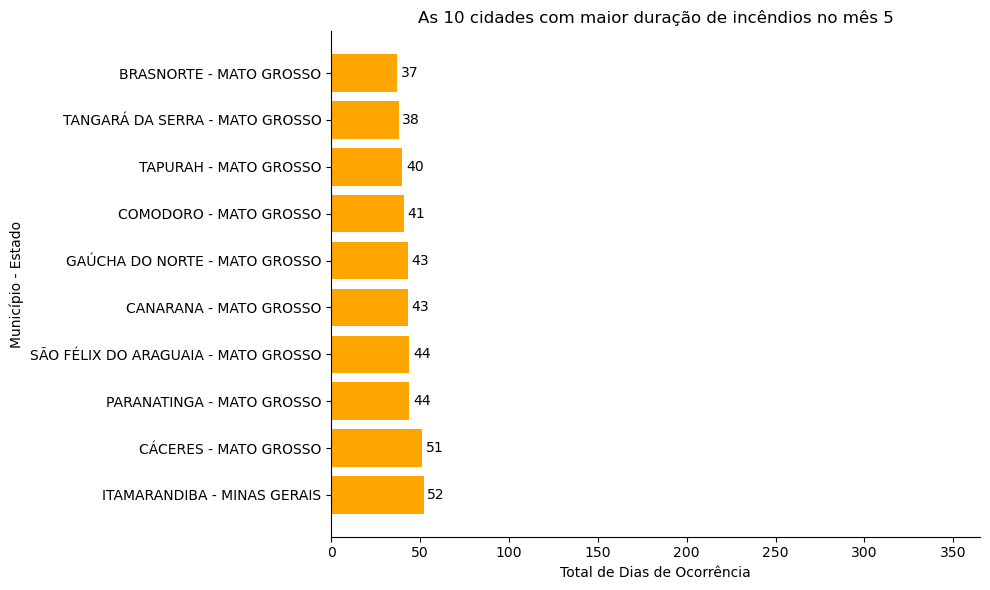

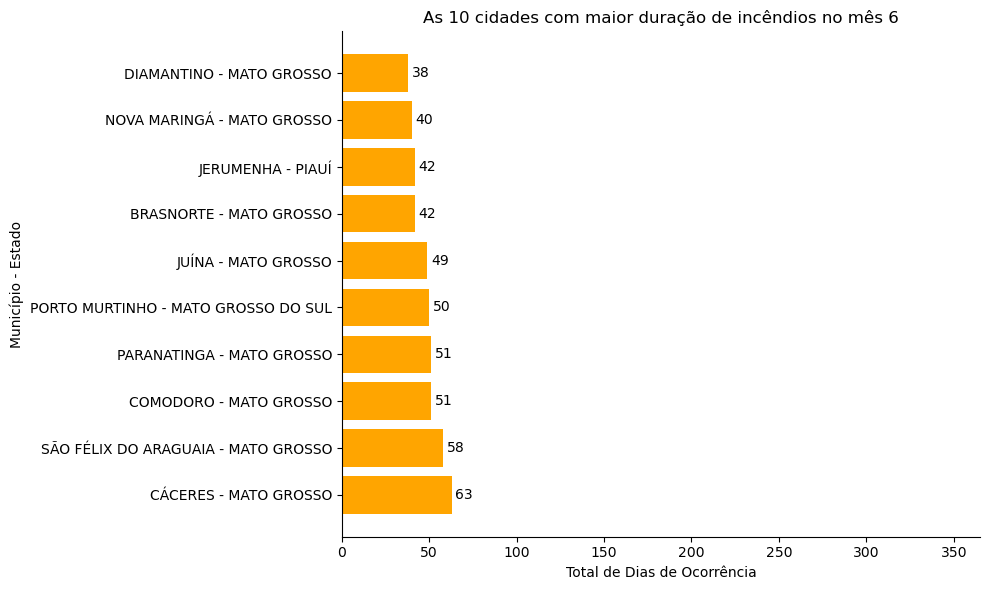

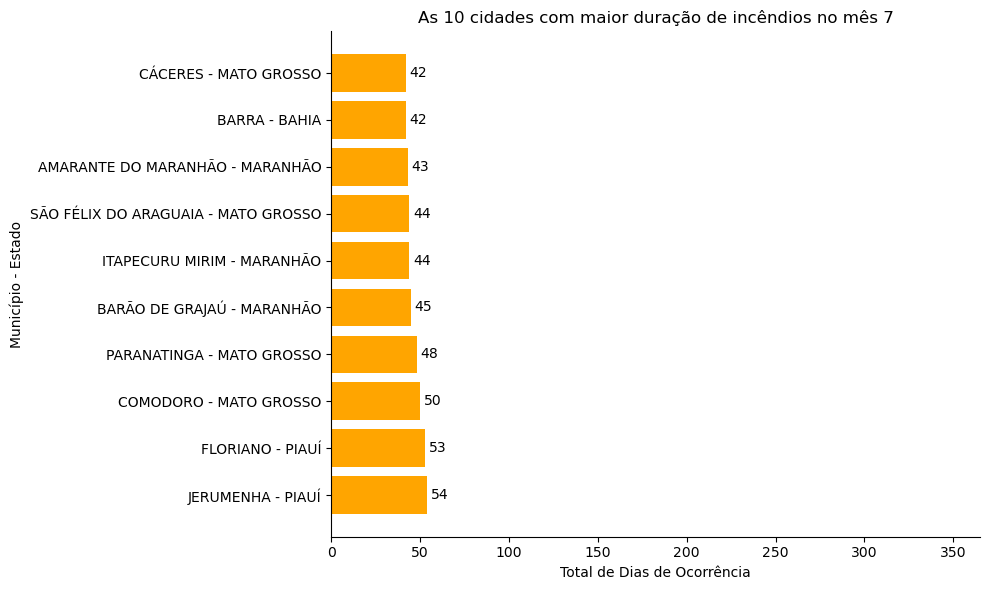

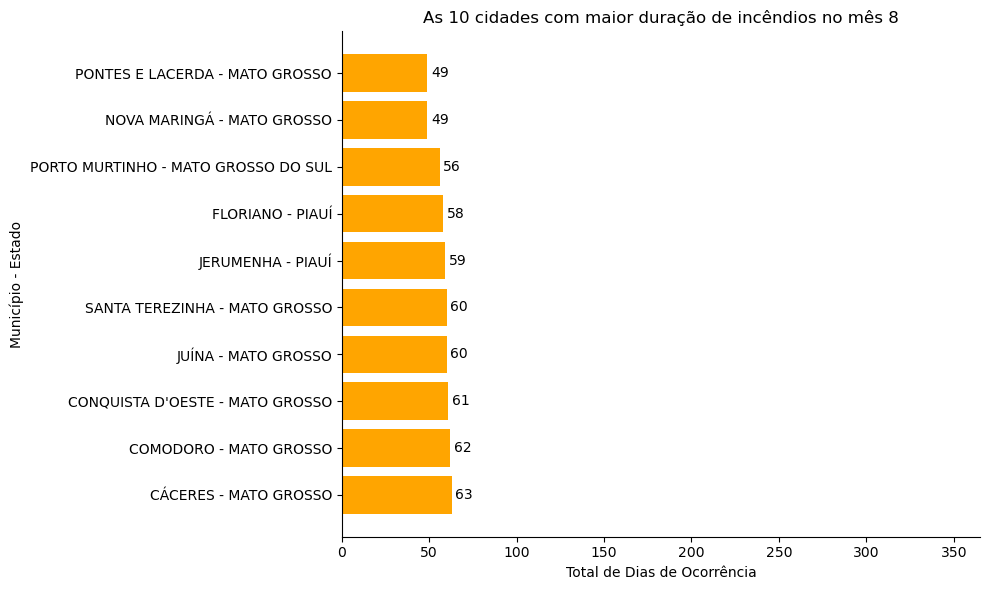

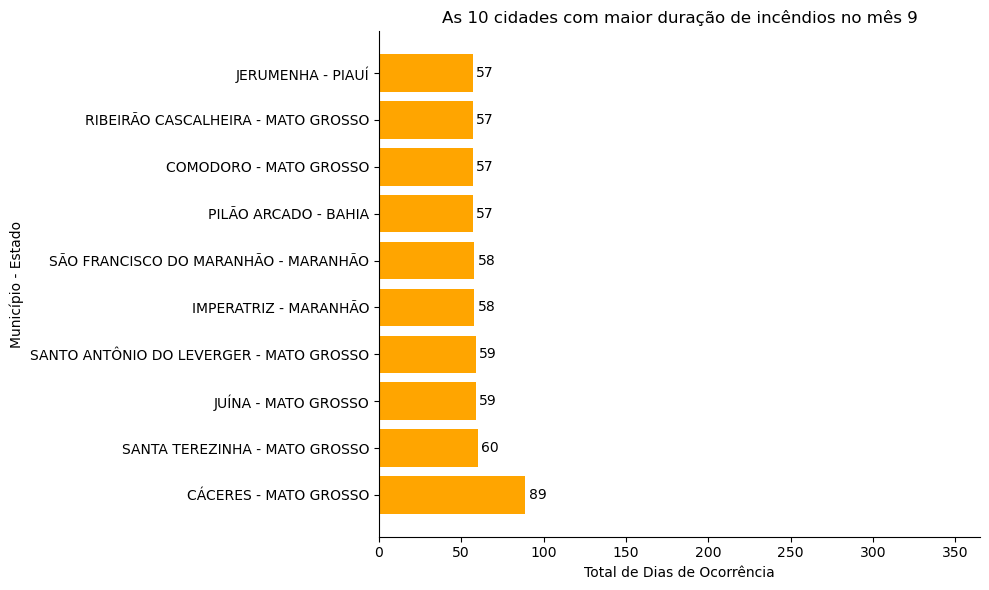

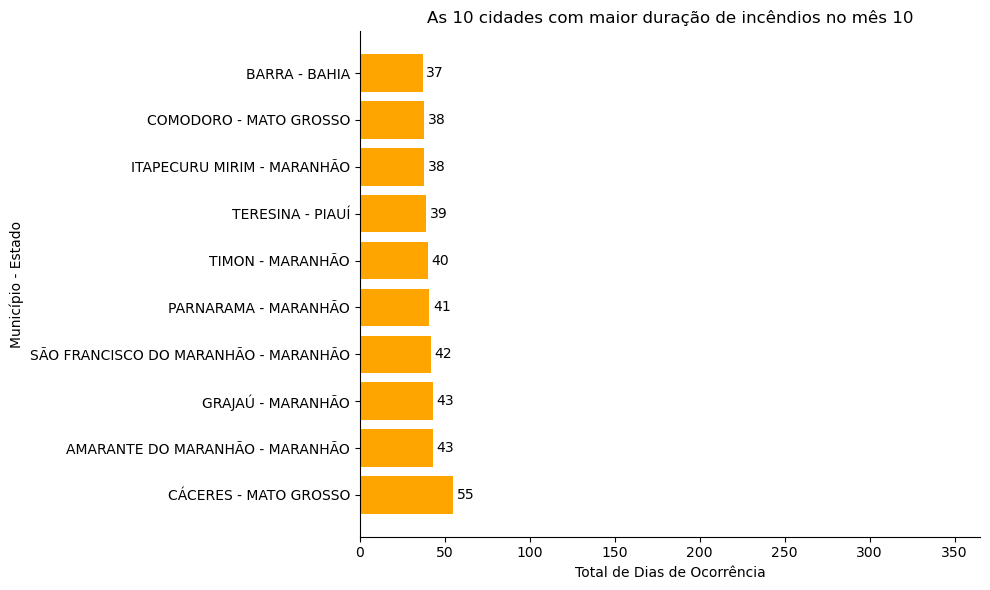

In [22]:
duracao_mes = duracao.groupby(['mês','estado','municipio'])['count'].sum().reset_index()

#criar gráfico
dur_cidades = (duracao_mes.sort_values(by=['mês','count'], ascending=[True,False])
               .groupby('mês').head(10))

meses = dur_cidades['mês'].unique()

for mes in meses:
    dados = dur_cidades[dur_cidades['mês']== mes]
    fig, ax = plt.subplots(figsize=(10,6))
    bars = plt.barh(dados['municipio'] + ' - ' + dados['estado'],
                   dados['count'], color='orange')
    
    #adicionar os rótulos com os valores nas barras
    for bar in bars: plt.text(bar.get_width() +2, bar.get_y() +
                             bar.get_height() /2, int(bar.get_width()),
                             ha='left', va='center', fontsize=10)
        
    ax.set_xlim(0,365)
    plt.title(f'As 10 cidades com maior duração de incêndios no mês {mes}')
    plt.xlabel('Total de Dias de Ocorrência')
    plt.ylabel('Município - Estado')
    plt.tight_layout()
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(False)
    plt.tight_layout()
    
    plt.savefig(f'cidades2024_maior_duracao_{mes}.png', format='png', dpi=300)

    plt.show()

Análise para os 10 anos:

In [23]:
pasta = "."
arquivo_out = "casos_incendio_10.csv"

def estacoes(mes):
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'

dataframes = []

for item in os.listdir(pasta):
    if item.endswith(".csv"):
      caminho_arquivo = os.path.join(pasta, item)
      df = pd.read_csv(caminho_arquivo)
      dataframes.append(df)

arquivo = pd.concat(dataframes, ignore_index=True)
arquivo = arquivo.sort_values(by=['ano', 'mês'], ascending=[False, True])
arquivo['estacao'] = arquivo['mês'].apply(estacoes)
arquivo = arquivo.drop_duplicates()
arquivo.to_csv(arquivo_out, index=False)

arquivo

estado            municipio           bioma   ano  mês  \
530053               BAHIA              LENÇÓIS        Caatinga  2024    1   
530054  MATO GROSSO DO SUL              CORUMBÁ        Pantanal  2024    1   
530055               BAHIA  SANTA CRUZ CABRÁLIA  Mata Atlântica  2024    1   
530056               BAHIA          SANTA LUZIA  Mata Atlântica  2024    1   
530057               BAHIA              CAATIBA  Mata Atlântica  2024    1   
...                    ...                  ...             ...   ...  ...   
49836             MARANHÃO      ITAPECURU MIRIM         Cerrado  2014   12   
49838                CEARÁ      VIÇOSA DO CEARÁ        Caatinga  2014   12   
49839             MARANHÃO        PAULINO NEVES         Cerrado  2014   12   
49844             MARANHÃO               TUNTUM         Cerrado  2014   12   
52246             MARANHÃO  CENTRO DO GUILHERME        Amazônia  2014   12   

        dia estacao  
530053    1   Verão  
530054    1   Verão  
530055    1   Verão  
530056    1   Verão  
530057    1   Verão  
...     ...     ...  
49836    27   Verão  
49838    18   Verão  
49839    18   Verão  
49844    11   Verão  
52246    17   Verão  

[770518 rows x 7 columns]

In [24]:
#contagem de ocorrências por estação ao total dos 10 anos
df_estacoes = arquivo.groupby(['estacao'])[['estacao']].count().rename(columns={'estacao': 'count'})
df_estacoes

count
estacao          
Inverno    256675
Outono      86829
Primavera  329675
Verão       97339

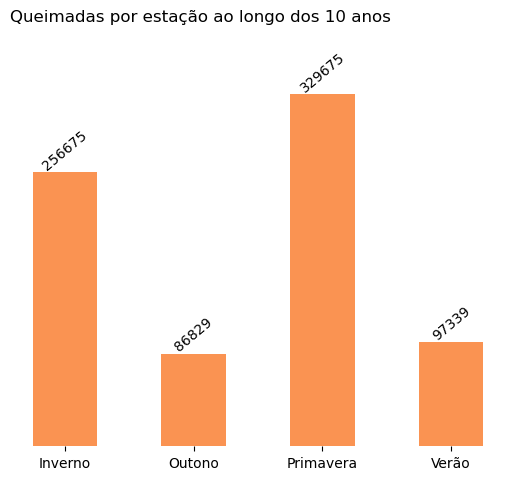

In [25]:
fig, ax = plt.subplots()
bars = ax.bar(list(df_estacoes.index), df_estacoes["count"], color="#FA9352", width=0.5)

for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
            ha='center', va='bottom', rotation=40)

ax.set_xticks(list(df_estacoes.index))
ax.set_xticklabels(list(df_estacoes.index))

ax.set_title('Queimadas por estação ao longo dos 10 anos', loc='left', pad=40)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)

plt.show()
fig.savefig('queimadas_estacoes_10.png', dpi=100, bbox_inches='tight', orientation='portrait')

In [26]:
#contagem de ocorrências em cada ano
df_ano = arquivo.groupby("ano")[['ano']].count().rename(columns={"ano":"count"})
df_ano

count
ano         
2014   52292
2015   58097
2016   54566
2017   53258
2018   41793
2019   54504
2020   56103
2021   53281
2022   50434
2023   55725
2024  240465

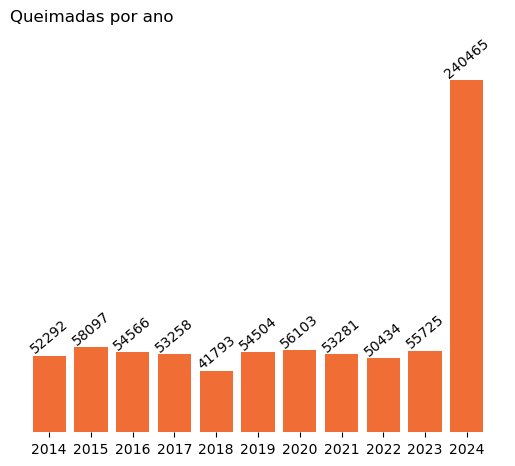

In [27]:
#gráfico das ocorrências de queimadas por ano
fig, ax = plt.subplots()
bars = ax.bar(df_ano.index, df_ano["count"], color="#F06D35")

for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
            ha='center', va='bottom', rotation=40)

ax.set_xticks(df_ano.index)
ax.set_xticklabels(df_ano.index)

ax.set_title('Queimadas por ano', loc='left', pad=30)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)

plt.show()
fig.savefig('queimadas_ano_todos.png', dpi =100, bbox_inches='tight', orientation= 'portrait')

In [28]:
df_meses = arquivo.groupby('mês')[['mês']].count().rename(columns={'mês': 'count'})
df_meses

count
mês        
1     37120
2     23638
3     26439
4     23263
5     37127
6     53406
7     77675
8    125594
9    154535
10   119751
11    55389
12    36581

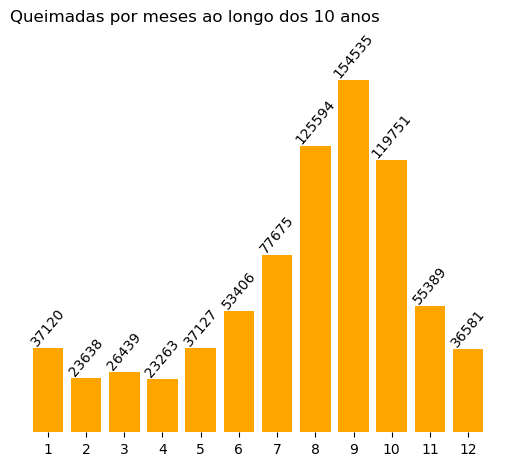

In [29]:
fig, ax = plt.subplots()
bars = ax.bar(list(df_meses.index), df_meses["count"], color="orange")

for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
            ha='center', va='bottom', rotation=50)

ax.set_xticks(list(df_meses.index))
ax.set_xticklabels(list(df_meses.index))

ax.set_title('Queimadas por meses ao longo dos 10 anos', loc='left', pad=30)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)

plt.show()
fig.savefig('queimadas_anos_10anos.png', dpi=100, bbox_inches='tight', orientation='portrait')


In [30]:
#ocorrências de casos por município em cada ano
df_ocorr = arquivo.groupby(['estado','municipio','ano'])[['municipio']].count().rename(columns={'municipio':'count'})
df_ocorr.head()

count
estado municipio  ano        
ACRE   ACRELÂNDIA 2014     31
                  2015     42
                  2016     41
                  2017     36
                  2018     34

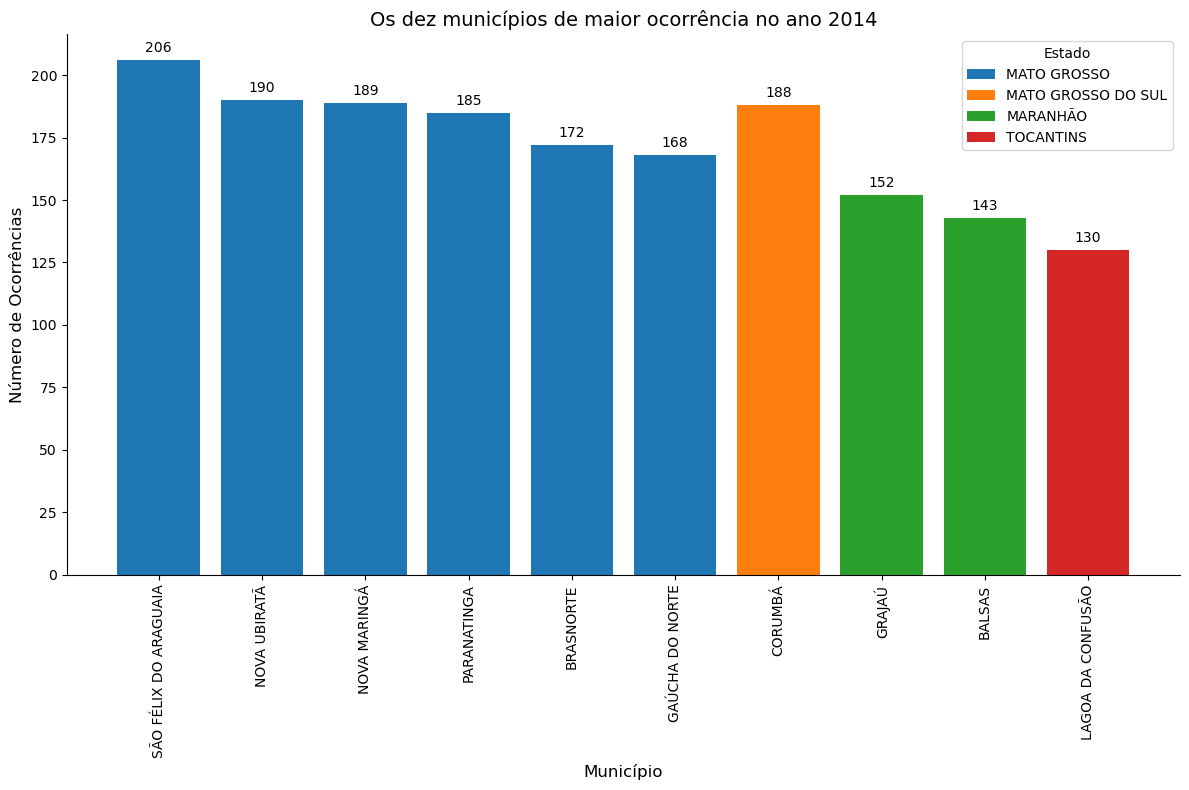

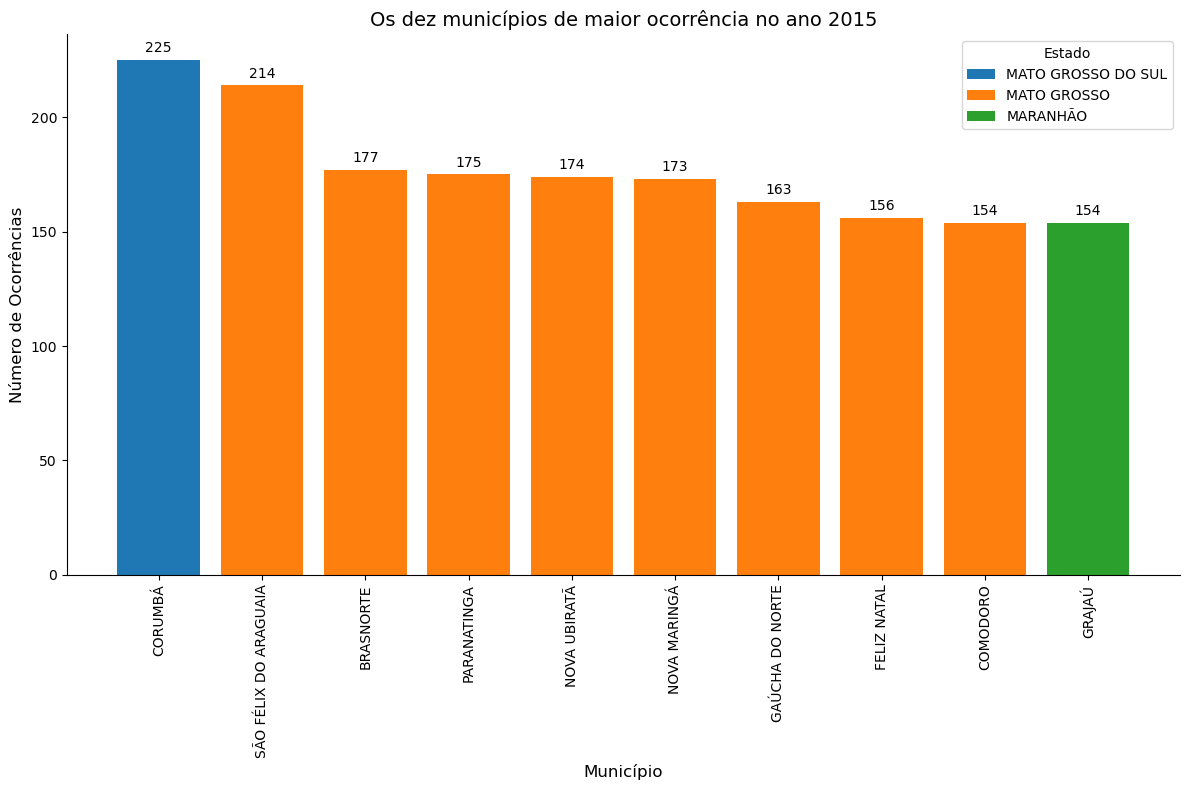

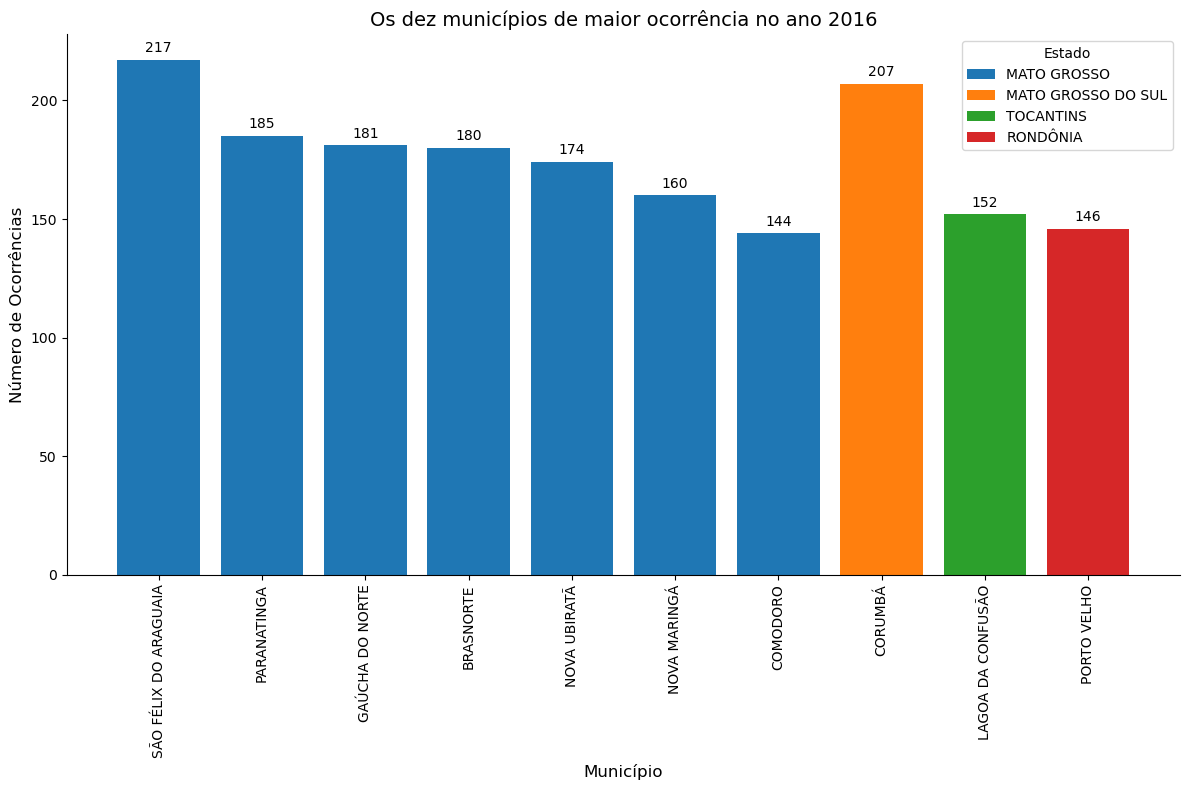

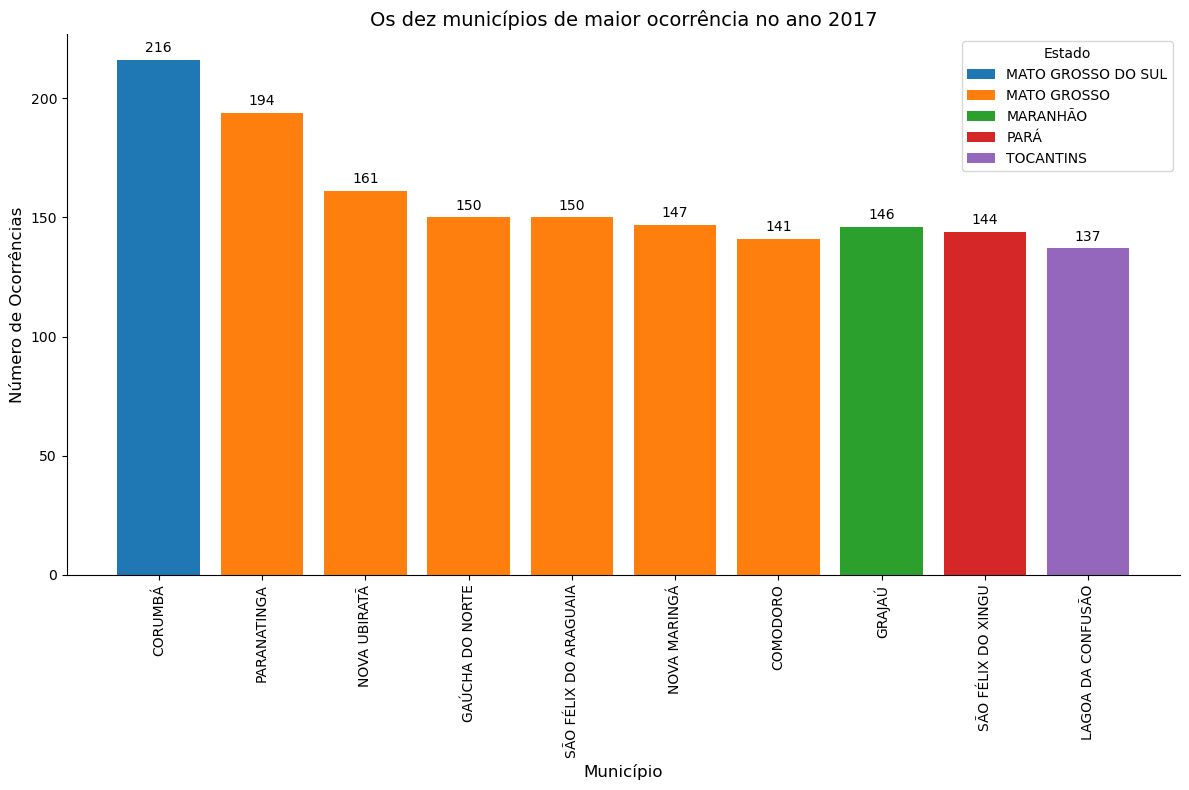

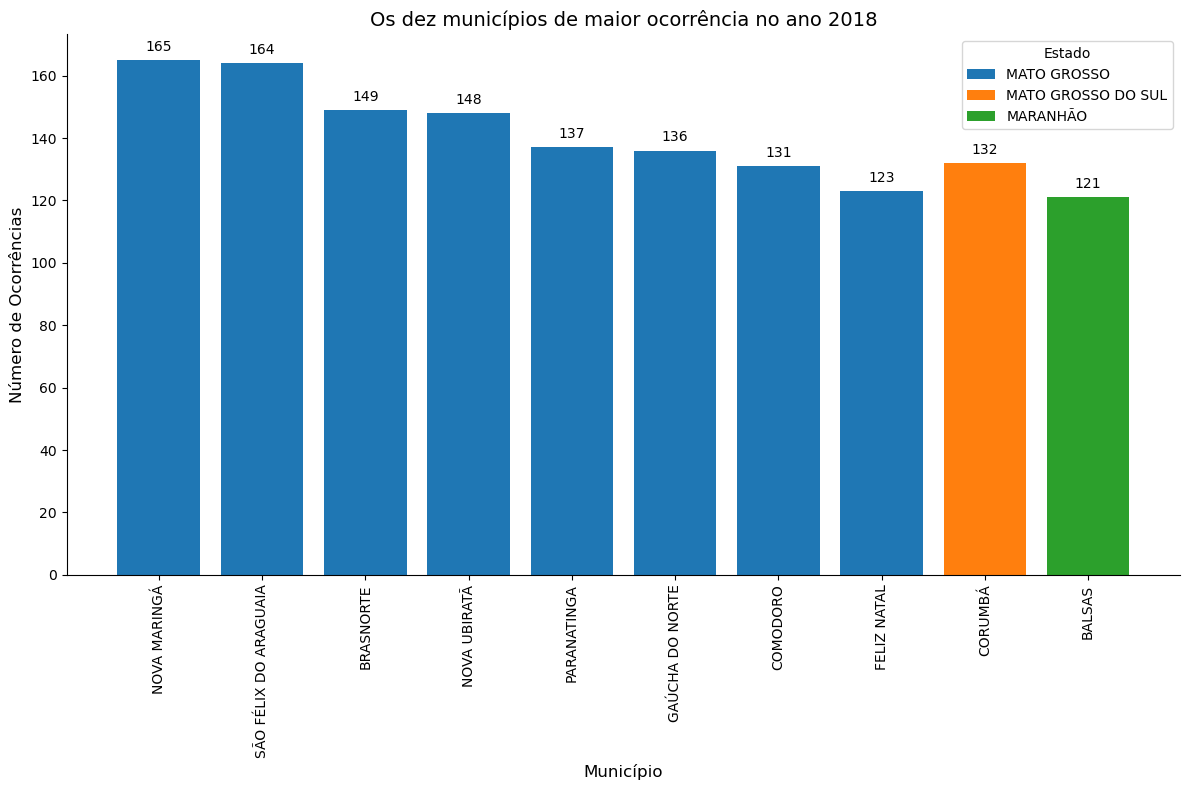

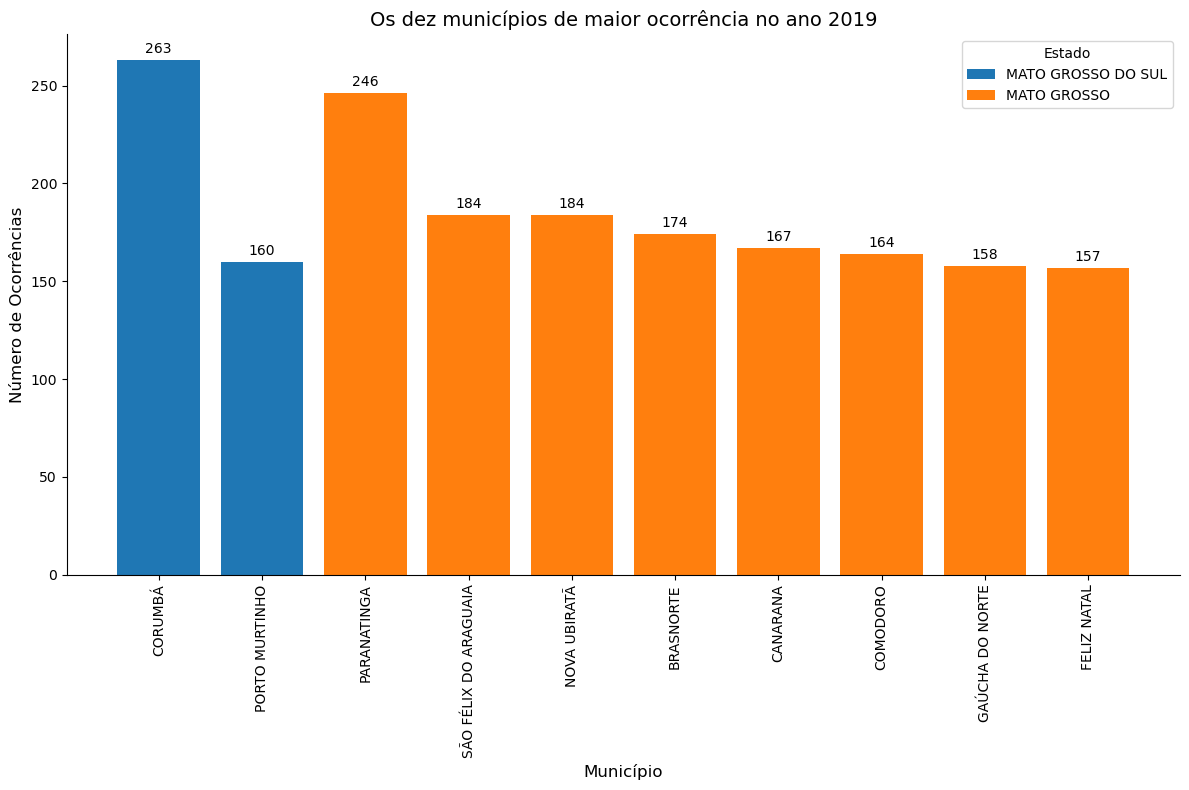

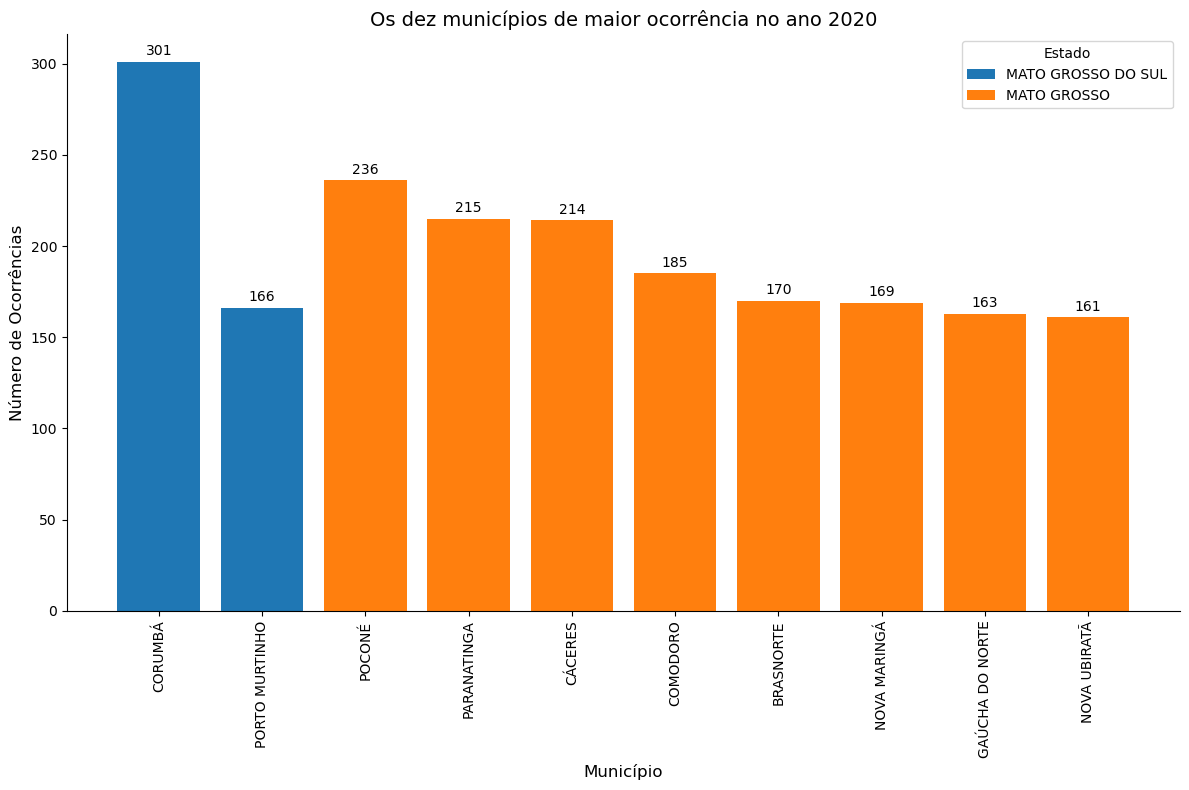

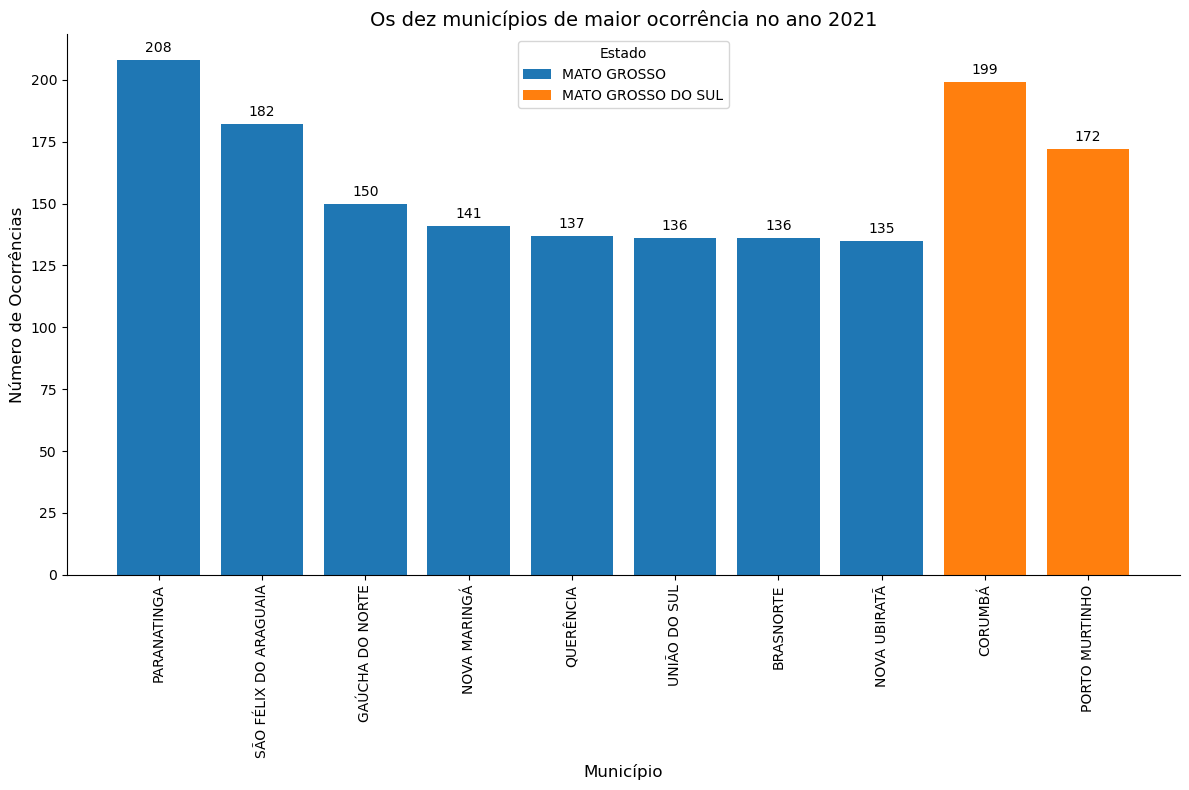

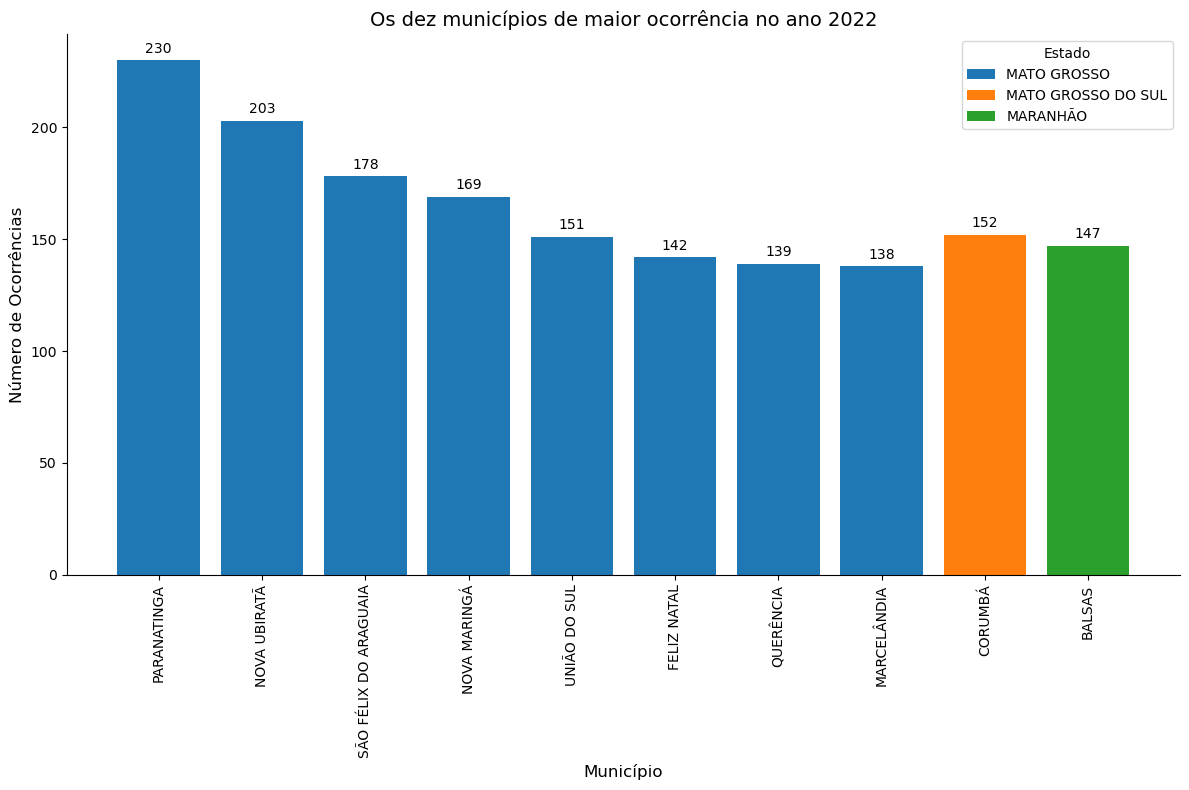

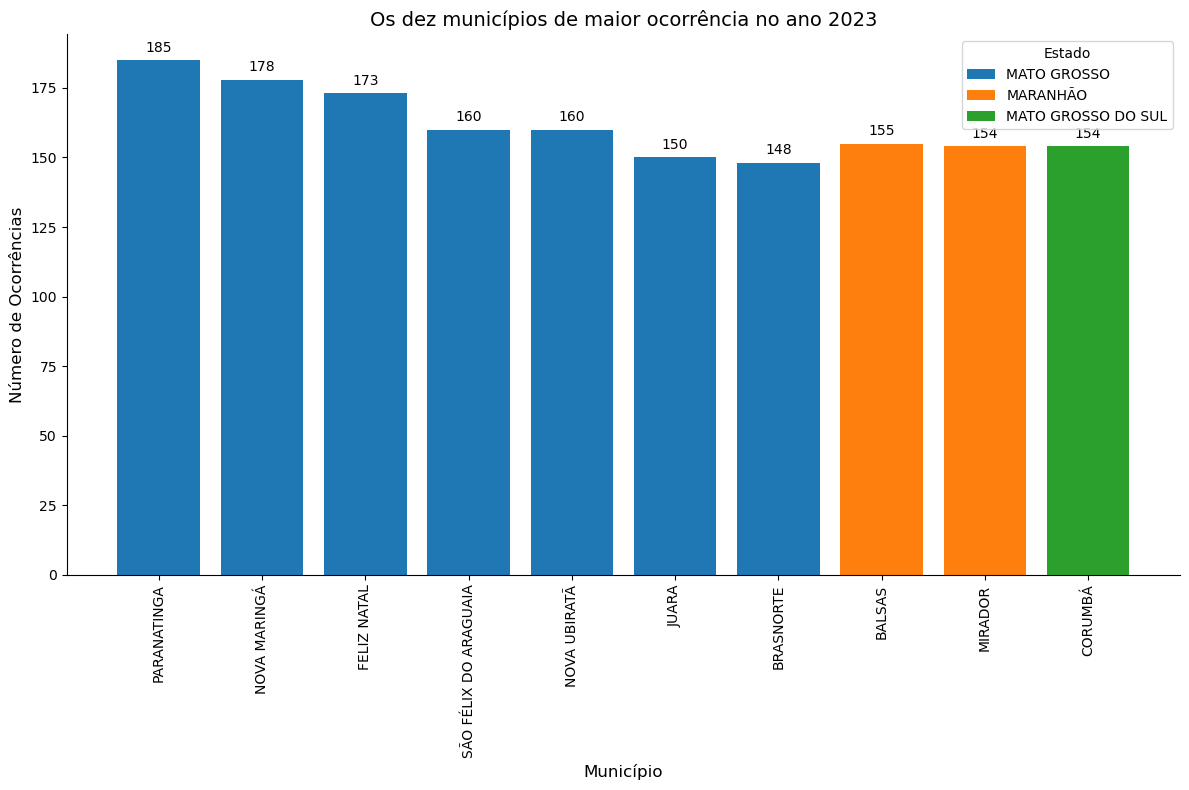

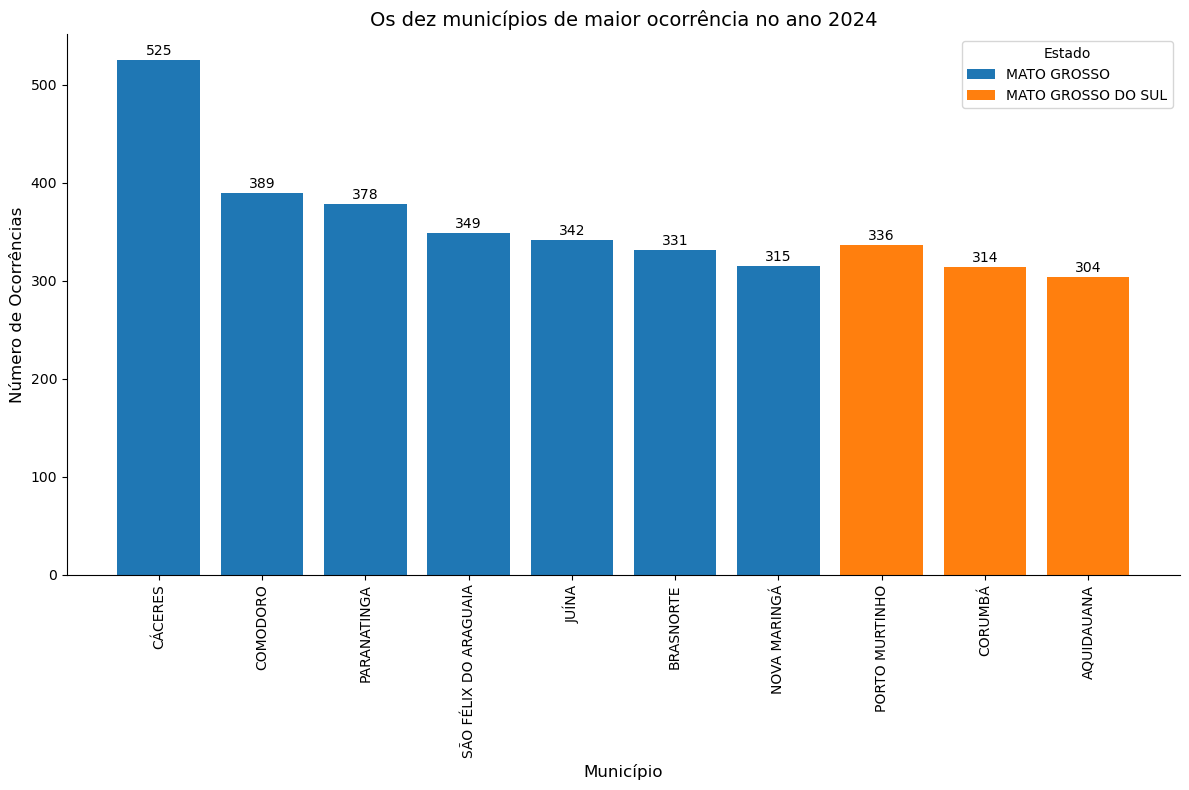

In [31]:
anos = df_ocorr.index.get_level_values('ano').unique()

for ano in anos:
    df_ano = df_ocorr[df_ocorr.index.get_level_values('ano') == ano]
    df_ano = df_ano.reset_index()
    #para ordernar os municípios de maior ocorrência 1º
    df_ano_sorted = df_ano.sort_values(by='count', ascending=False)
    df_ano_max = df_ano_sorted.head(10)
    plt.figure(figsize=(12,8))
    
    #criar gráfico
    for estado in df_ano_max['estado'].unique():
        df_estado = df_ano_max[df_ano_max['estado'] == estado]
        bars = plt.bar(df_estado['municipio'], df_estado['count'],
                      label=estado)
        #adicionar os rótulos de valores das barras
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width() / 2, 
                     bar.get_height() + 2, int(bar.get_height()),
                     ha='center', va='bottom')
            
    plt.title(f'Os dez municípios de maior ocorrência no ano {ano}', fontsize=14)
    plt.xlabel('Município', fontsize=12)
    plt.ylabel('Número de Ocorrências', fontsize=12)
    plt.xticks(rotation=90) 
    
    plt.legend(title='Estado')

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(False)

    plt.tight_layout()

    plt.savefig(f'Ocorrencias_municipio_{ano}.png', format='png', dpi=300)
    plt.show()

In [32]:
#calcular a duração das ocorrências
duracao = arquivo.groupby(['estado','municipio','ano', 'mês'])[['dia']].count().rename(columns={'dia':'count'})
duracao.head()

count
estado municipio  ano  mês       
ACRE   ACRELÂNDIA 2014 7        2
                       8       12
                       9       12
                       10       3
                       11       2

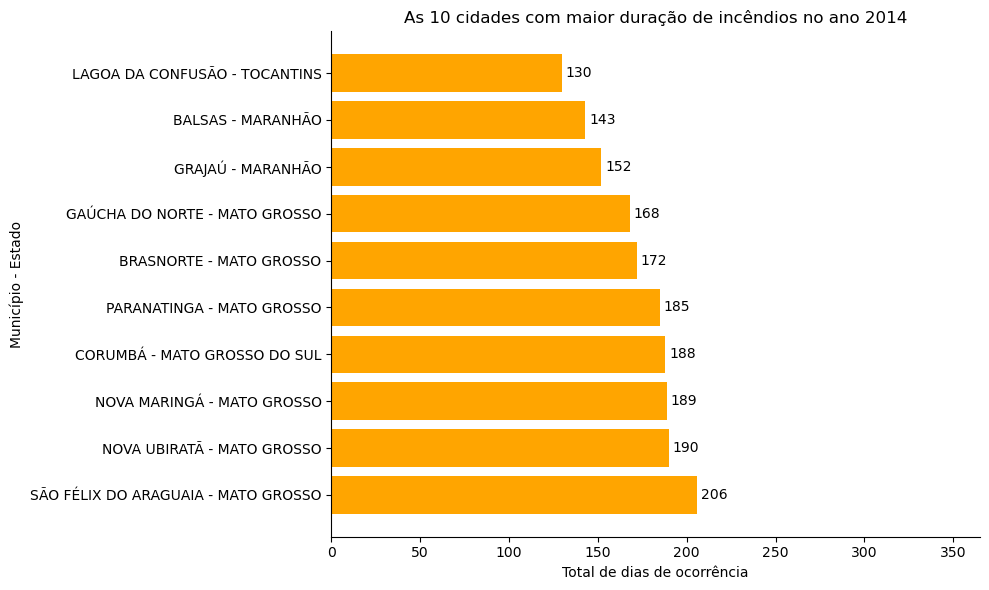

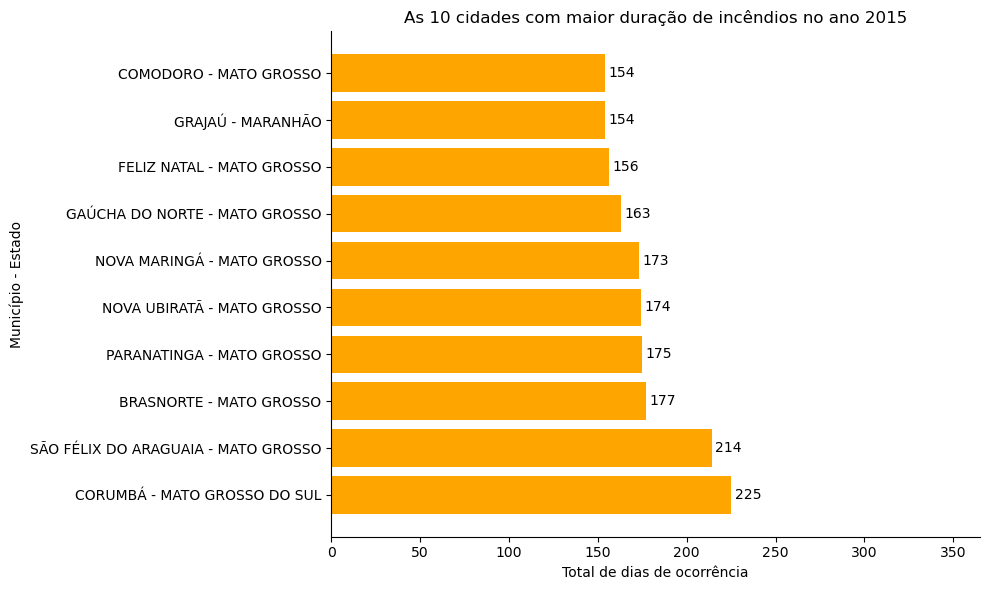

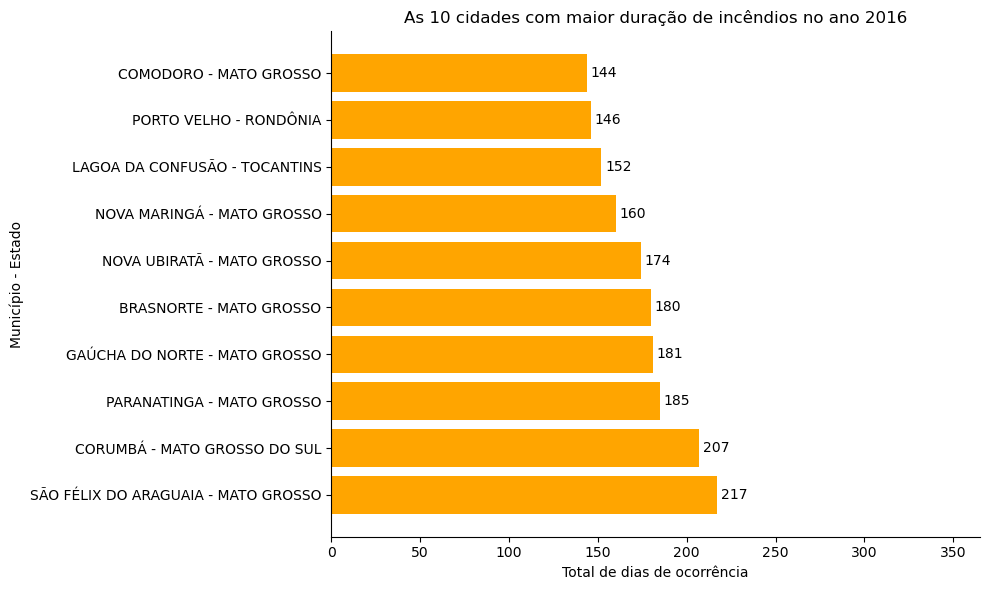

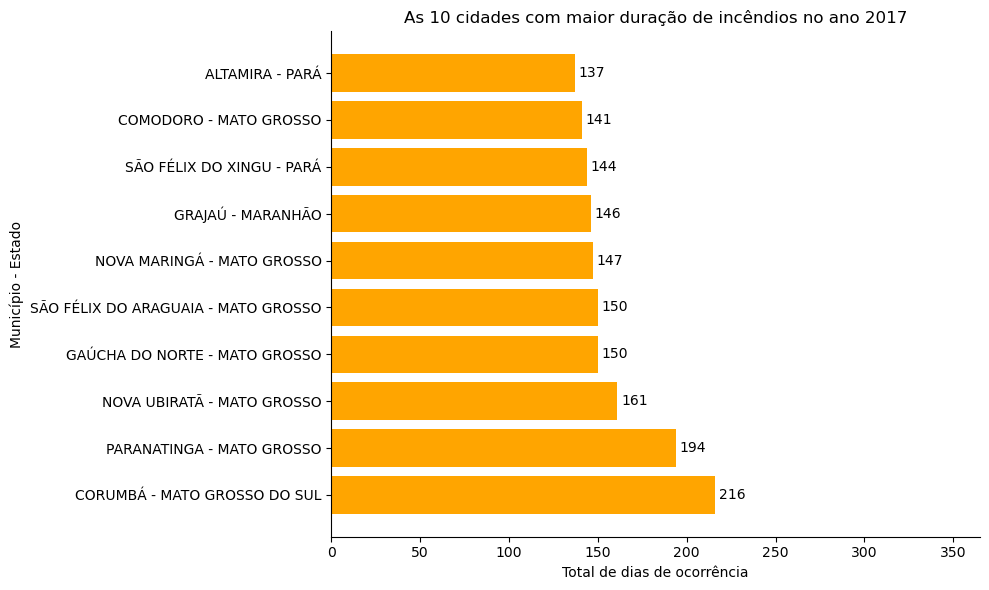

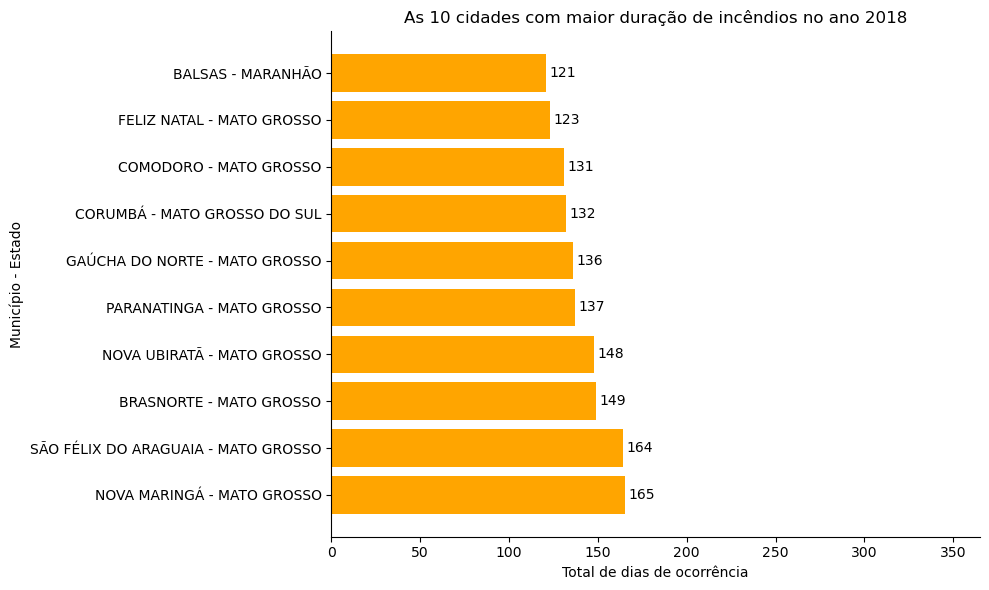

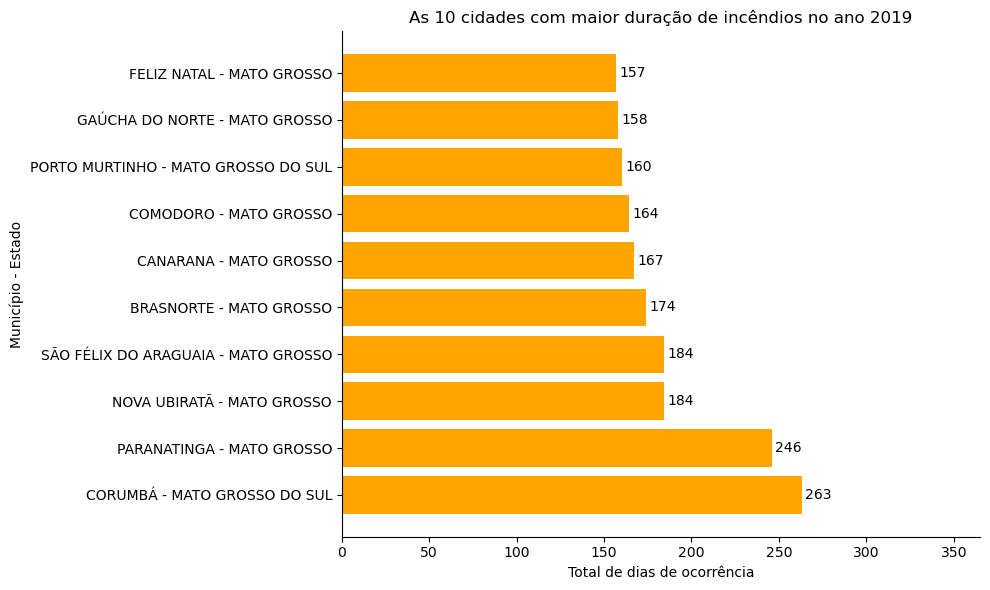

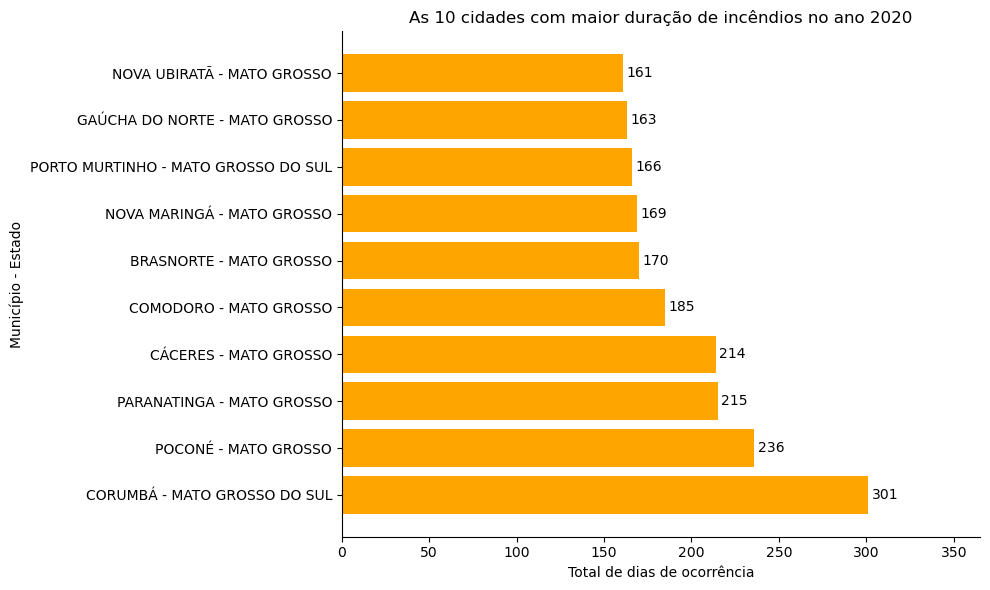

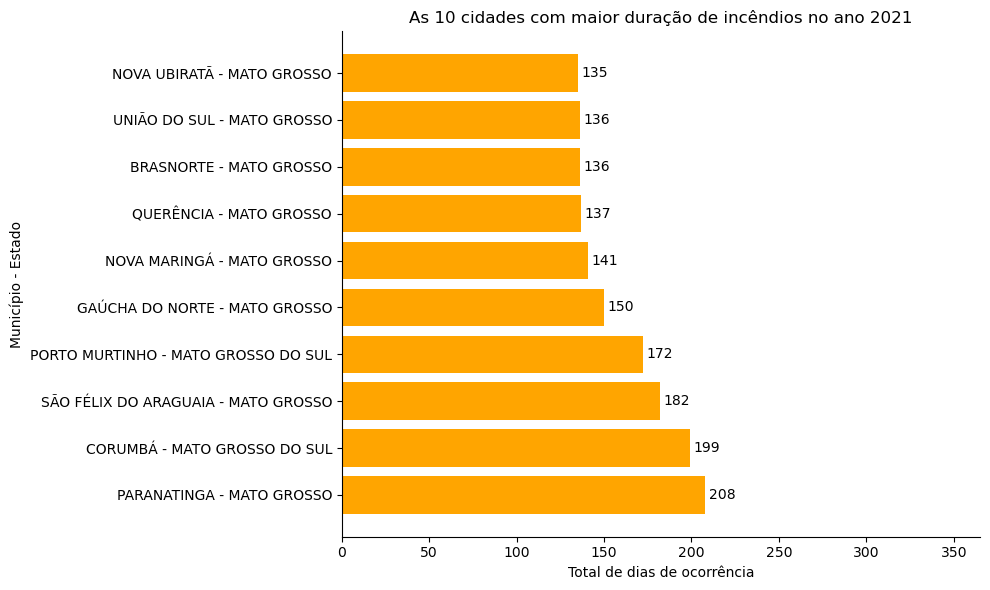

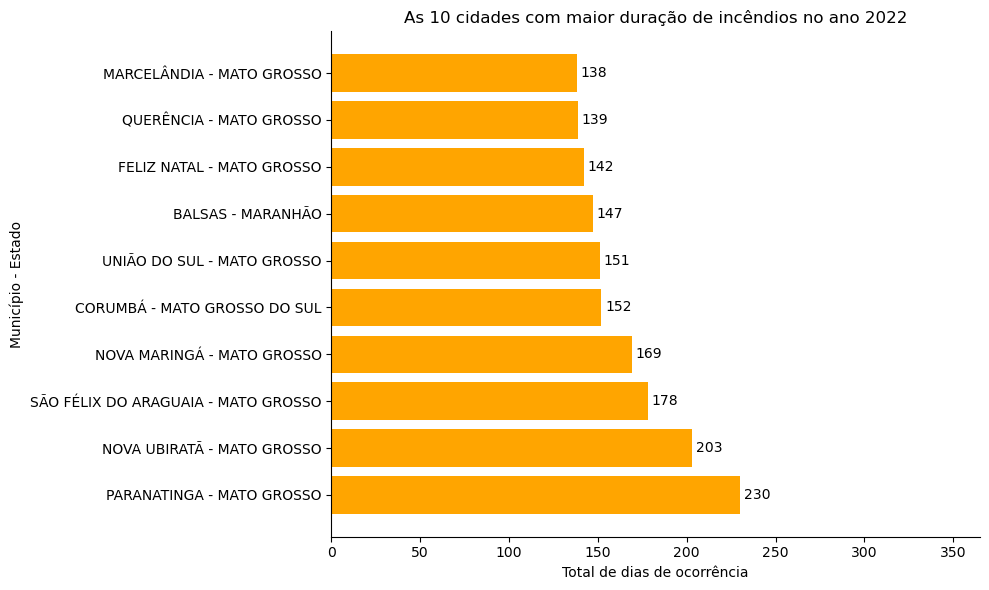

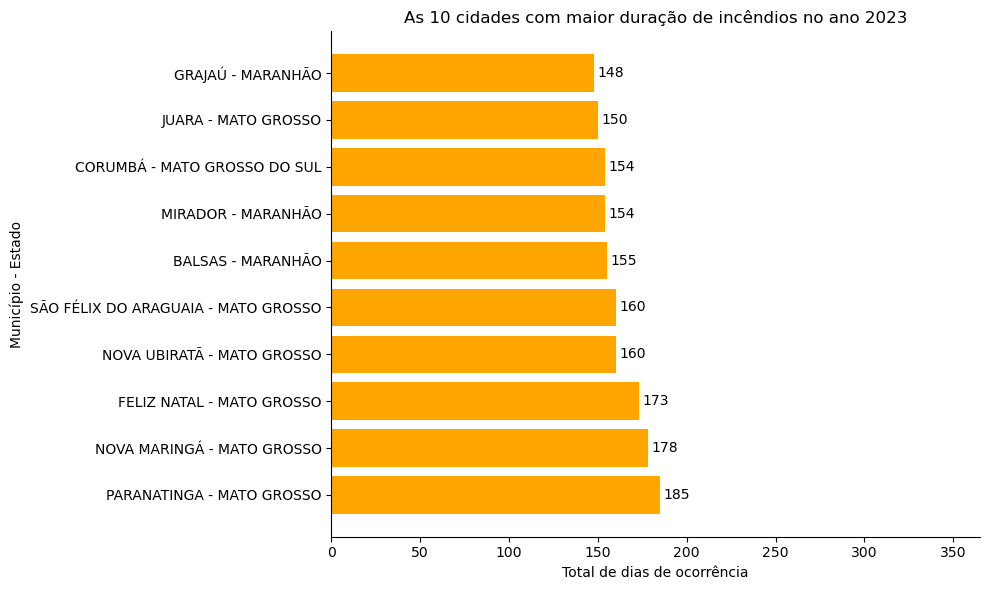

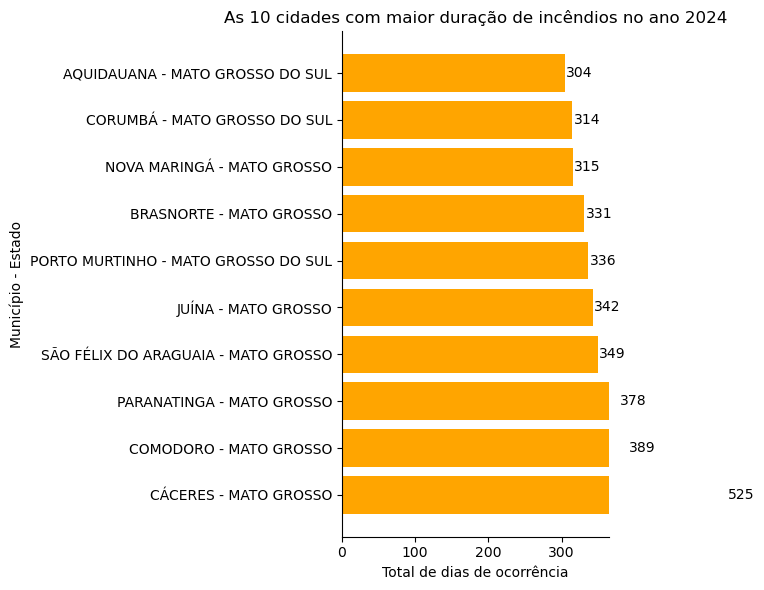

In [33]:
duracao_ano = duracao.groupby(['ano', 'estado', 'municipio'])['count'].sum().reset_index()

#criar gráfico
dur_cidades = (duracao_ano.sort_values(by=['ano','count'], ascending=[True,False]).
              groupby('ano').head(10))

anos = dur_cidades['ano'].unique()

for ano in anos:
    dados = dur_cidades[dur_cidades['ano'] == ano]
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    bars = plt.barh(dados['municipio'] + ' - ' + dados['estado'],
                   dados['count'], color='orange')
    
    #adicionar os rótulos com os valores nas barras
    for bar in bars: plt.text(bar.get_width() +2, bar.get_y() +
                             bar.get_height() /2, int(bar.get_width()),
                             ha='left', va='center', fontsize=10)
    
    ax.set_xlim(0,365)
    plt.title(f'As 10 cidades com maior duração de incêndios no ano {ano}')
    plt.xlabel('Total de dias de ocorrência')
    plt.ylabel('Município - Estado')
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(False)
    plt.tight_layout()

    plt.savefig(f'cidades_maior_duracao_{ano}.png', format='png', dpi=300)

    plt.show()


In [34]:
#contagem de ocorrências por mês ao total dos 10 anos
df_bioma = arquivo.groupby('bioma')[['bioma']].count().rename(columns={'bioma':'count'})
df_bioma.head()

count
bioma                 
Amazônia        225492
Caatinga        102773
Cerrado         274196
Mata Atlântica  151581
Pampa             8130

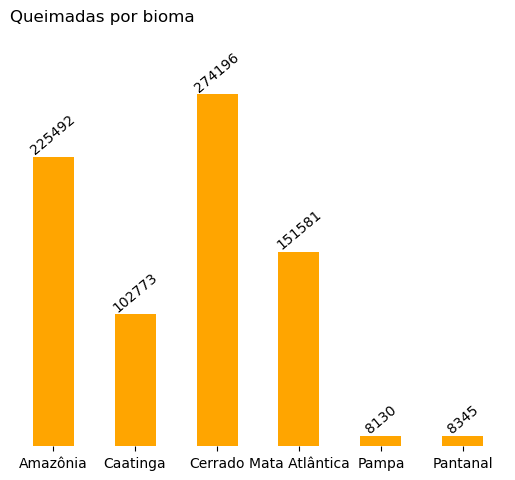

In [35]:
#gráfico para queimadas por bioma ao longo dos 9 anos

#criação do gráfico
fig, ax = plt.subplots()
bars = ax.bar(list(df_bioma.index), df_bioma['count'], color='orange',
             width=0.5)

#rótulos com valores das barras
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() /2, bar.get_height(),
           f'{int(bar.get_height())}', ha='center',va='bottom',
           rotation=40)
    
#ajustes do gráfico
ax.set_xticks(list(df_bioma.index))
ax.set_xticklabels(list(df_bioma.index))
ax.set_title('Queimadas por bioma', loc='left', pad=40)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_visible(False)
ax.grid(False)

#salvar figura
fig.savefig('queimadas_bioma_10.png', dpi=100, bbox_inches='tight',
           orientation='portrait')

plt.show()

In [36]:
#contagem de ocorrências por estado ao total dos 10 anos
df_estado = arquivo.groupby('estado')[['estado']].count().rename(columns={'estado':'count'})
df_estado.head()

count
estado         
ACRE      12059
ALAGOAS    4181
AMAPÁ      5248
AMAZONAS  27577
BAHIA     53326

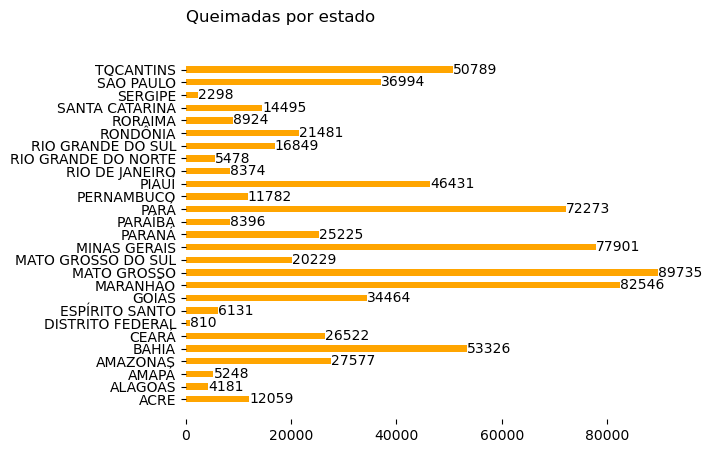

In [37]:
#gráfico de queimadas por estado no total dos 10 meses

#criação do gráfico
fig, ax = plt.subplots()
bars = ax.barh(list(df_estado.index), df_estado['count'], color='orange', height=0.5)

#rótulos com valores das barras
for bar in bars:
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, 
            f'{int(bar.get_width())}', va='center', ha='left', 
            fontsize=10, color='black')

ax.set_title('Queimadas por estado', loc='left', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

fig.savefig('queimadas_estado_10.png', dpi=100, bbox_inches='tight', orientation='portrait')

plt.show()
